# Libraries and Google Drive

In [4]:
## for data
import pandas as pd
import numpy as np # Used to do data processing

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for statistical tests
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller # Used to check stationarity


## for machine learning
import sklearn
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

In [5]:
from DreamLib.visualization import explo_DR, explo_portefeuille, explo_client, explo_habitation, explo_civil, explo_code_qualite, explo_profession, explo_pib, explo_inflation, explo_txcho

In [6]:
sns.set_theme()
sns.set(rc={"figure.figsize":(18, 6)})
plt.rcParams['font.family'] = 'serif'

color: https://matplotlib.org/stable/gallery/color/named_colors.html

# Data importation and formating

In [7]:
# Same link for everyone:
data = pd.read_sas("datas/construct_red.sas7bdat")

In [8]:
data.shape

(78, 82)

In [9]:
data.columns

Index(['TRIMESTRE', 'CHRONIQUE', 'DR', 'mean_1', 'median_1', 'p5_1', 'p10_1',
       'p25_1', 'p75_1', 'p90_1', 'p95_1', 'mean_2', 'median_2', 'p5_2',
       'p10_2', 'p25_2', 'p75_2', 'p90_2', 'p95_2', 'mean_3', 'median_3',
       'p5_3', 'p10_3', 'p25_3', 'p75_3', 'p90_3', 'p95_3', 'mean_4',
       'median_4', 'p5_4', 'p10_4', 'p25_4', 'p75_4', 'p90_4', 'p95_4',
       'mean_5', 'median_5', 'p5_5', 'p10_5', 'p25_5', 'p75_5', 'p90_5',
       'p95_5', 'mean_6', 'median_6', 'p5_6', 'p10_6', 'p25_6', 'p75_6',
       'p90_6', 'p95_6', 'mean_7', 'median_7', 'p5_7', 'p10_7', 'p25_7',
       'p75_7', 'p90_7', 'p95_7', 'mean_8', 'median_8', 'p5_8', 'p10_8',
       'p25_8', 'p75_8', 'p90_8', 'p95_8', 'CD_TY_CLI_RCI_1',
       'CD_TY_CLI_RCI_2', 'CD_ETA_CIV_1', 'CD_ETA_CIV_2', 'CD_MOD_HABI_1',
       'CD_MOD_HABI_2', 'CD_PROF_1', 'CD_PROF_2', 'CD_PROF_3', 'CD_QUAL_VEH_1',
       'CD_QUAL_VEH_2', 'dtf_per_trt', 'PIB', 'Inflation', 'Tx_cho'],
      dtype='object')

In [10]:
# First view of the data:
data.head()

TRIMESTRE  CHRONIQUE      DR    mean_1  median_1      p5_1     p10_1  \
0 2008-12-31    b'CHR2'  0.0030  0.994843  0.995192  0.992081  0.992530   
1 2008-12-31    b'CHR8'  0.1924  0.945694  0.953968  0.870889  0.890246   
2 2008-12-31  b'Totale'  0.0240  0.975114  0.993819  0.909173  0.940773   
3 2009-03-31    b'CHR2'  0.0025  0.994782  0.995192  0.992097  0.992579   
4 2009-03-31    b'CHR8'  0.1436  0.947787  0.956417  0.870889  0.893328   

      p25_1     p75_1     p90_1  ...  CD_MOD_HABI_2  CD_PROF_1  CD_PROF_2  \
0  0.993691  0.996259  0.996862  ...       0.727543   0.070852   0.351216   
1  0.924743  0.976024  0.990229  ...       0.320747   0.181759   0.541801   
2  0.978358  0.998133  0.999224  ...       0.656708   0.102888   0.370723   
3  0.993694  0.996275  0.996862  ...       0.738127   0.068228   0.342803   
4  0.927447  0.978988  0.991735  ...       0.346455   0.177304   0.532900   

   CD_PROF_3  CD_QUAL_VEH_1  CD_QUAL_VEH_2  dtf_per_trt       PIB  Inflation  \
0   0.577932       0.392129       0.607871    b'Q42008'  497736.0   1.760576   
1   0.276439       0.548512       0.451488    b'Q42008'  497736.0   1.760576   
2   0.526389       0.451145       0.548855    b'Q42008'  497736.0   1.760576   
3   0.588969       0.376661       0.623339    b'Q12009'  489227.0   0.624887   
4   0.289797       0.543935       0.456065    b'Q12009'  489227.0   0.624887   

   Tx_cho  
0     7.8  
1     7.8  
2     7.8  
3     8.6  
4     8.6  

[5 rows x 82 columns]

In [11]:
data.tail()

TRIMESTRE  CHRONIQUE      DR    mean_1  median_1      p5_1     p10_1  \
73 2014-12-31    b'CHR8'  0.1420  0.945045  0.954124  0.867099  0.890238   
74 2014-12-31  b'Totale'  0.0148  0.979524  0.993822  0.913891  0.941424   
75 2015-03-31    b'CHR2'  0.0019  0.994820  0.995156  0.992071  0.992495   
76 2015-03-31    b'CHR8'  0.1381  0.944559  0.953416  0.866626  0.888926   
77 2015-03-31  b'Totale'  0.0145  0.979689  0.993815  0.914376  0.941545   

       p25_1     p75_1     p90_1  ...  CD_MOD_HABI_2  CD_PROF_1  CD_PROF_2  \
73  0.923678  0.976668  0.990908  ...       0.380543   0.163969   0.550329   
74  0.977598  0.998348  0.999386  ...       0.697692   0.093913   0.375277   
75  0.993647  0.996268  0.996839  ...       0.802613   0.072954   0.352079   
76  0.922654  0.976460  0.990459  ...       0.373486   0.166169   0.551933   
77  0.977605  0.998367  0.999413  ...       0.691620   0.095614   0.384833   

    CD_PROF_3  CD_QUAL_VEH_1  CD_QUAL_VEH_2  dtf_per_trt       PIB  Inflation  \
73   0.285702       0.445203       0.554797   b'Q4 2014'  519315.0   0.277815   
74   0.530810       0.393627       0.606373   b'Q4 2014'  519315.0   0.277815   
75   0.574967       0.344226       0.655774   b'Q1 2015'  522560.0  -0.240585   
76   0.281898       0.449726       0.550274   b'Q1 2015'  522560.0  -0.240585   
77   0.519553       0.390524       0.609476   b'Q1 2015'  522560.0  -0.240585   

       Tx_cho  
73  10.500000  
74  10.500000  
75  10.366667  
76  10.366667  
77  10.366667  

[5 rows x 82 columns]

In [12]:
dft = data[data.CHRONIQUE == b'Totale']
dft.set_index(dft.TRIMESTRE,inplace=True)

Yt = dft['DR']

dft = dft.drop(['DR','TRIMESTRE','CHRONIQUE','dtf_per_trt'],axis = 1)

# we assure the type float of our variables
dft = dft.astype('float64', copy=True)
Yt = Yt.astype('float64', copy=True)

In [13]:
df2 = data[data.CHRONIQUE == b'CHR2']
df2.set_index(df2.TRIMESTRE,inplace=True)

Y2 = df2['DR']

# We are defining the Index as the datetime
df2 = df2.drop(['DR','TRIMESTRE','CHRONIQUE','dtf_per_trt'],axis = 1)

# we assure the type float of our variables
df2 = df2.astype('float64', copy=True)
Y2 = Y2.astype('float64', copy=True)

In [14]:
df8 = data[data.CHRONIQUE == b'CHR8']
df8.set_index(df8.TRIMESTRE,inplace=True)

Y8 = df8['DR']

# We are defining the Index as the datetime
df8 = df8.drop(['DR','TRIMESTRE','CHRONIQUE','dtf_per_trt'],axis = 1)

# we assure the type float of our variables
df8 = df8.astype('float64', copy=True)
Y8 = Y8.astype('float64', copy=True)

# Exploration Data general

## About DR

<AxesSubplot:xlabel='TRIMESTRE', ylabel='DR'>

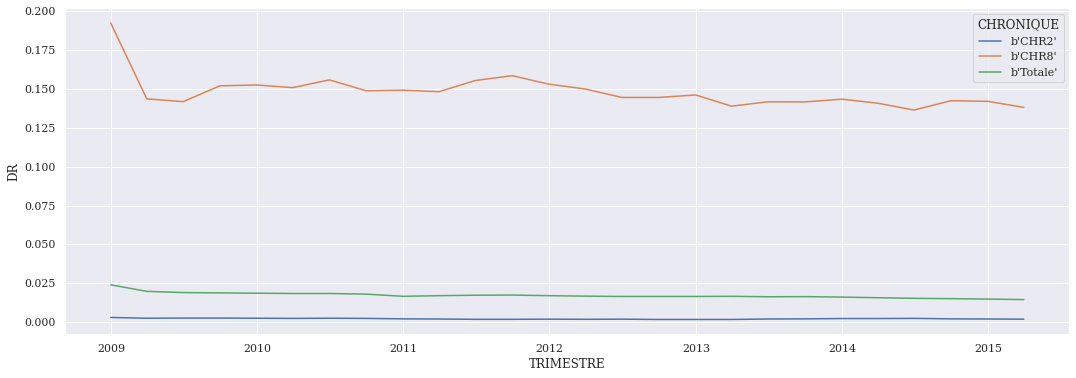

In [15]:
sns.lineplot(data=data,x='TRIMESTRE',y='DR',hue='CHRONIQUE',color= 'r')

<AxesSubplot:xlabel='DR', ylabel='Count'>

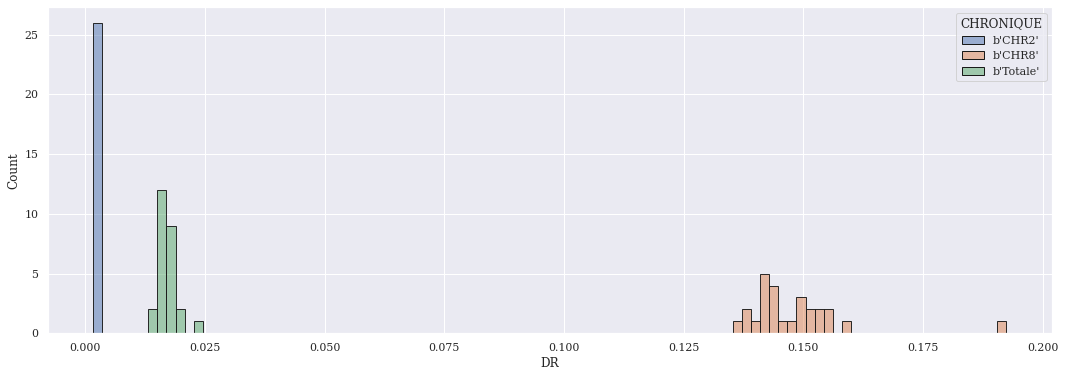

In [16]:
sns.histplot(data=data,x='DR',hue='CHRONIQUE',bins = 100, color='c', edgecolor='k')

## Type de client

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:243: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


<AxesSubplot:xlabel='CD_TY_CLI_RCI_1', ylabel='Count'>

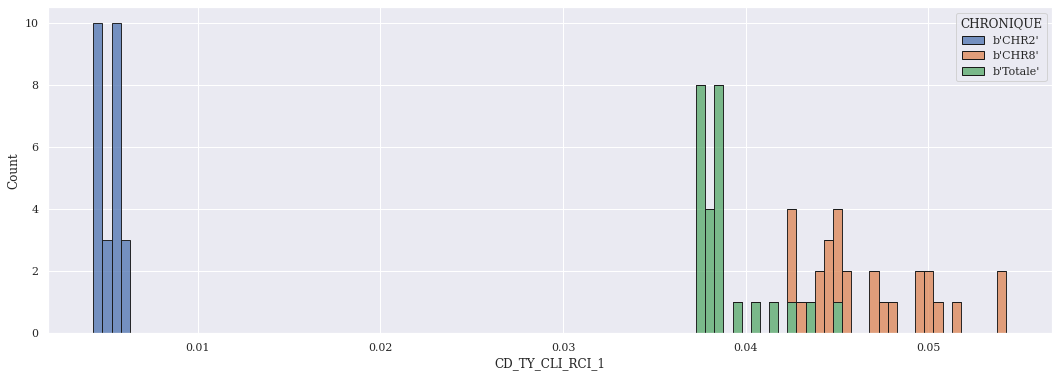

In [17]:
sns.histplot(data=data,x='CD_TY_CLI_RCI_1',hue='CHRONIQUE',bins = 100, color='c', edgecolor='k',multiple="stack")

## Mode d'habitation

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:243: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


<AxesSubplot:xlabel='CD_MOD_HABI_1', ylabel='Count'>

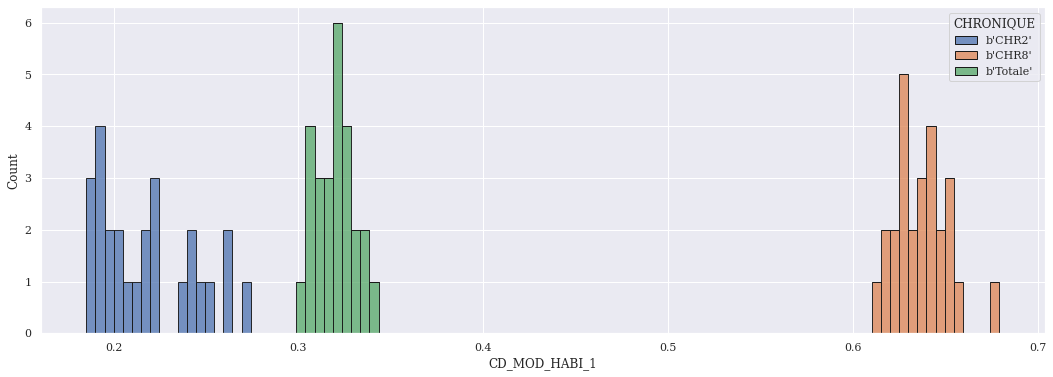

In [18]:
sns.histplot(data=data,x='CD_MOD_HABI_1',hue='CHRONIQUE',bins = 100, color='c', edgecolor='k',multiple="stack")

## Etat civil

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:243: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


<AxesSubplot:xlabel='CD_ETA_CIV_1', ylabel='Count'>

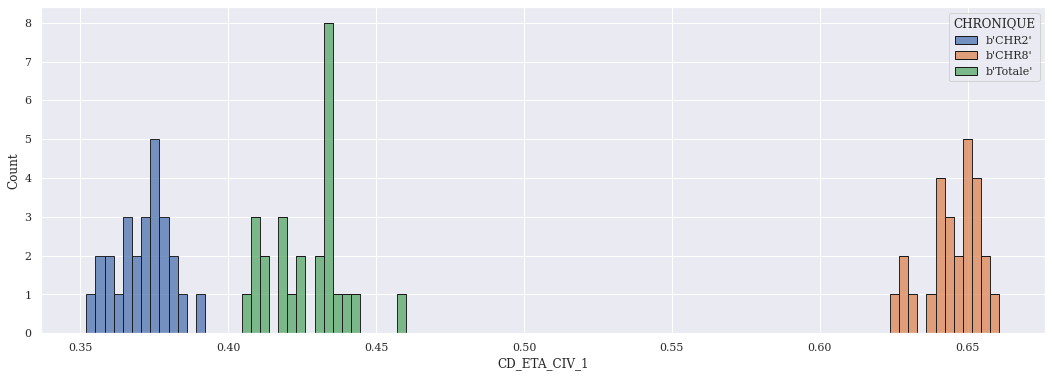

In [19]:
sns.histplot(data=data,x='CD_ETA_CIV_1',hue='CHRONIQUE',bins = 100, color='c', edgecolor='k',multiple="stack")

## Code qualité du véhicule

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:243: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


<AxesSubplot:xlabel='CD_QUAL_VEH_1', ylabel='Count'>

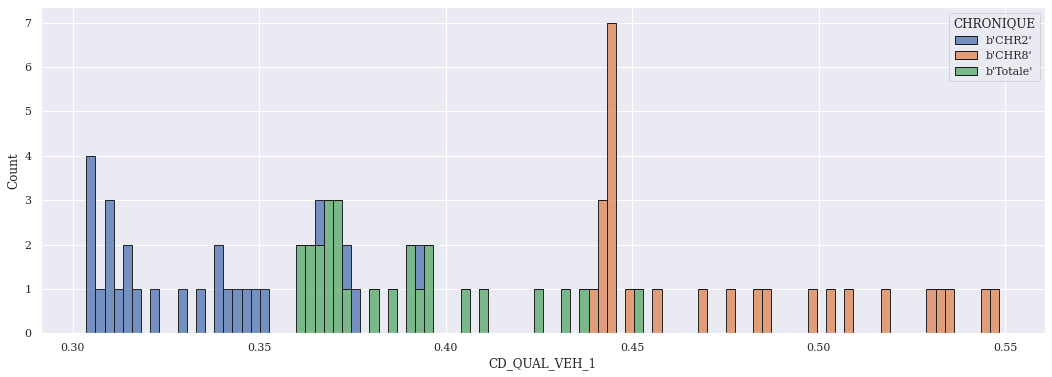

In [20]:
sns.histplot(data=data,x='CD_QUAL_VEH_1',hue='CHRONIQUE',bins = 100, color='c', edgecolor='k',multiple="stack")

## Profession

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:243: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


<AxesSubplot:xlabel='CD_PROF_1', ylabel='Count'>

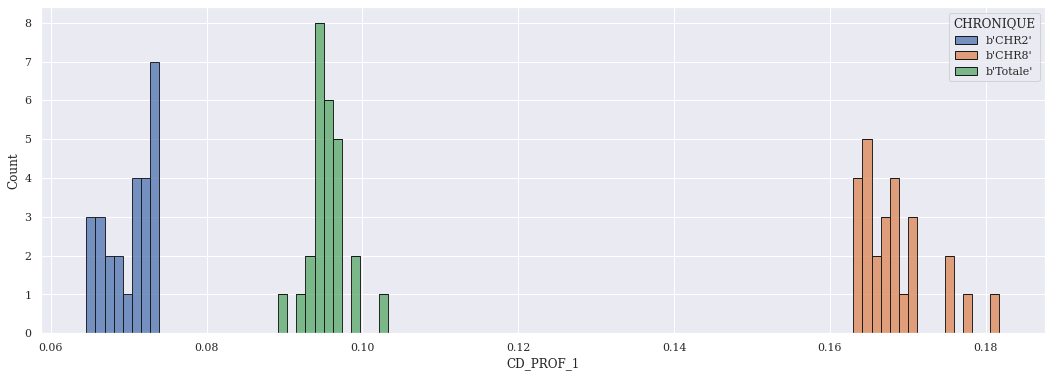

In [21]:
sns.histplot(data=data,x='CD_PROF_1',hue='CHRONIQUE',bins = 100, color='c', edgecolor='k',multiple="stack")

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:243: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


<AxesSubplot:xlabel='CD_PROF_2', ylabel='Count'>

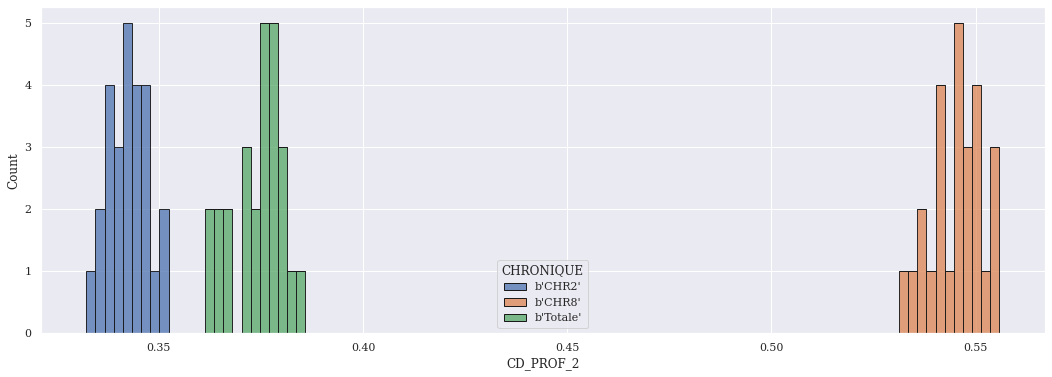

In [22]:
sns.histplot(data=data,x='CD_PROF_2',hue='CHRONIQUE',bins = 100, color='c', edgecolor='k',multiple="stack")

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:243: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


<AxesSubplot:xlabel='CD_PROF_3', ylabel='Count'>

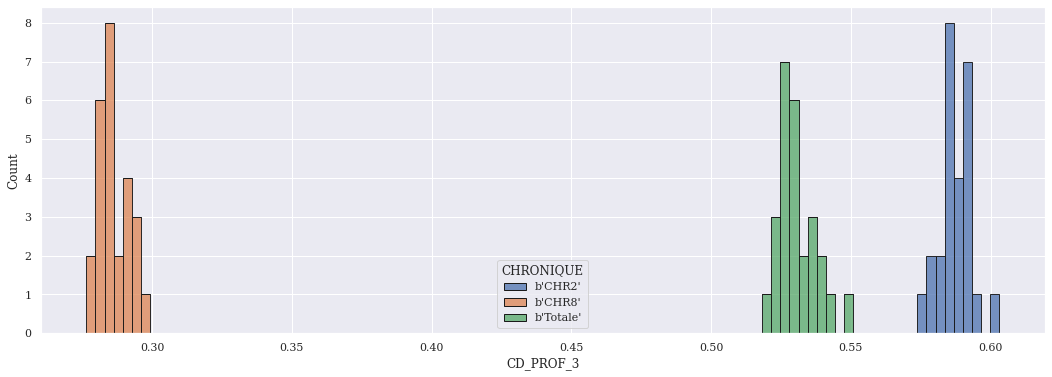

In [23]:
sns.histplot(data=data,x='CD_PROF_3',hue='CHRONIQUE',bins = 100, color='c', edgecolor='k',multiple="stack")

## Macro

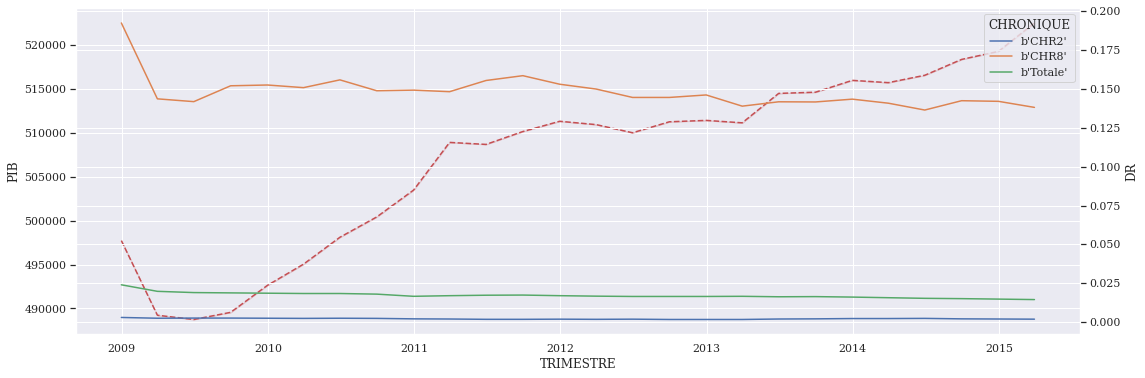

In [24]:
fig, ax1 = plt.subplots()
sns.lineplot(data=data,x='TRIMESTRE',y='PIB',color='r',linestyle="dashed",ax=ax1)

ax2 = ax1.twinx()
sns.lineplot(data=data,x='TRIMESTRE',y='DR',hue='CHRONIQUE',ax=ax2)

plt.show()

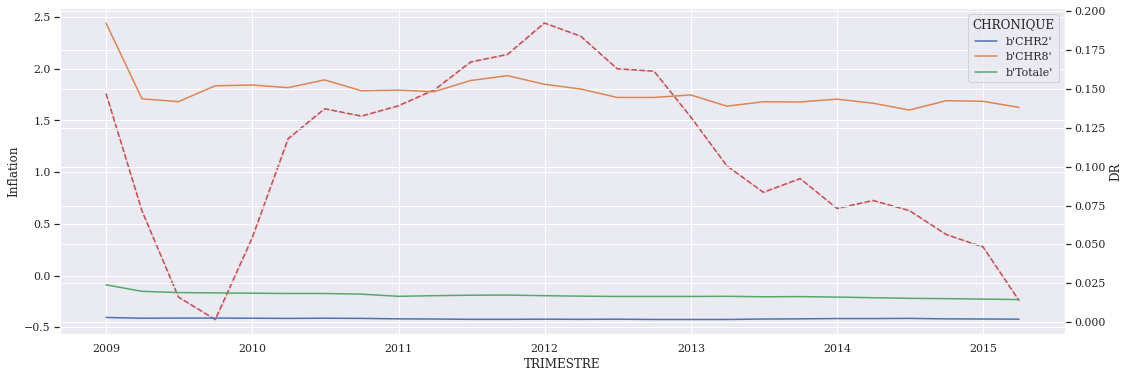

In [25]:
fig, ax1 = plt.subplots()
sns.lineplot(data=data,x='TRIMESTRE',y='Inflation',color='r',linestyle="dashed",ax=ax1)

ax2 = ax1.twinx()
sns.lineplot(data=data,x='TRIMESTRE',y='DR',hue='CHRONIQUE',ax=ax2)

plt.show()

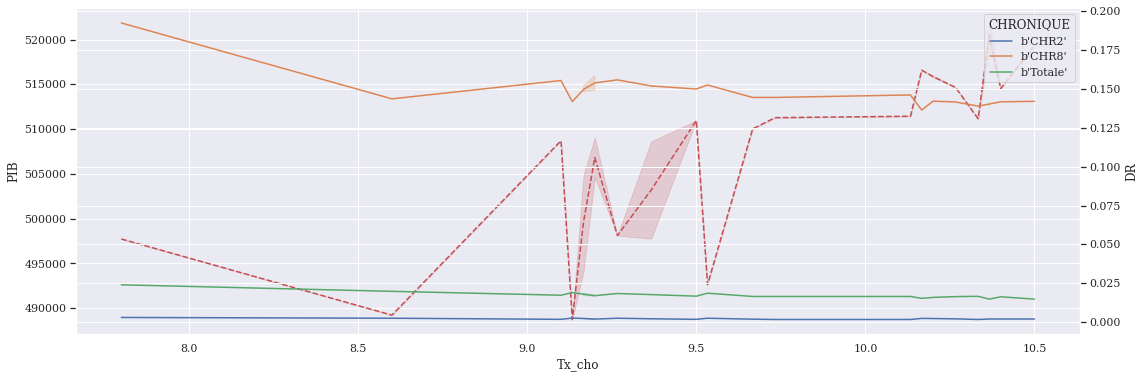

In [26]:
fig, ax1 = plt.subplots()
sns.lineplot(data=data,x='Tx_cho',y='PIB',color='r',linestyle="dashed",ax=ax1)

ax2 = ax1.twinx()
sns.lineplot(data=data,x='Tx_cho',y='DR',hue='CHRONIQUE',ax=ax2)

plt.show()

# Split Data set

On sépare les catégories de données

In [27]:
col_portefeuille = ['mean_1', 'median_1', 'p5_1', 'p10_1', 'p25_1', 'p75_1', 'p90_1',
       'p95_1', 'mean_2', 'median_2', 'p5_2', 'p10_2', 'p25_2', 'p75_2',
       'p90_2', 'p95_2', 'mean_3', 'median_3', 'p5_3', 'p10_3', 'p25_3',
       'p75_3', 'p90_3', 'p95_3', 'mean_4', 'median_4', 'p5_4', 'p10_4',
       'p25_4', 'p75_4', 'p90_4', 'p95_4', 'mean_5', 'median_5', 'p5_5',
       'p10_5', 'p25_5', 'p75_5', 'p90_5', 'p95_5', 'mean_6', 'median_6',
       'p5_6', 'p10_6', 'p25_6', 'p75_6', 'p90_6', 'p95_6', 'mean_7',
       'median_7', 'p5_7', 'p10_7', 'p25_7', 'p75_7', 'p90_7', 'p95_7',
       'mean_8', 'median_8', 'p5_8', 'p10_8', 'p25_8', 'p75_8', 'p90_8',
       'p95_8']
       
col_clients = ['CD_TY_CLI_RCI_1', 'CD_TY_CLI_RCI_2', 'CD_ETA_CIV_1',
       'CD_ETA_CIV_2', 'CD_MOD_HABI_1', 'CD_MOD_HABI_2', 'CD_PROF_1',
       'CD_PROF_2', 'CD_PROF_3', 'CD_QUAL_VEH_1', 'CD_QUAL_VEH_2']

col_macro = ['PIB',
       'Inflation', 'Tx_cho']

Nettoyage données clients doublé et triplé

In [28]:
col_clients.remove('CD_TY_CLI_RCI_2')
col_clients.remove('CD_ETA_CIV_2')
col_clients.remove('CD_MOD_HABI_2')
col_clients.remove('CD_PROF_3')
col_clients.remove('CD_QUAL_VEH_2')

Definition des 3 datasets des 3 chroniques

In [29]:
Xt = dft[[*col_portefeuille,*col_clients,*col_macro]]
X2 = df2[[*col_portefeuille,*col_clients,*col_macro]]
X8 = df8[[*col_portefeuille,*col_clients,*col_macro]]

# Exploration chronique 2

## Exploration DR

count    26.000000
mean      0.002154
std       0.000344
min       0.001700
25%       0.001900
50%       0.002100
75%       0.002400
max       0.003000
Name: DR, dtype: float64


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


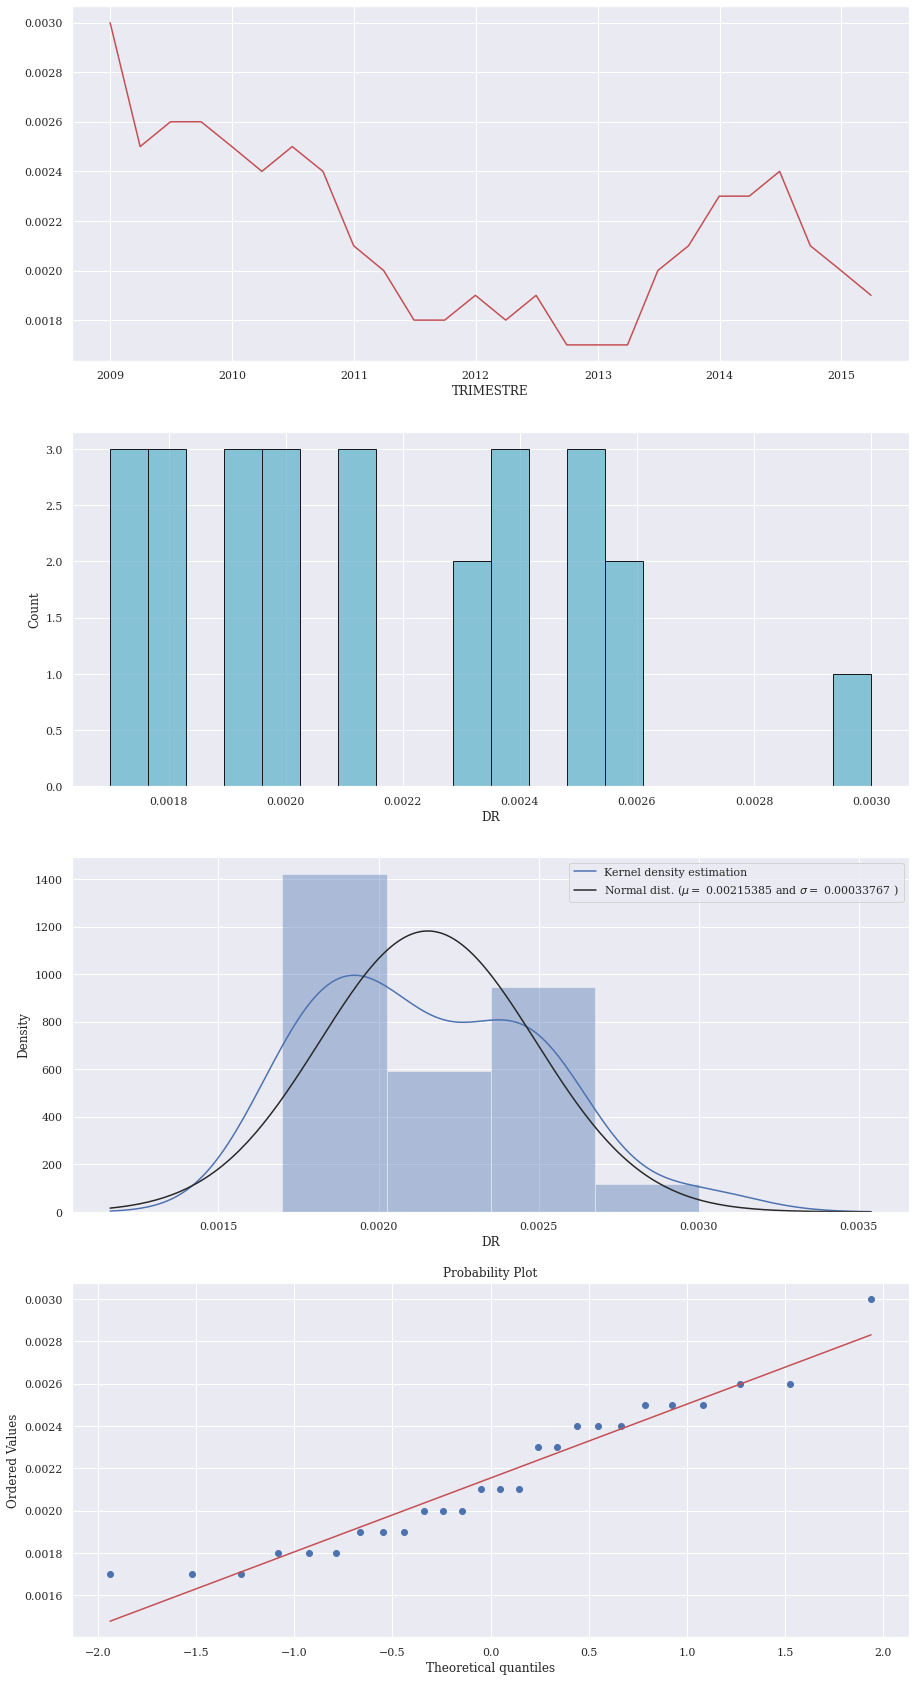

In [30]:
explo_DR(df2,Y2)

## Exploration portefeuille

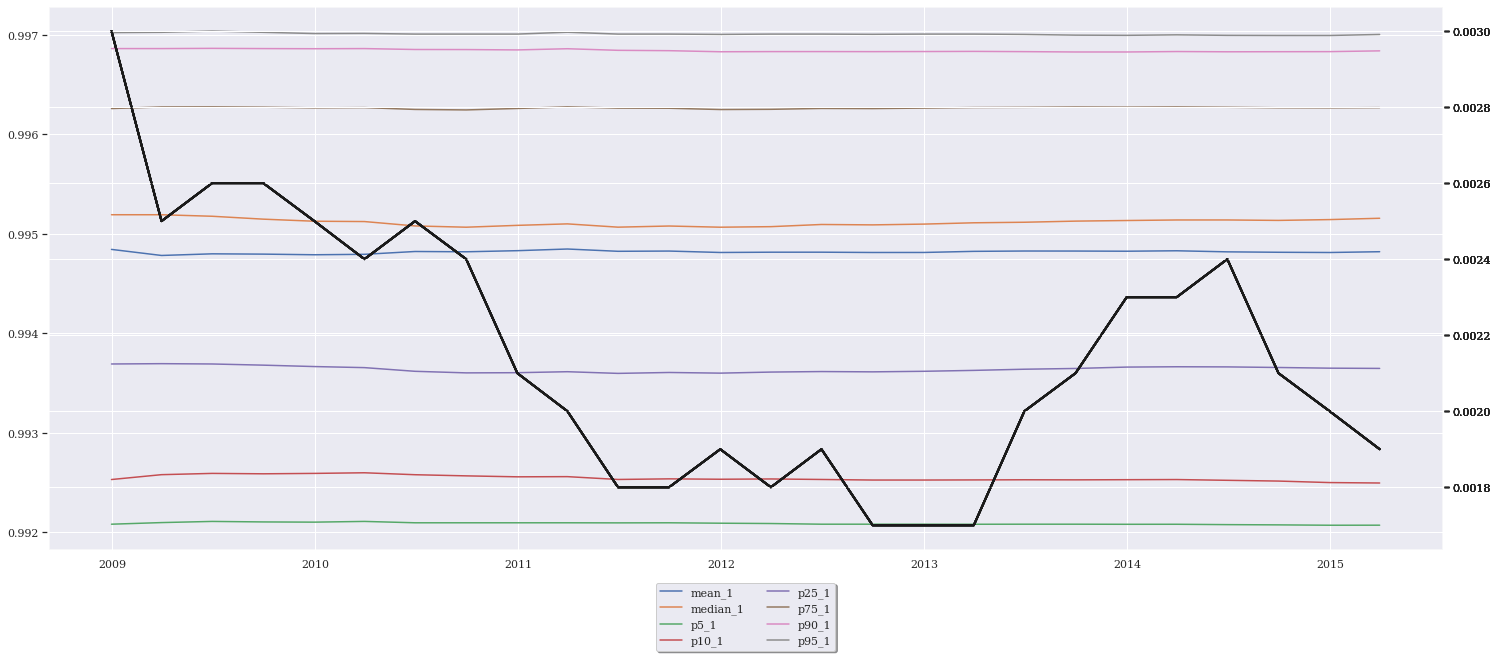

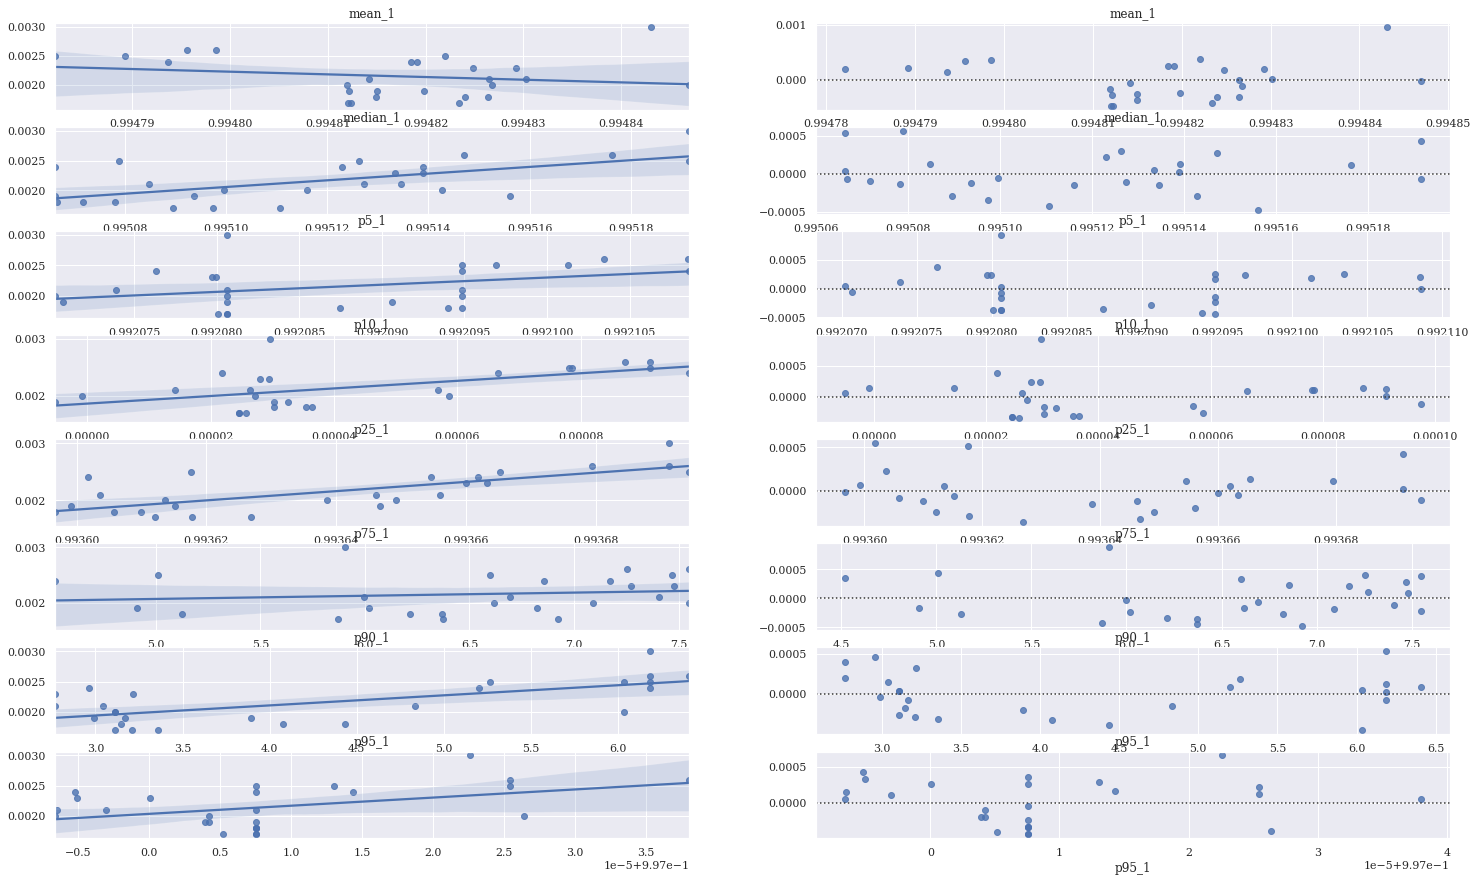

In [31]:
explo_portefeuille(df2,Y2,1)

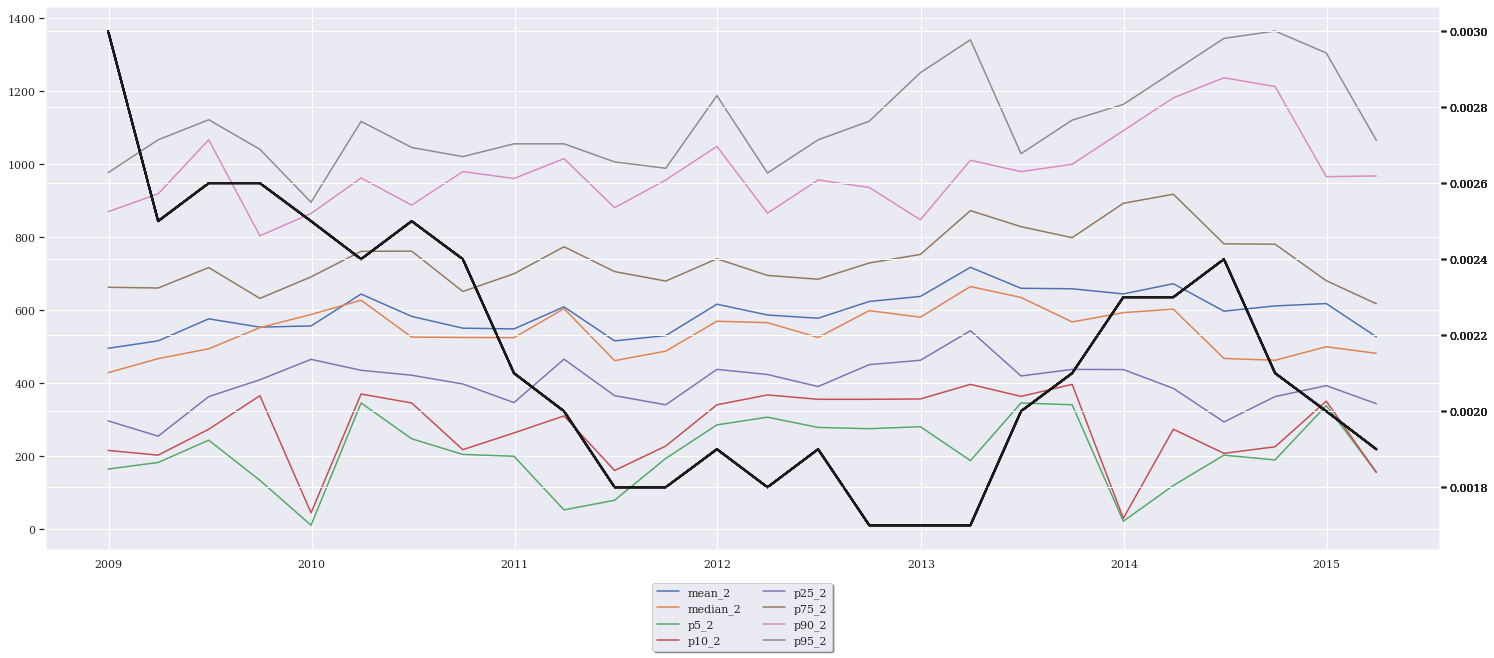

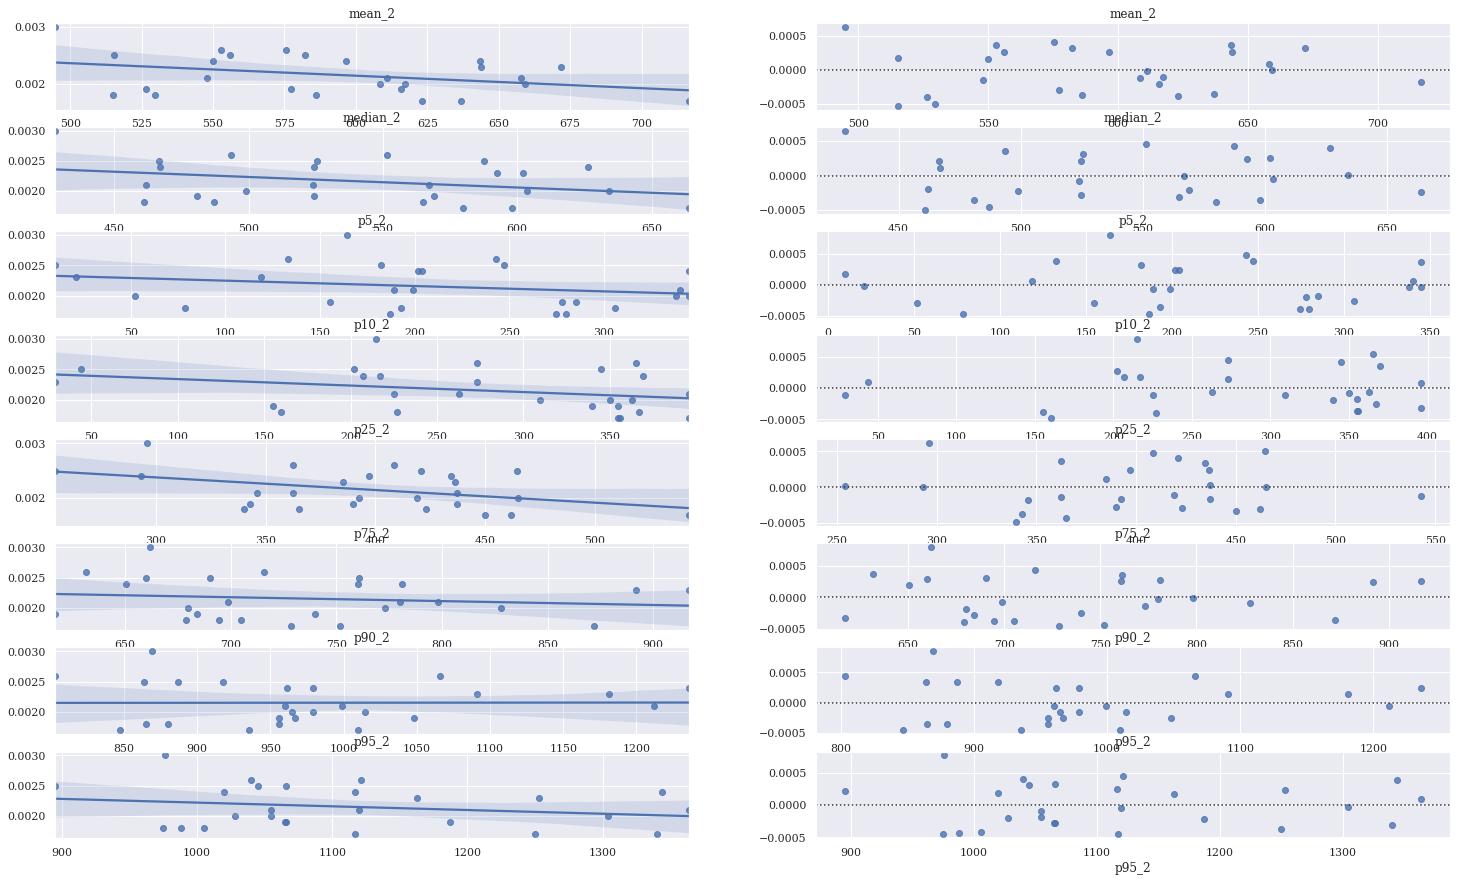

In [32]:
explo_portefeuille(df2,Y2,2)

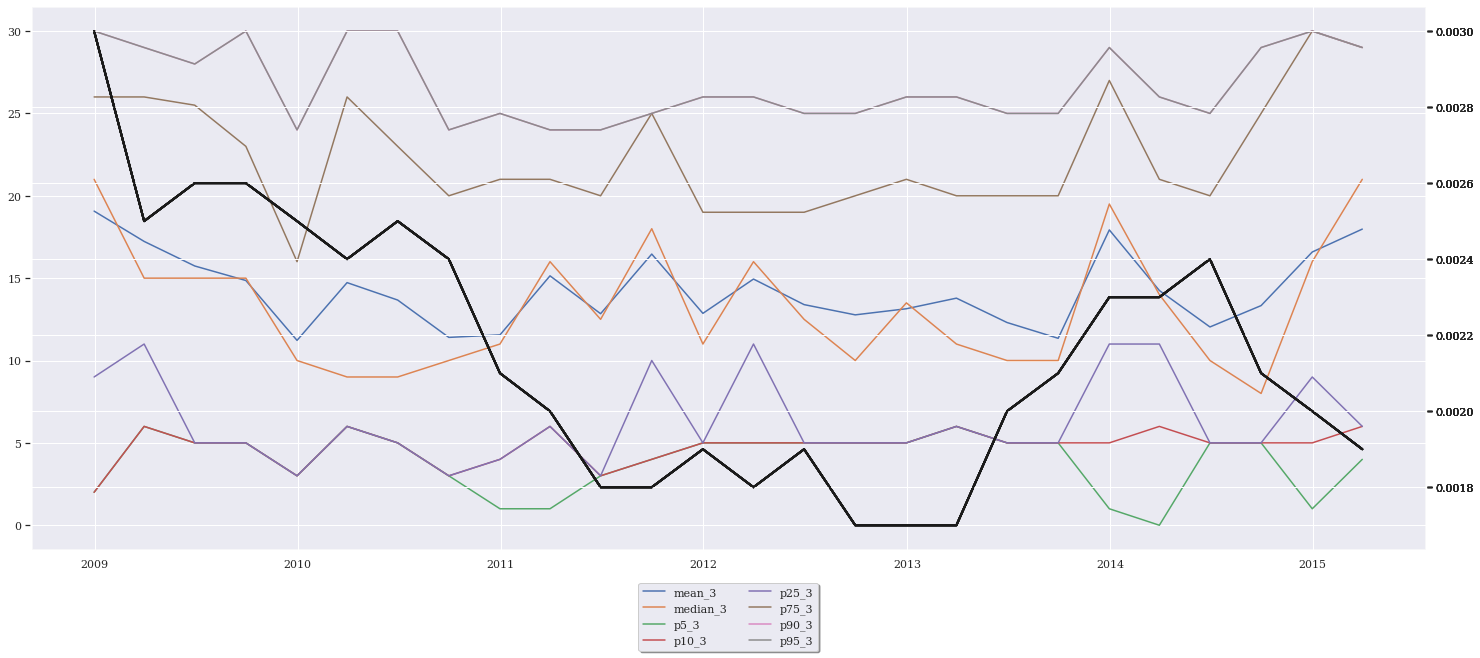

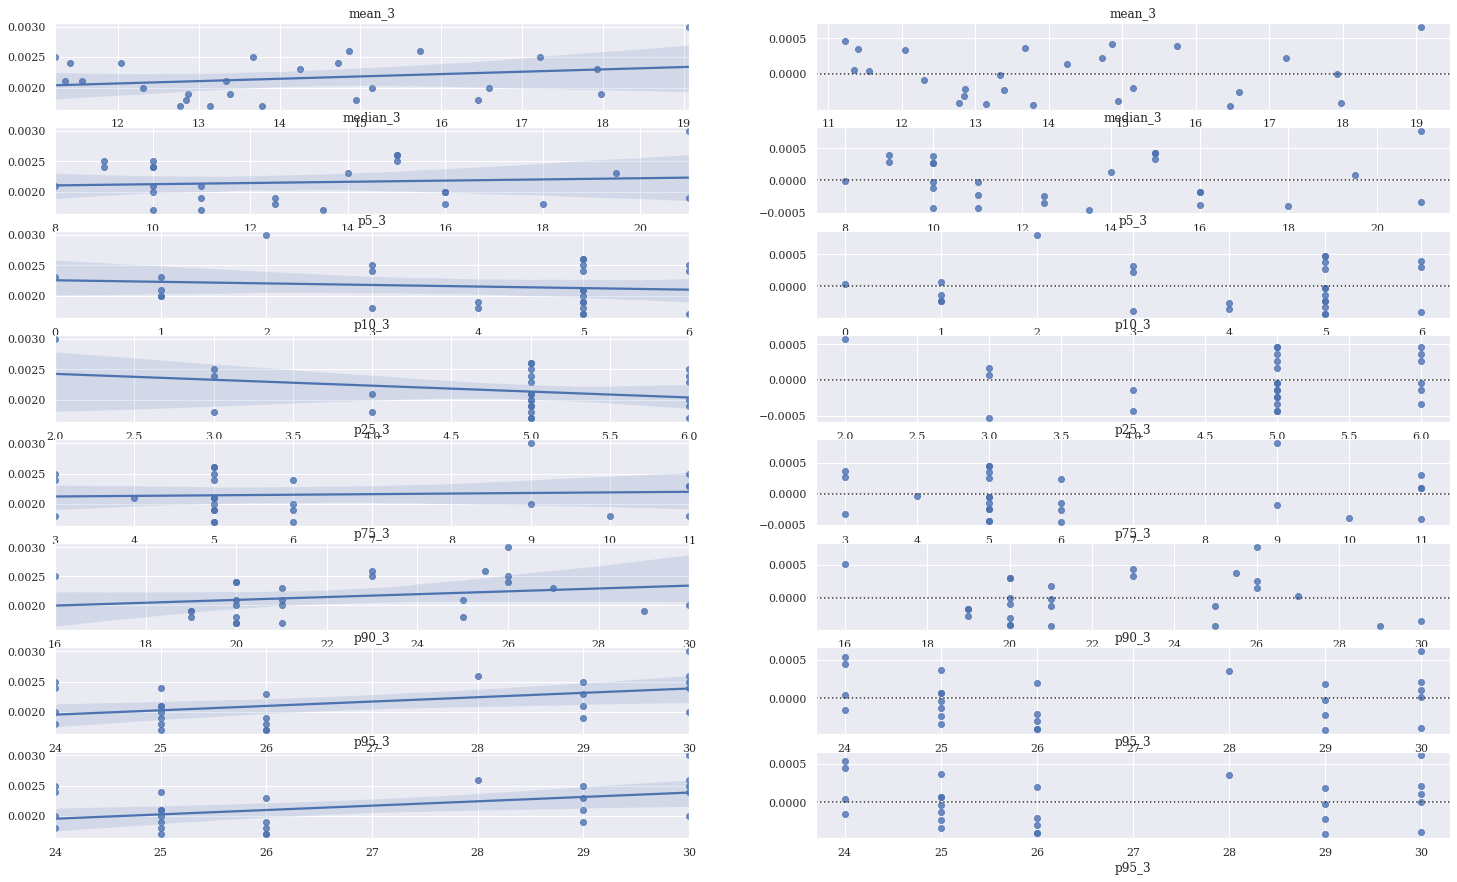

In [33]:
explo_portefeuille(df2,Y2,3)

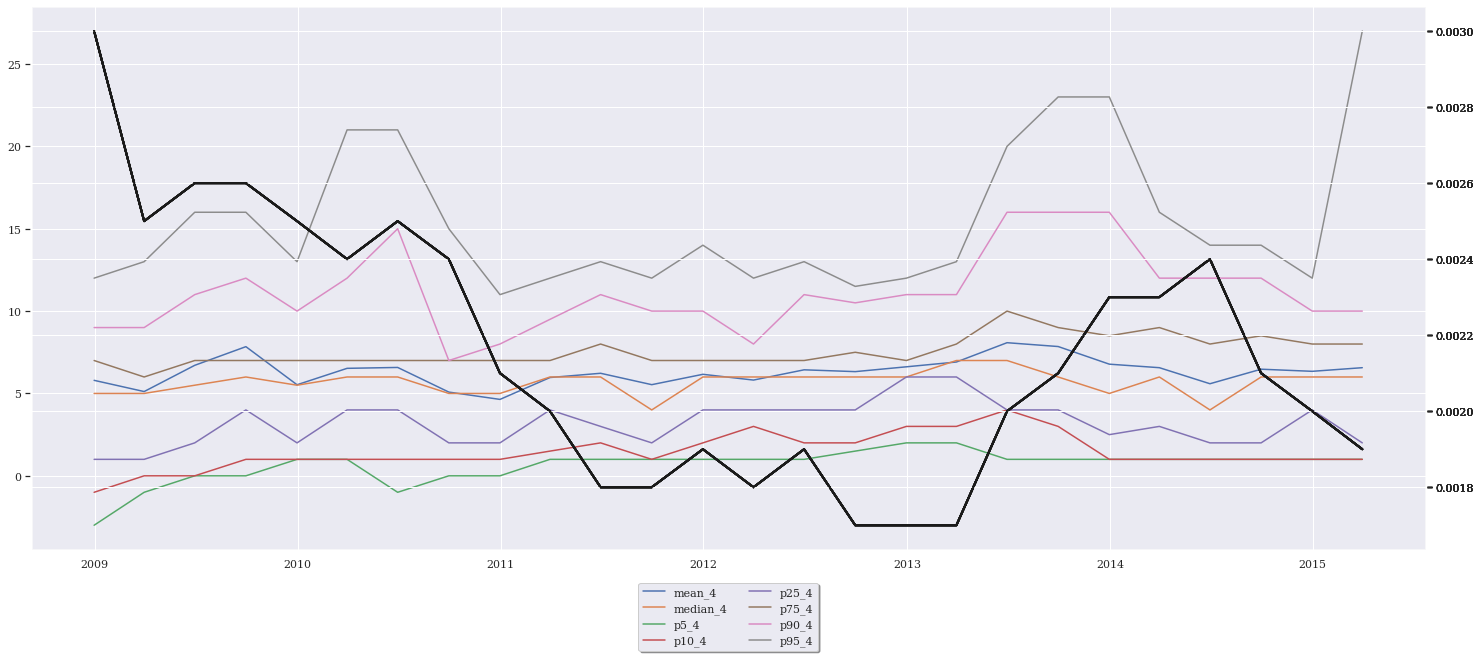

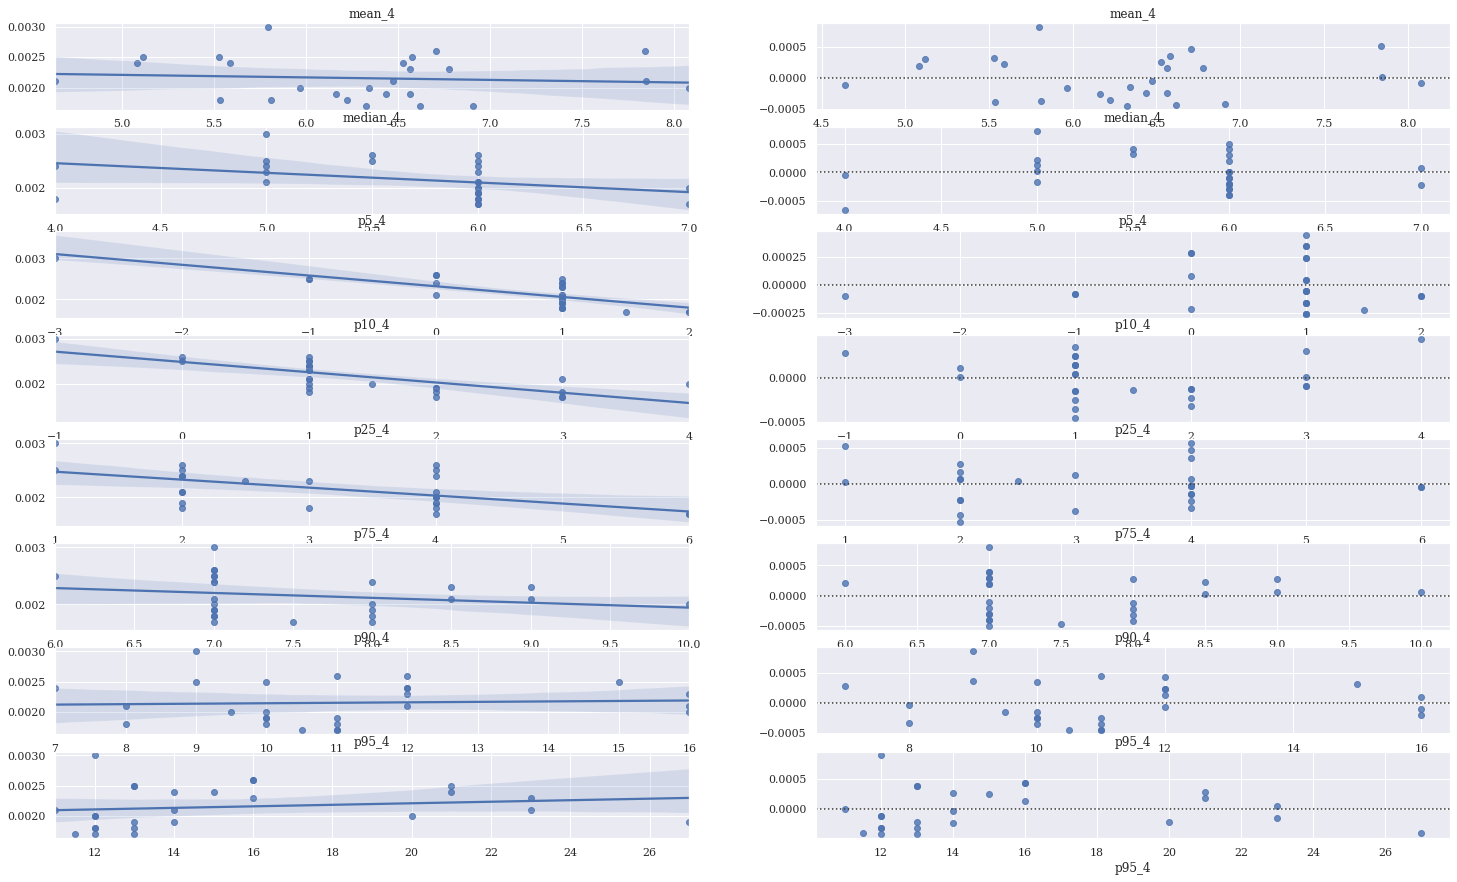

In [34]:
explo_portefeuille(df2,Y2,4)

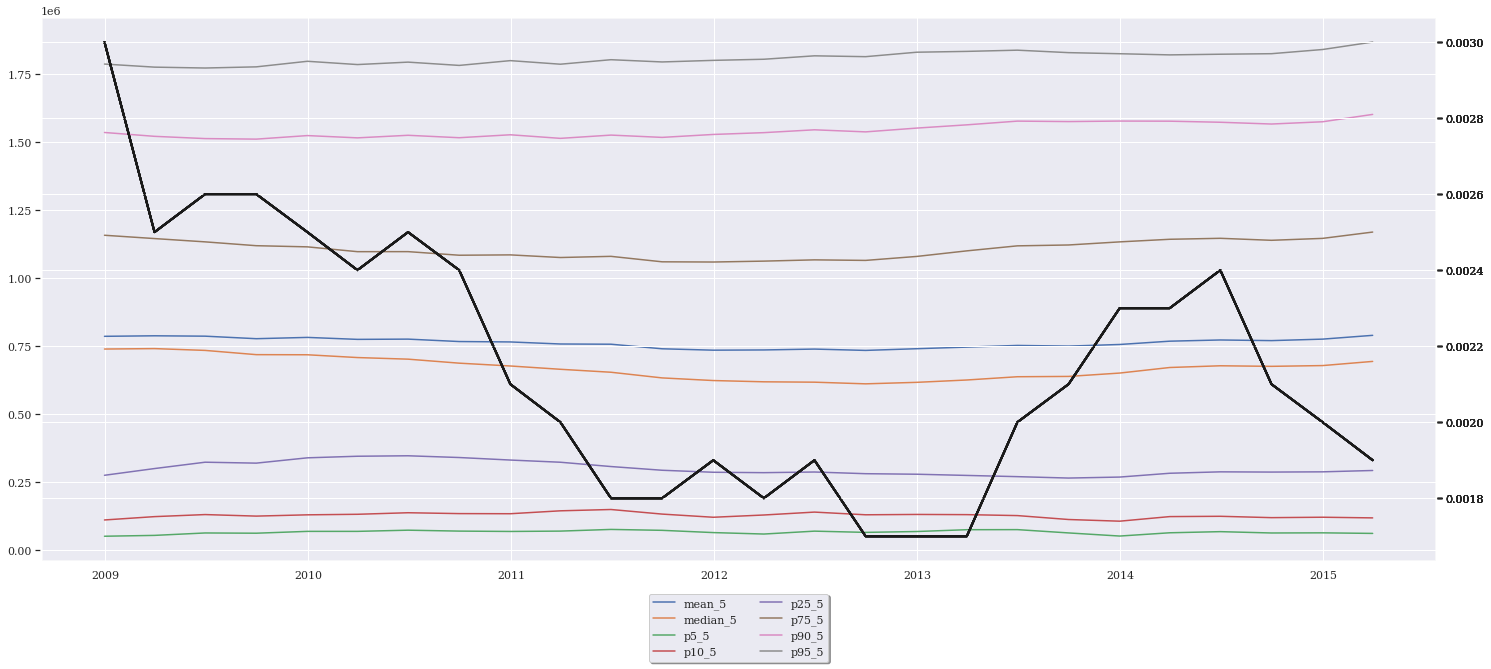

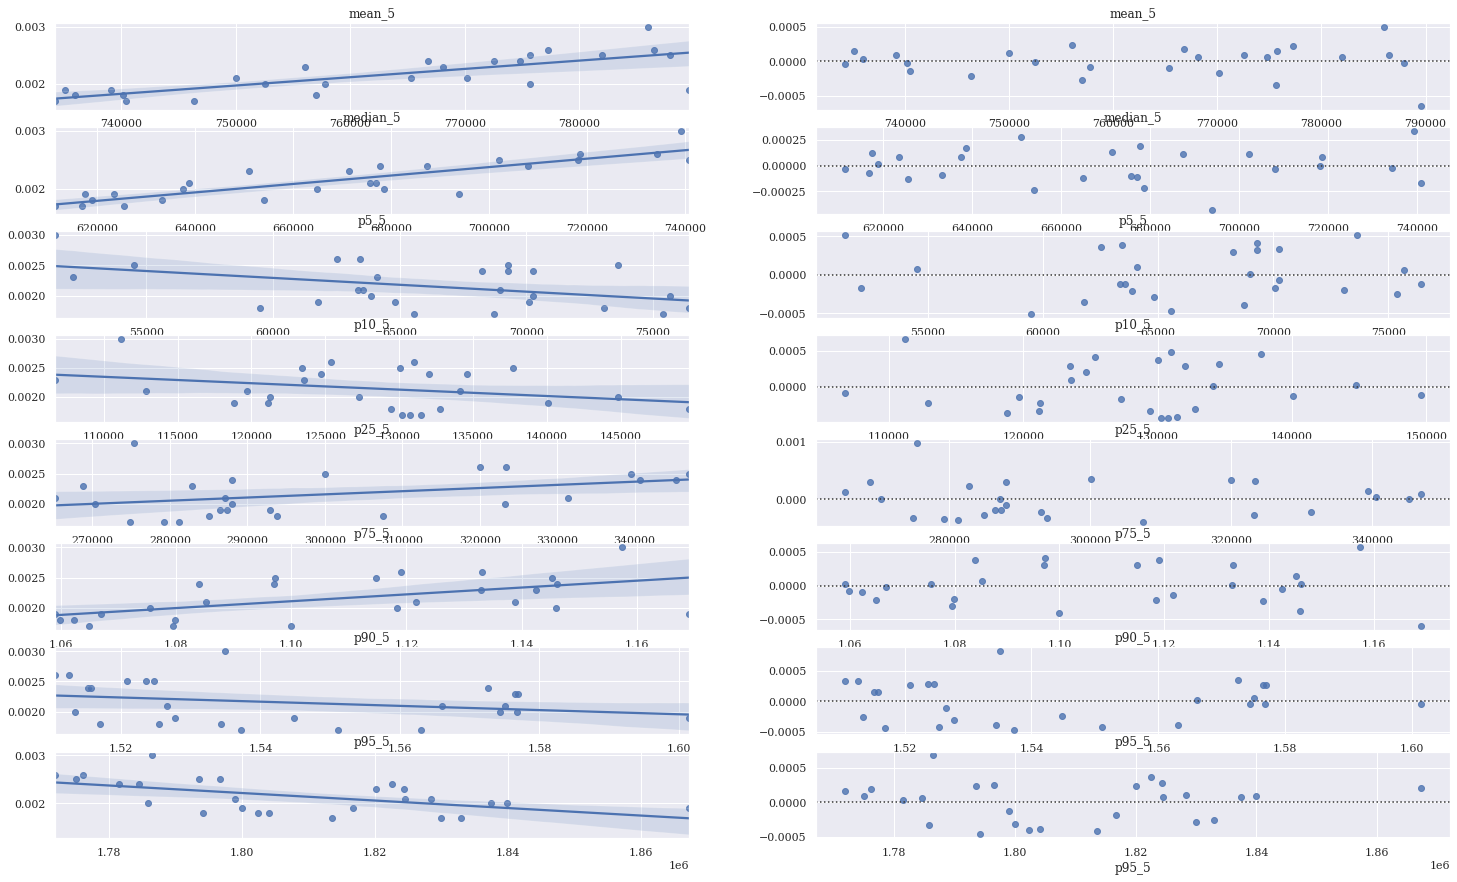

In [35]:
explo_portefeuille(df2,Y2,5)

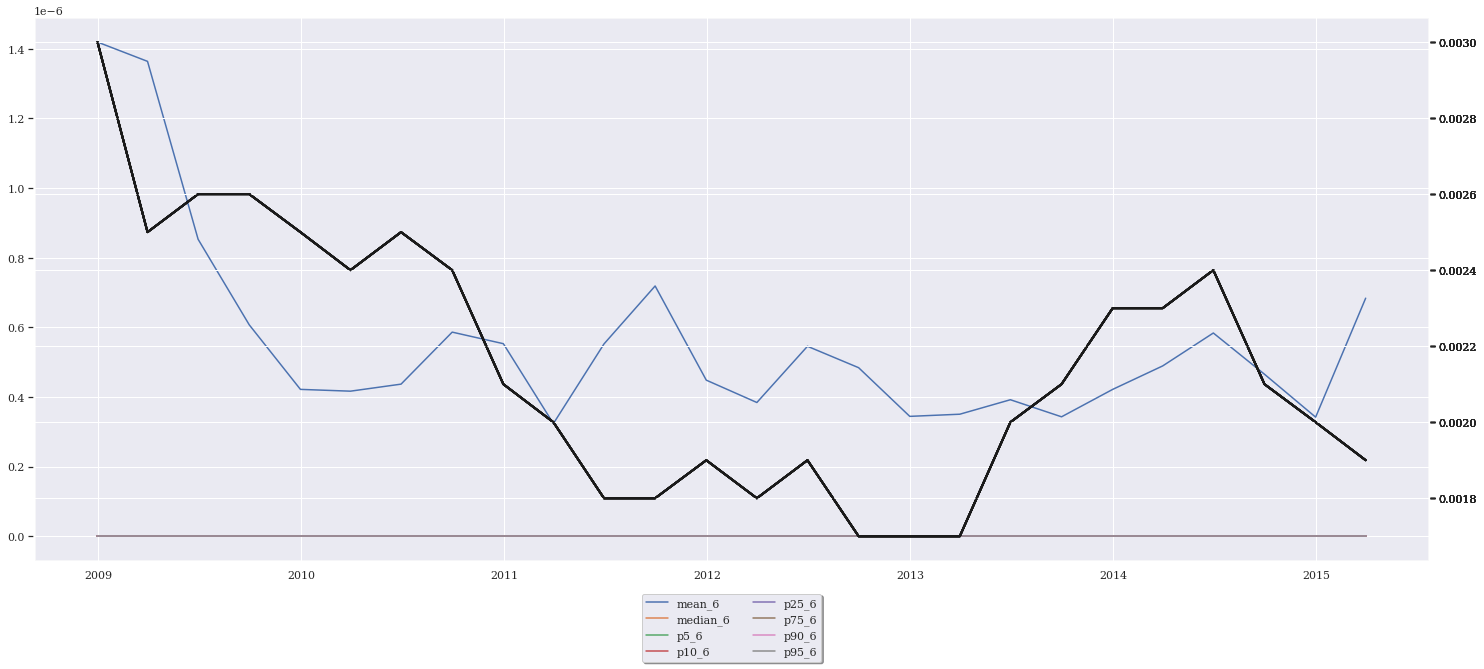

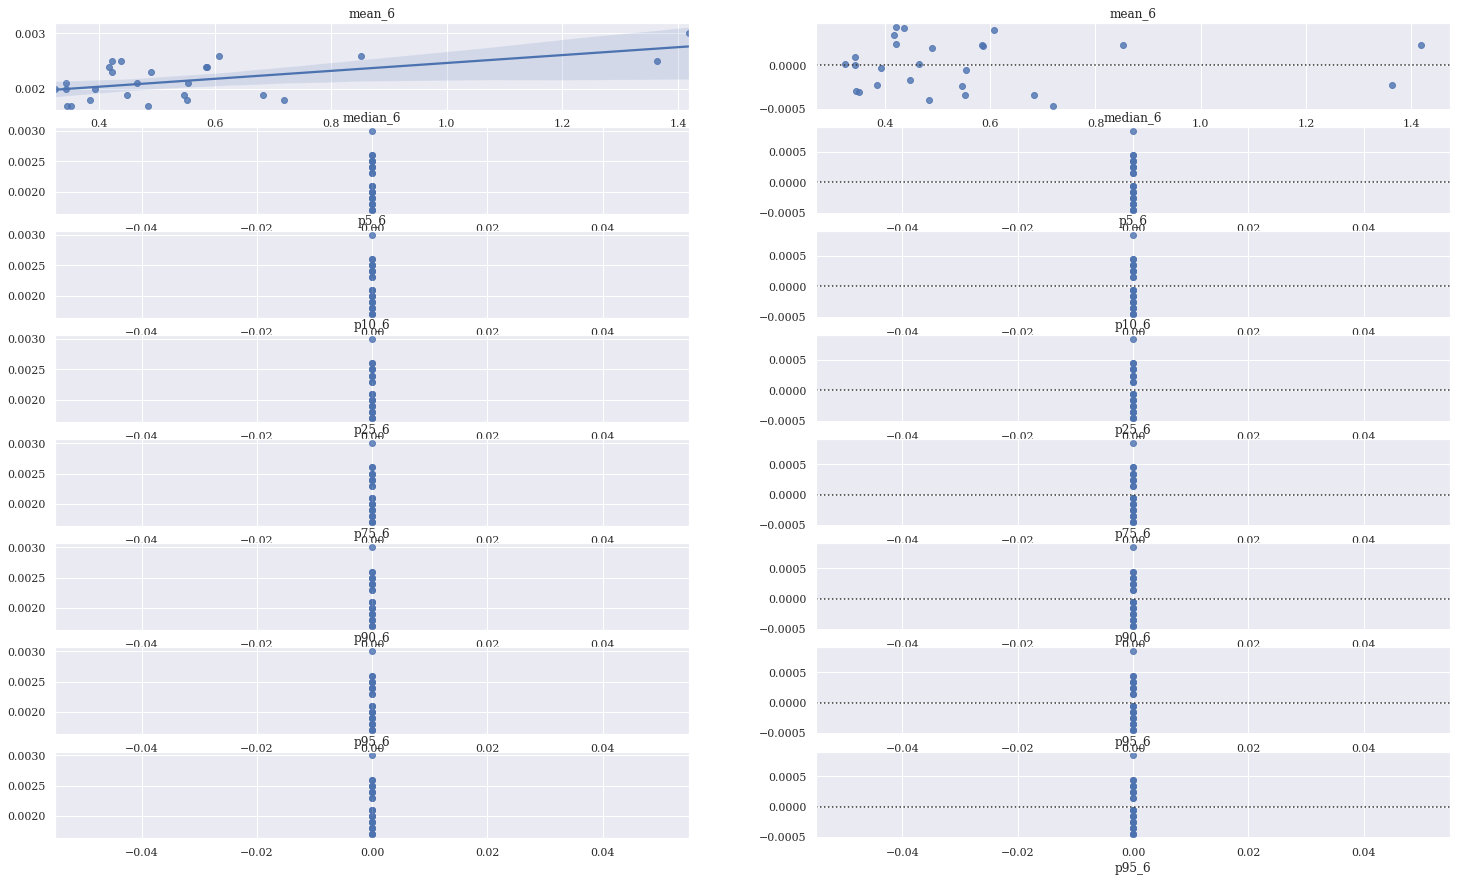

In [36]:
explo_portefeuille(df2,Y2,6)

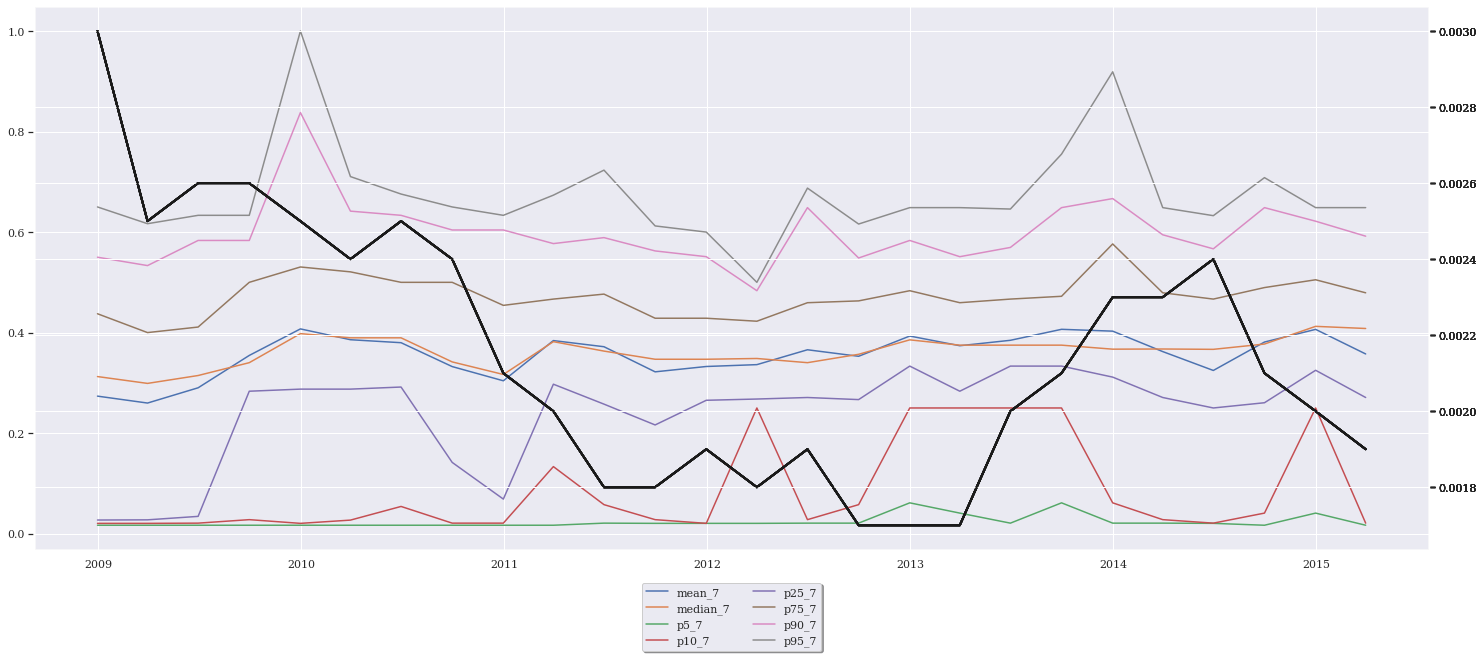

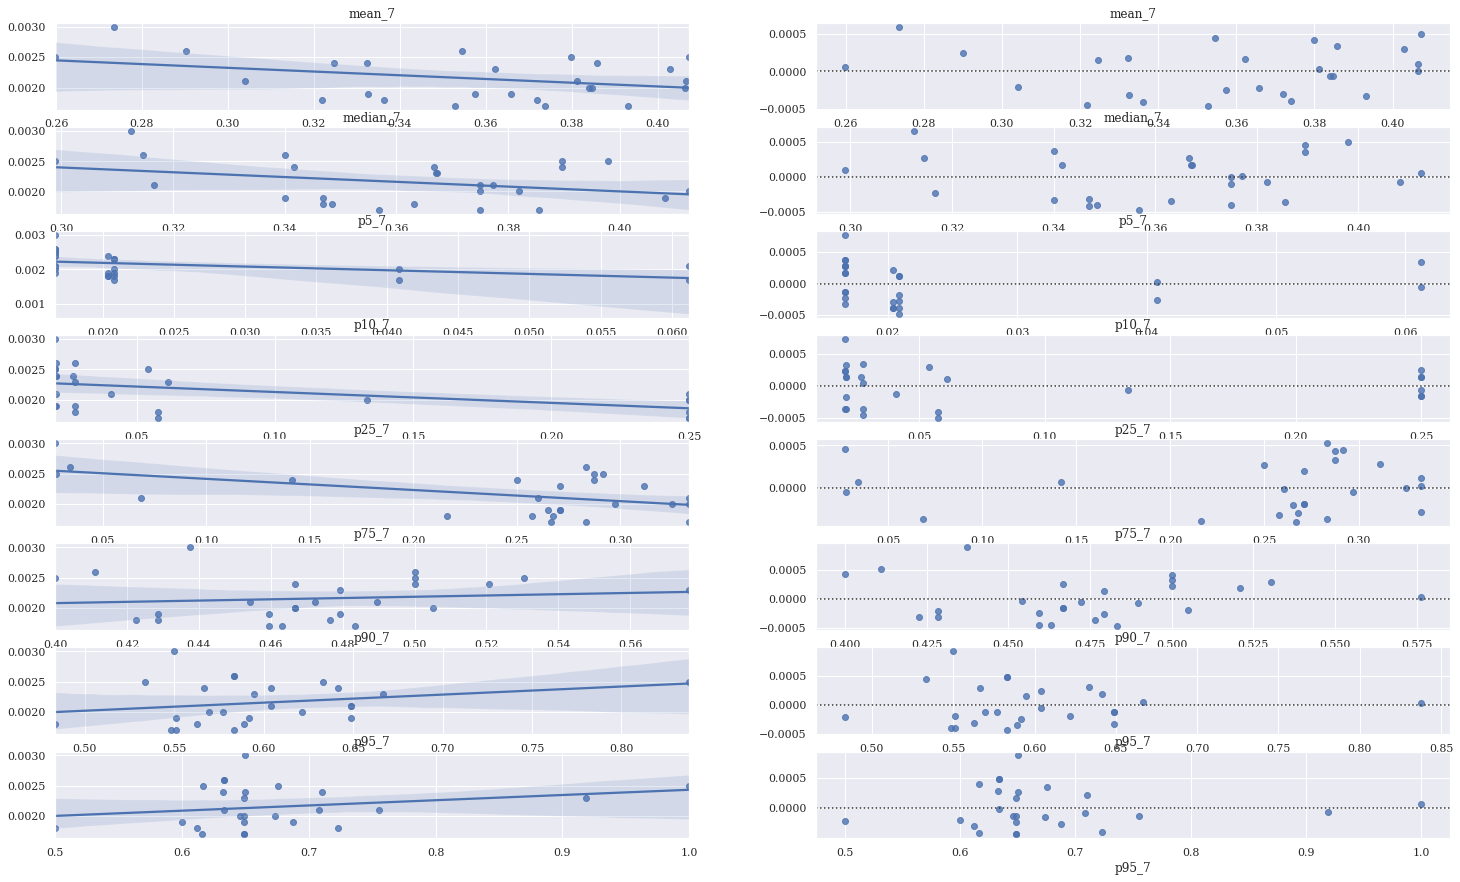

In [37]:
explo_portefeuille(df2,Y2,7)

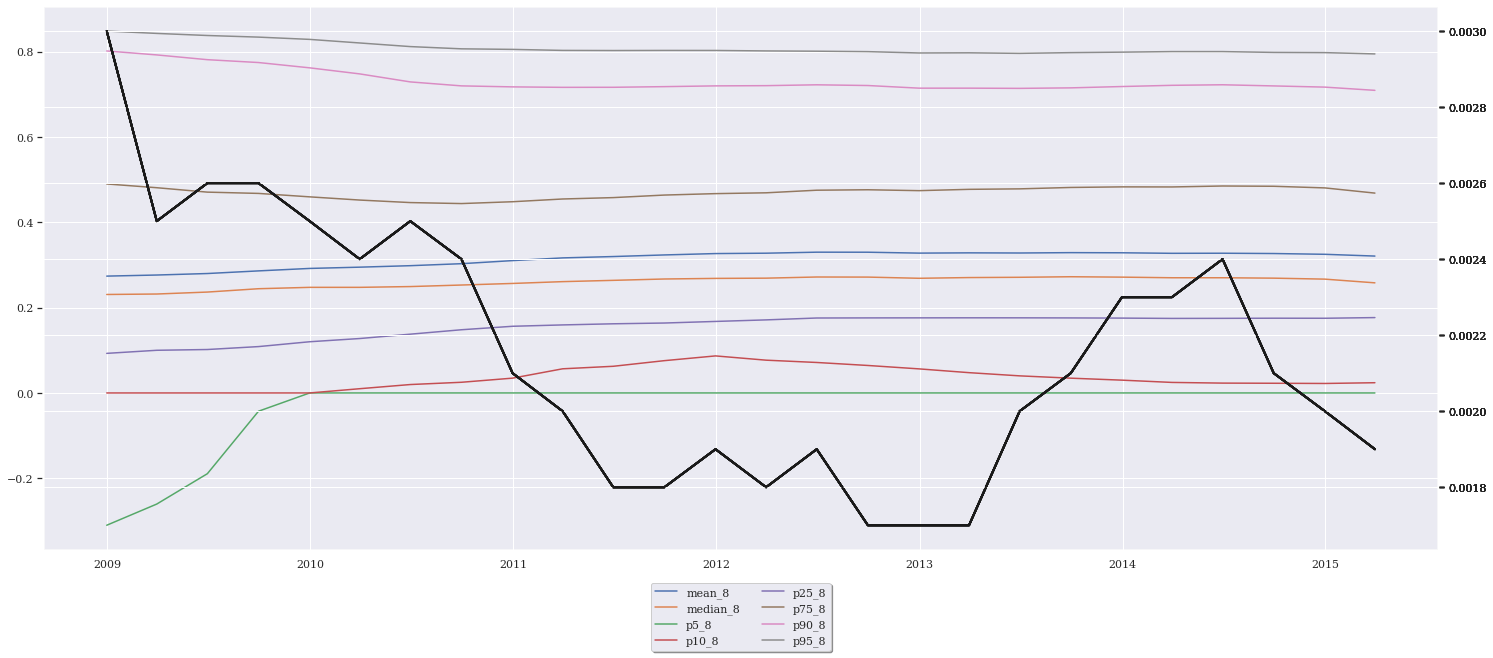

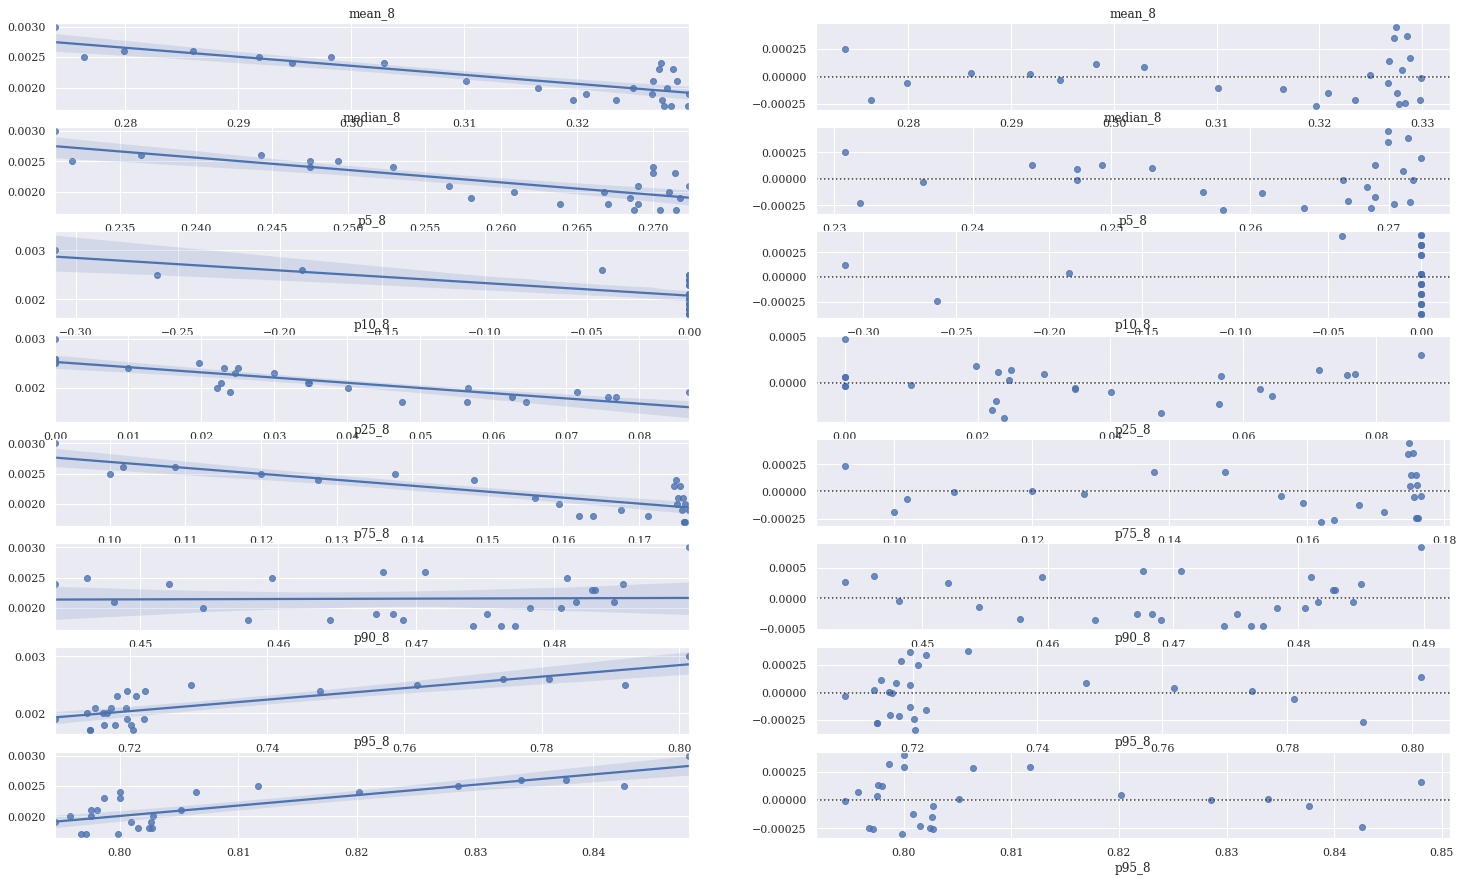

In [38]:
explo_portefeuille(df2,Y2,8)

## Type de client

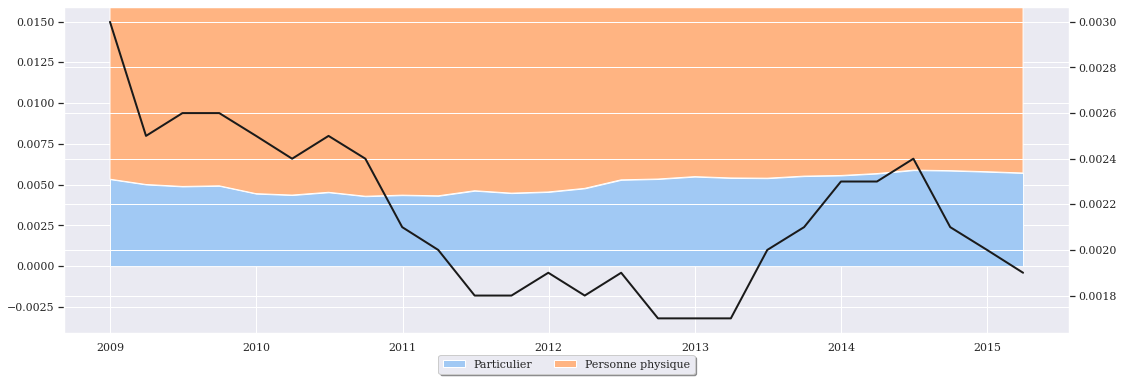

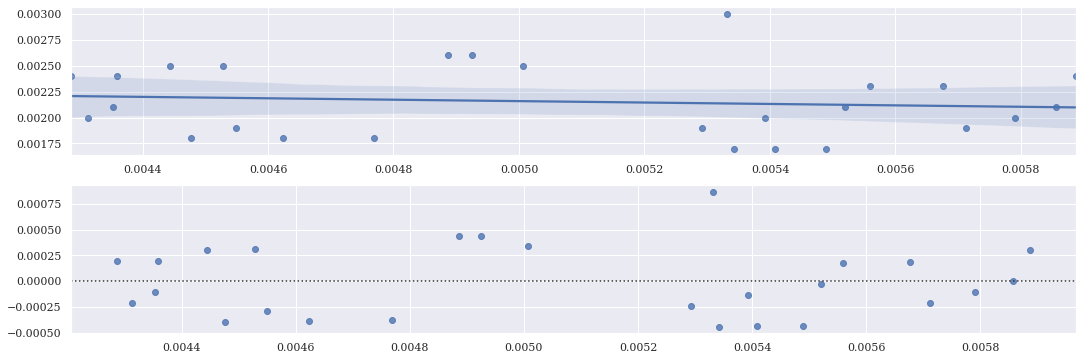

In [39]:
explo_client(df2,Y2)

## Mode d'habitation

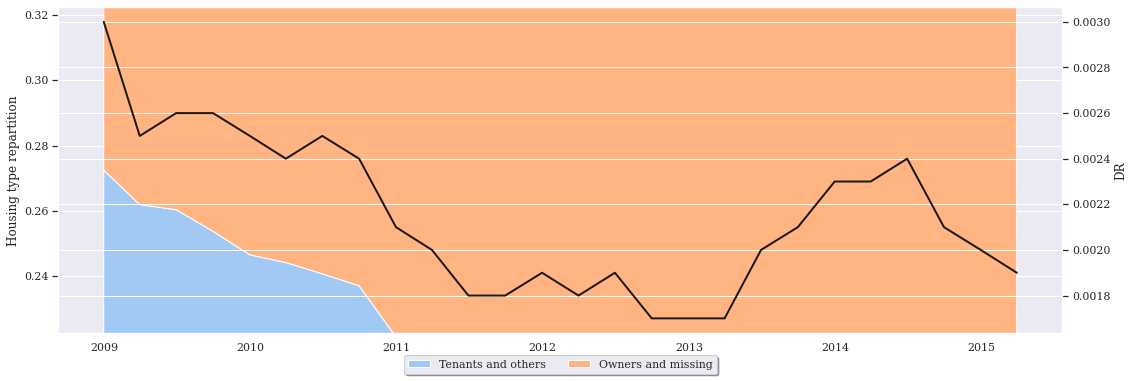

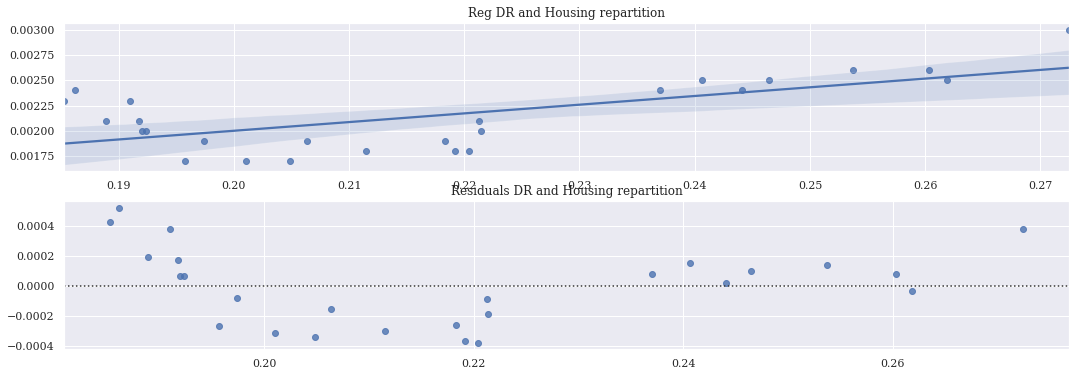

In [40]:
explo_habitation(df2,Y2)

## Etat civil

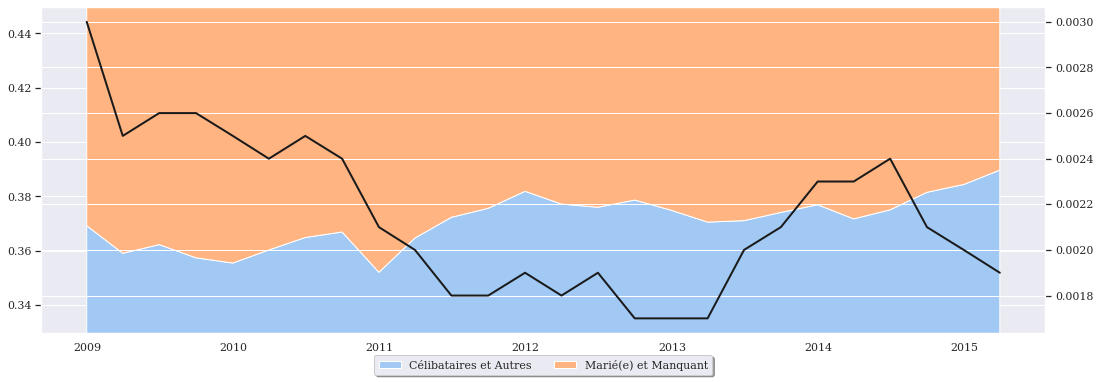

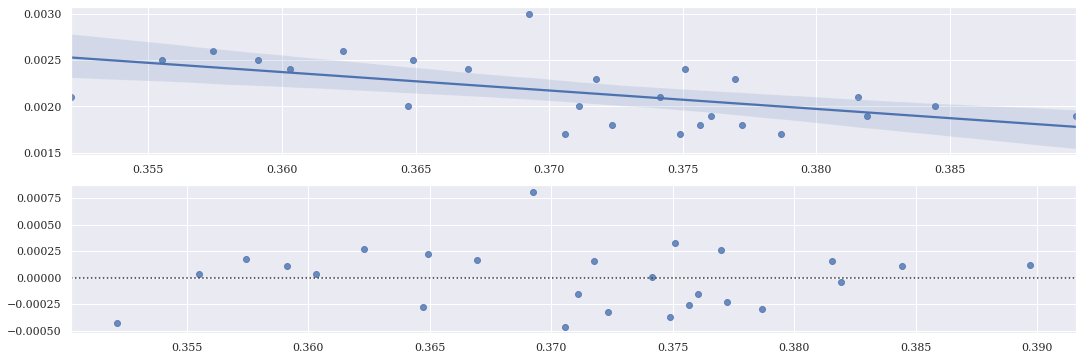

In [41]:
explo_civil(df2,Y2)

## Code qualité du véhicule

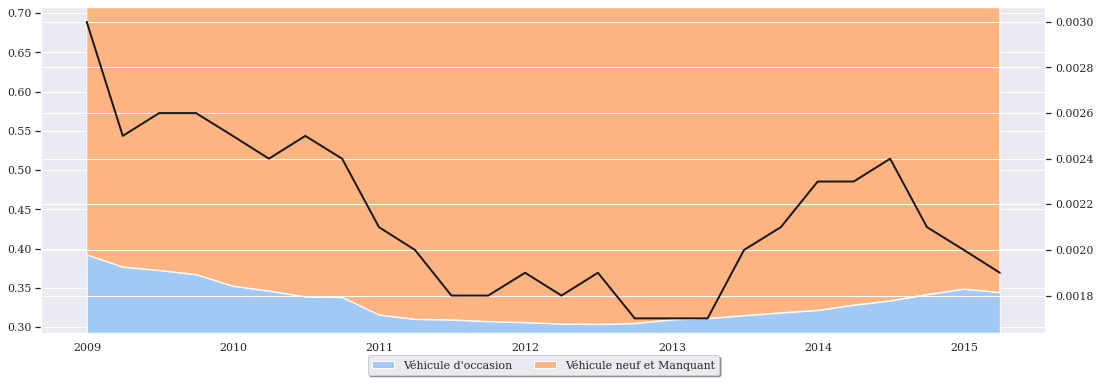

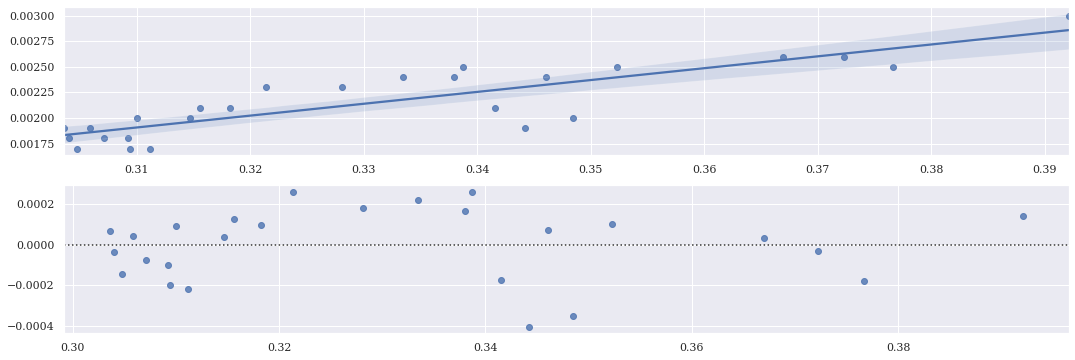

In [42]:
explo_code_qualite(df2,Y2)

## Profession

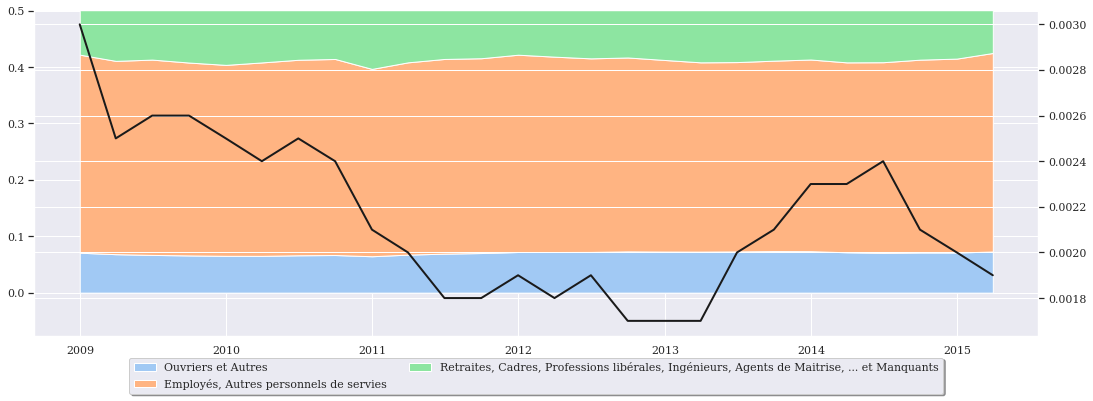

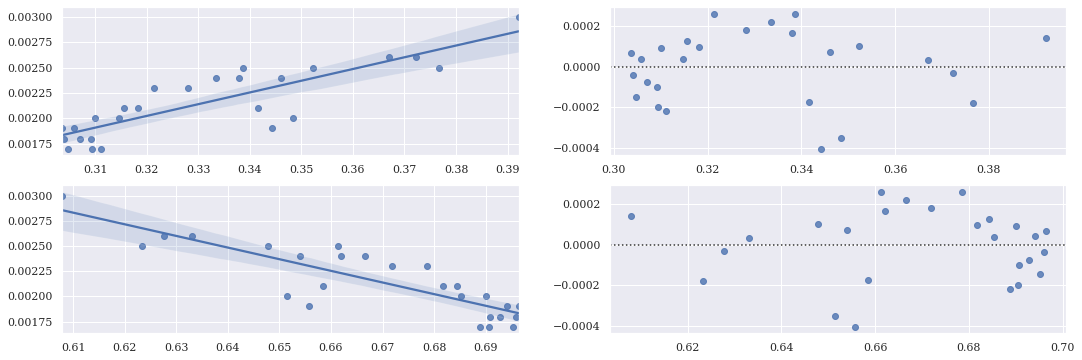

In [43]:
explo_profession(df2,Y2)

## Macro

**About PIB**

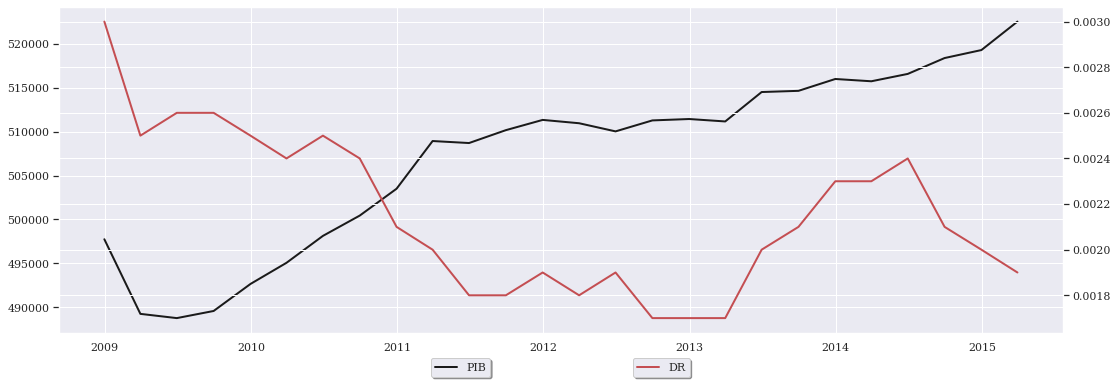

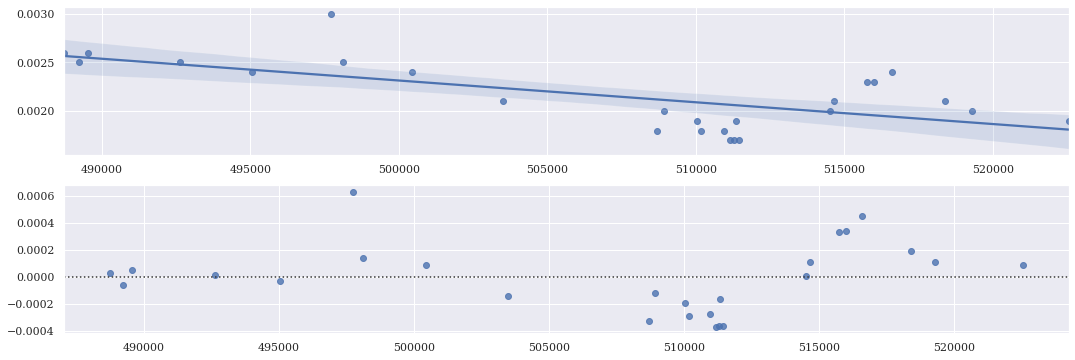

In [44]:
explo_pib(df2,Y2)

**About Inflation**

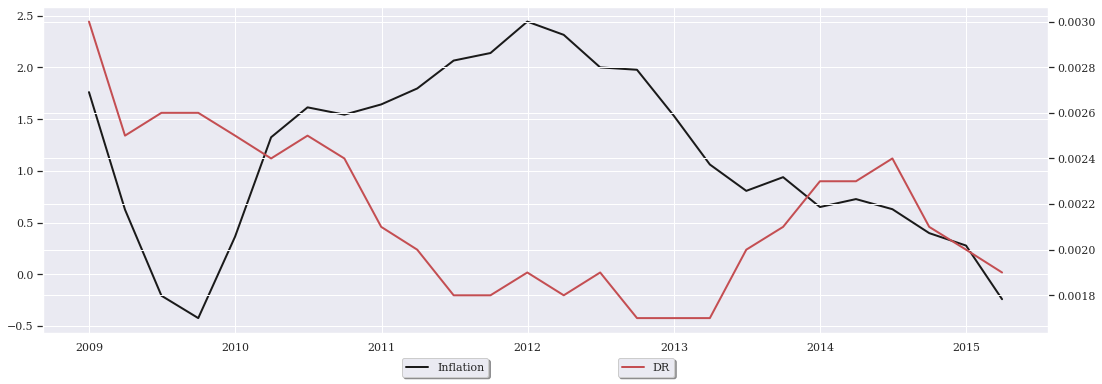

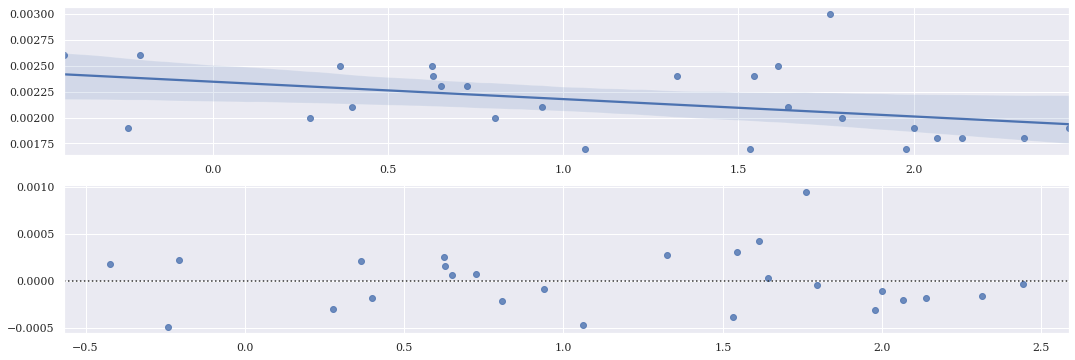

In [45]:
explo_inflation(df2,Y2)

**Taux chomage**

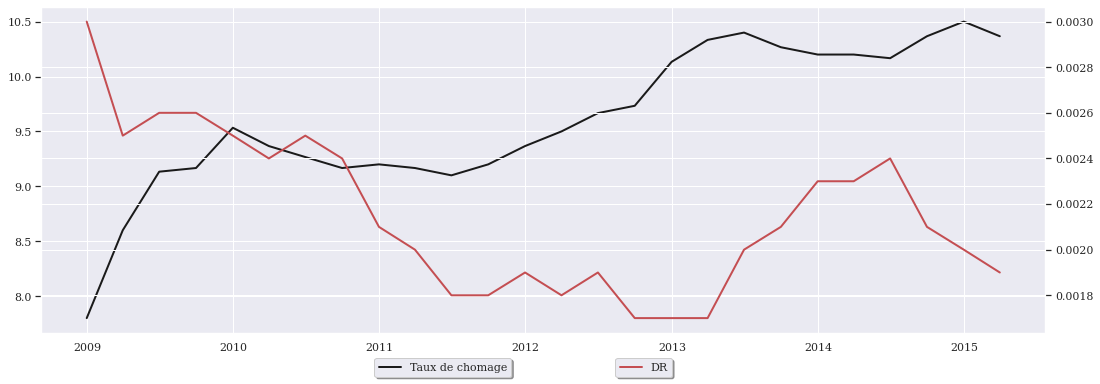

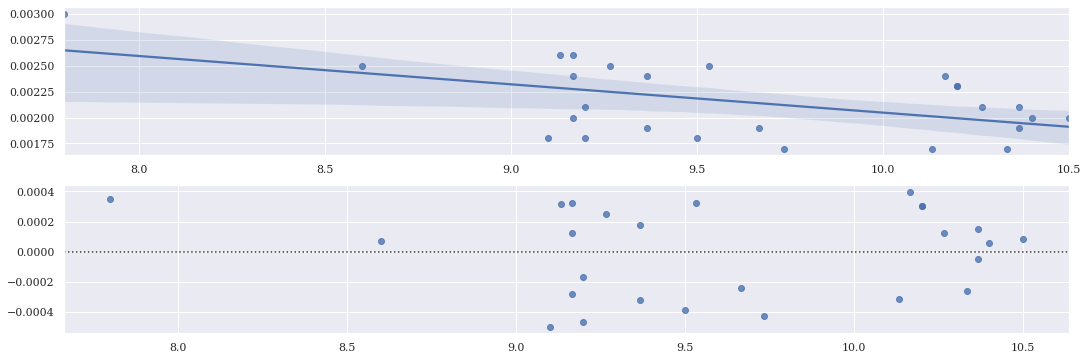

In [46]:
explo_txcho(df2,Y2)

# Exploration chronique 8

## Exploration DR

count    26.000000
mean      0.148165
std       0.010758
min       0.136400
25%       0.141850
50%       0.145300
75%       0.151700
max       0.192400
Name: DR, dtype: float64


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


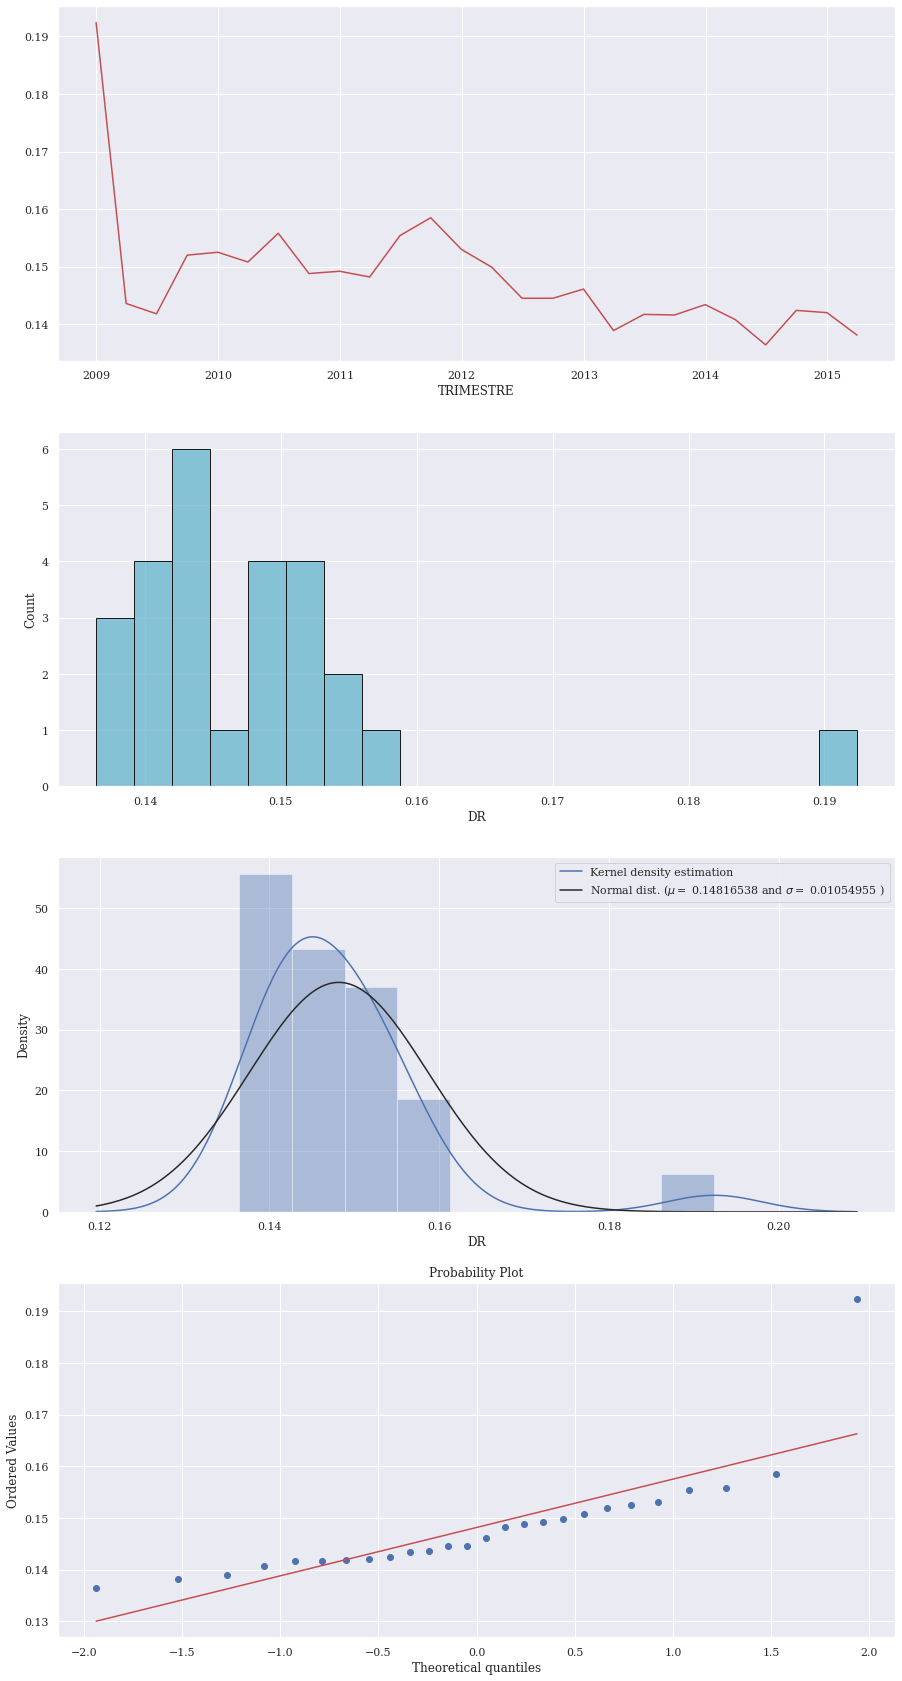

In [47]:
explo_DR(df8,Y8)

## Exploration portefeuille

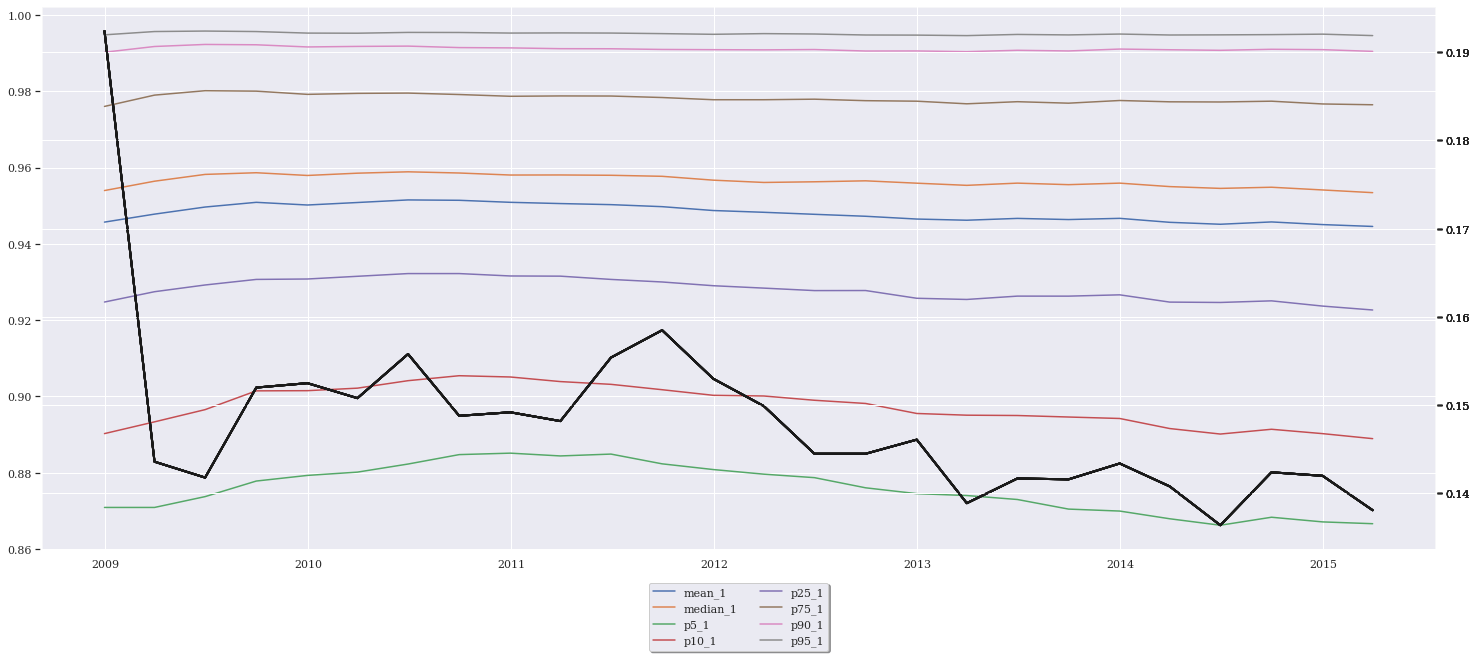

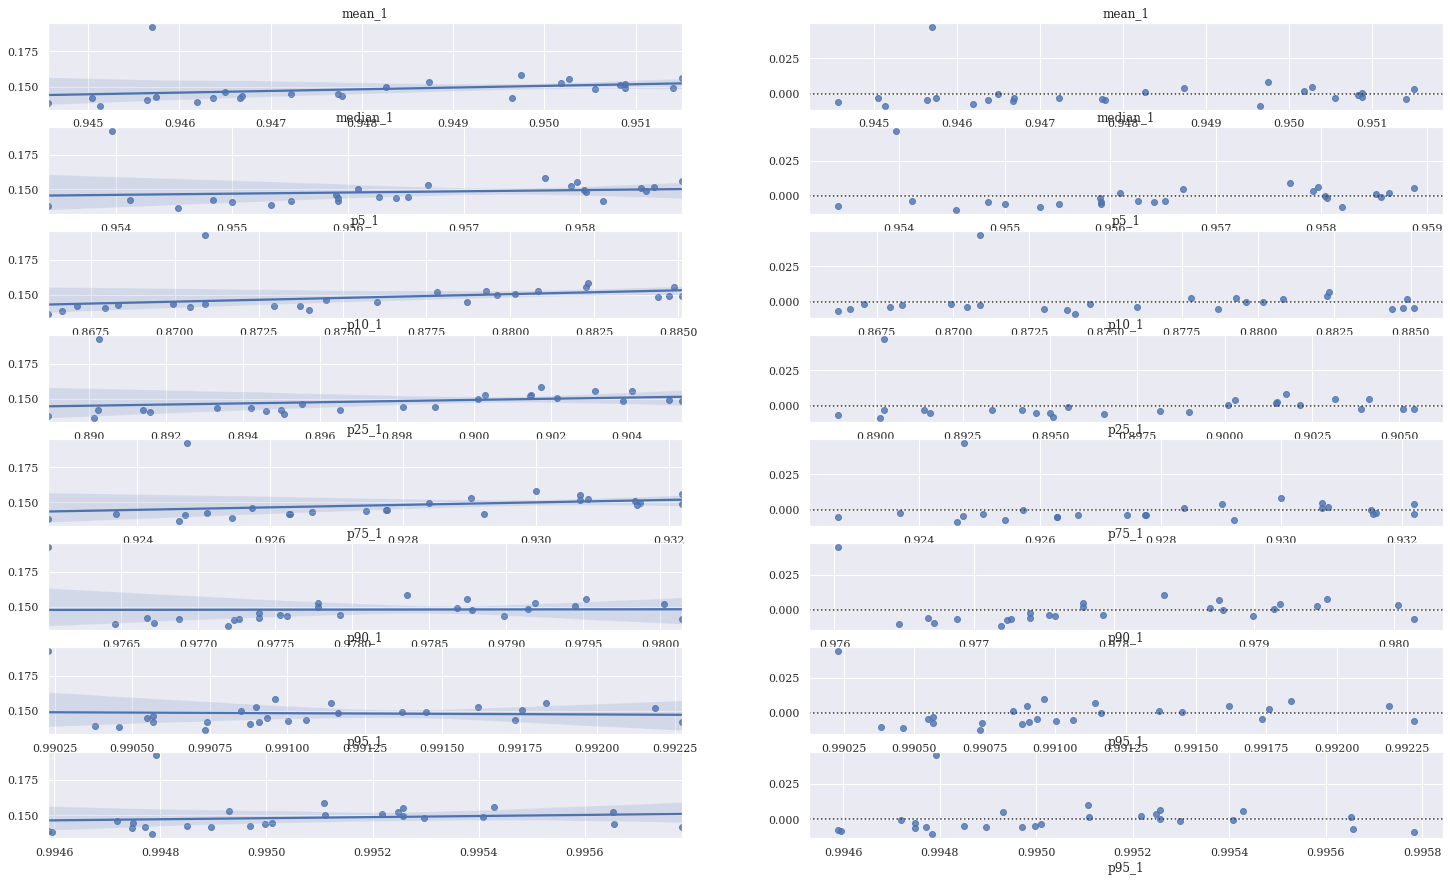

In [48]:
explo_portefeuille(df8,Y8,1)

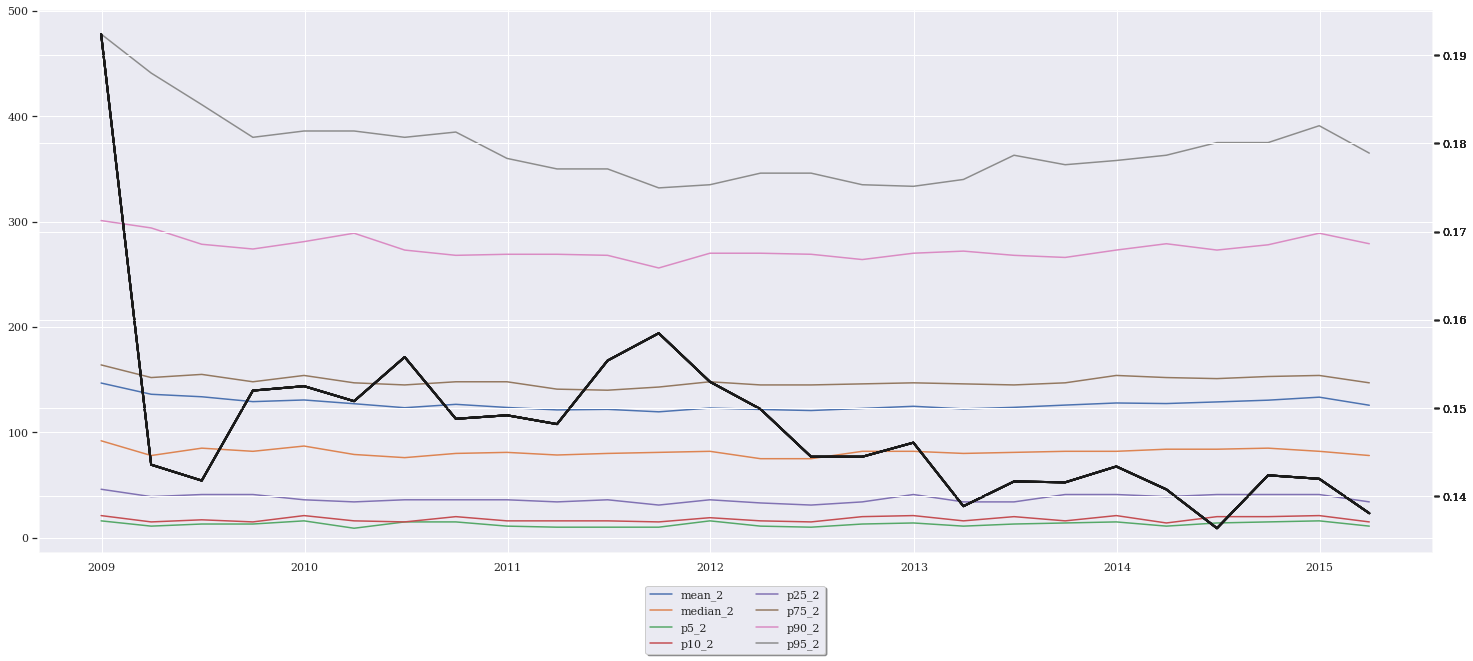

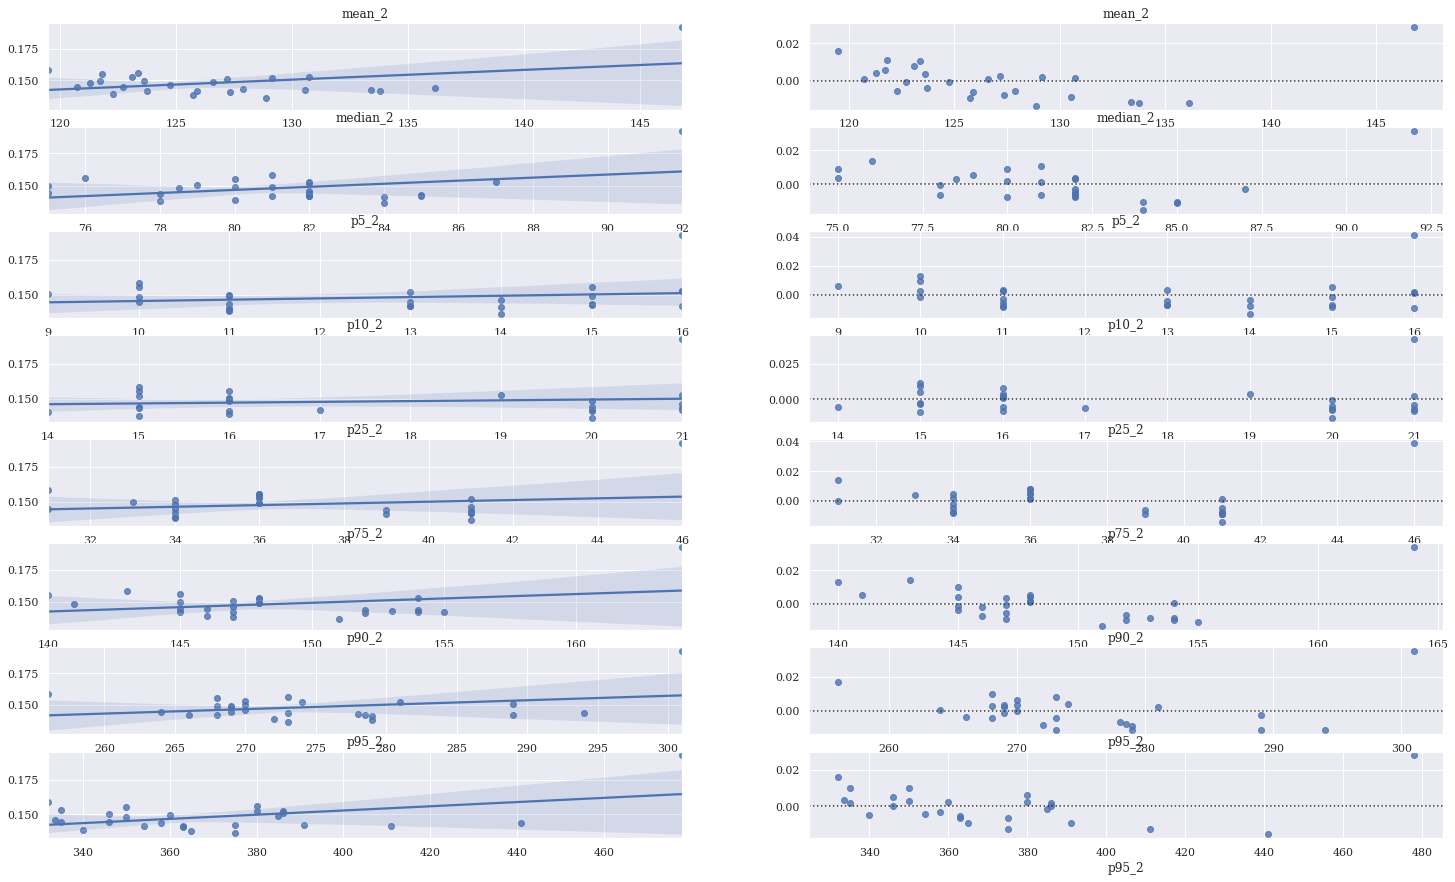

In [49]:
explo_portefeuille(df8,Y8,2)

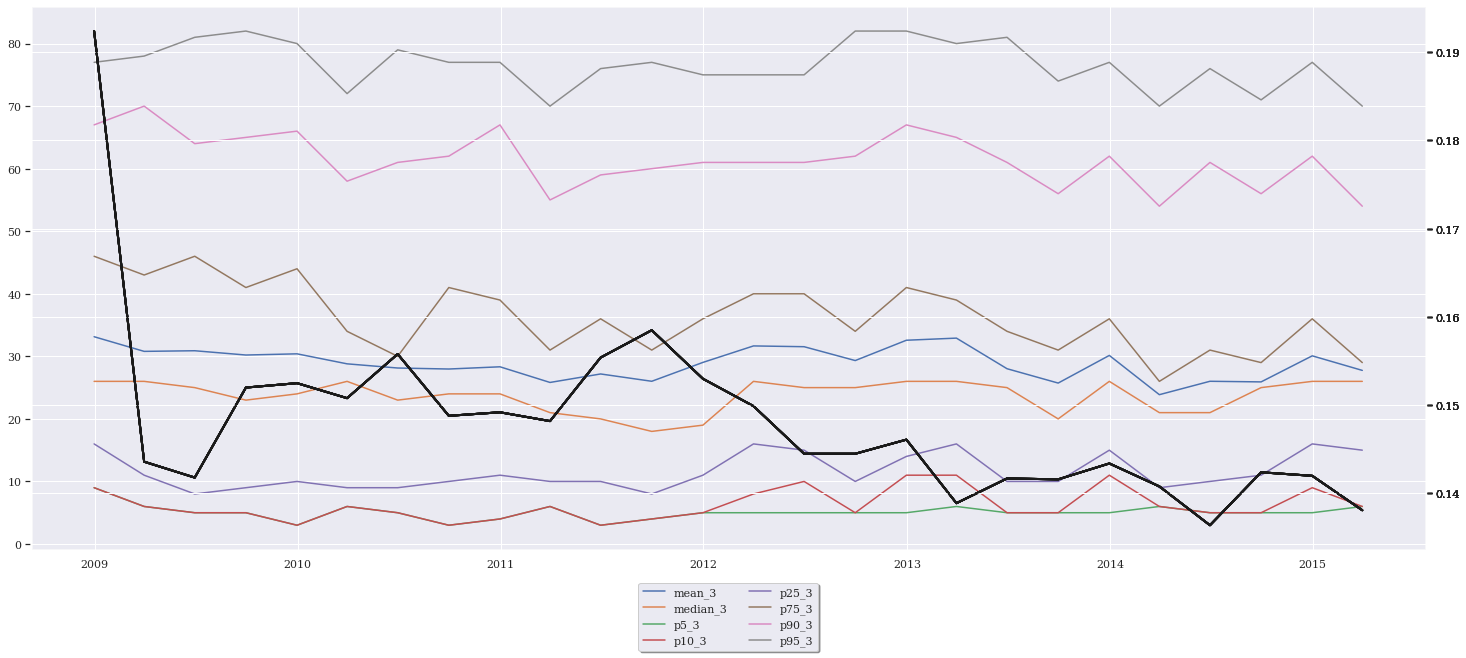

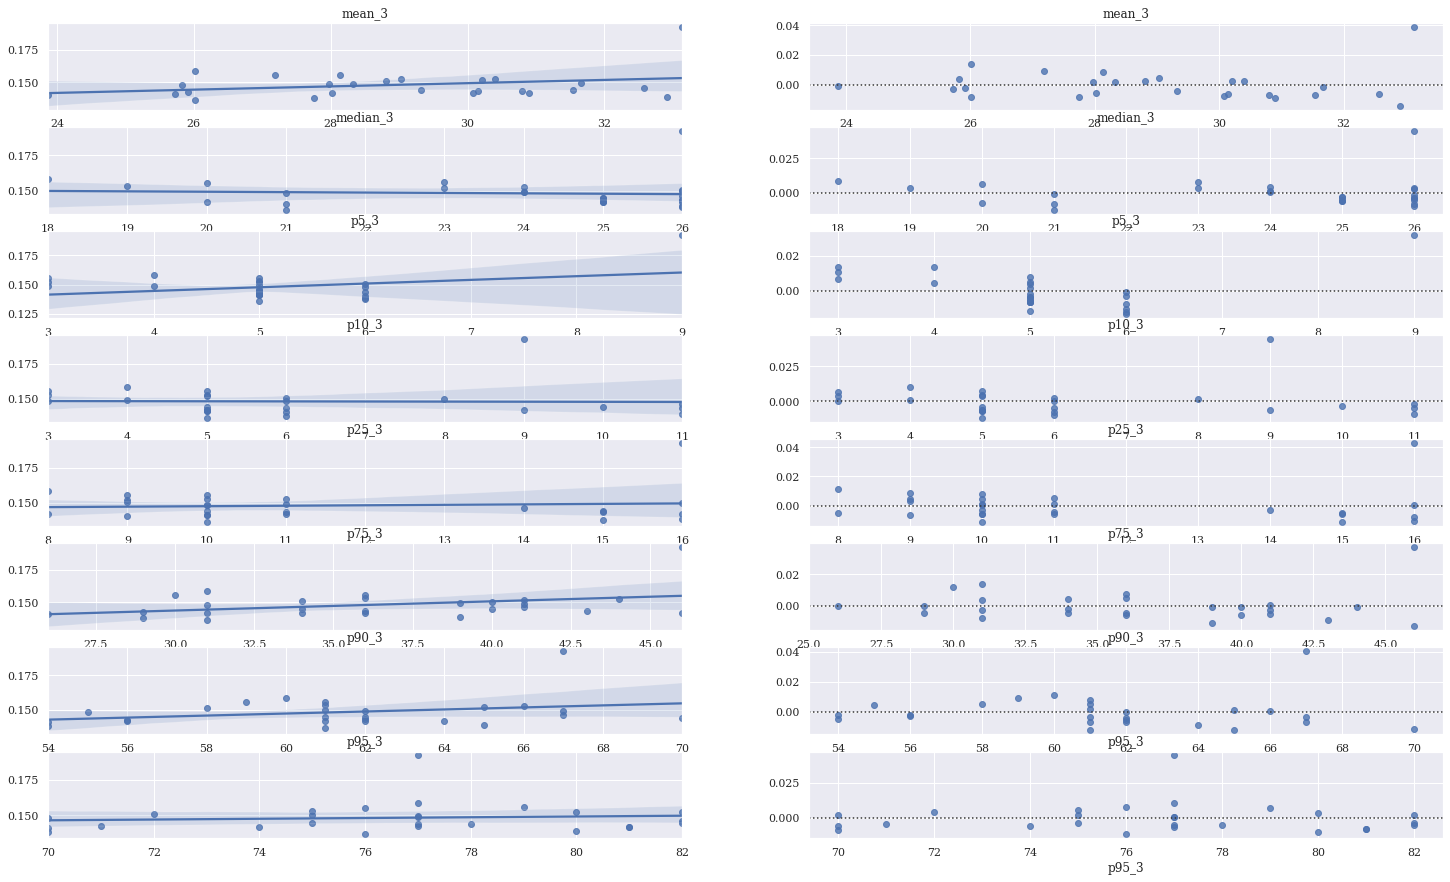

In [50]:
explo_portefeuille(df8,Y8,3)

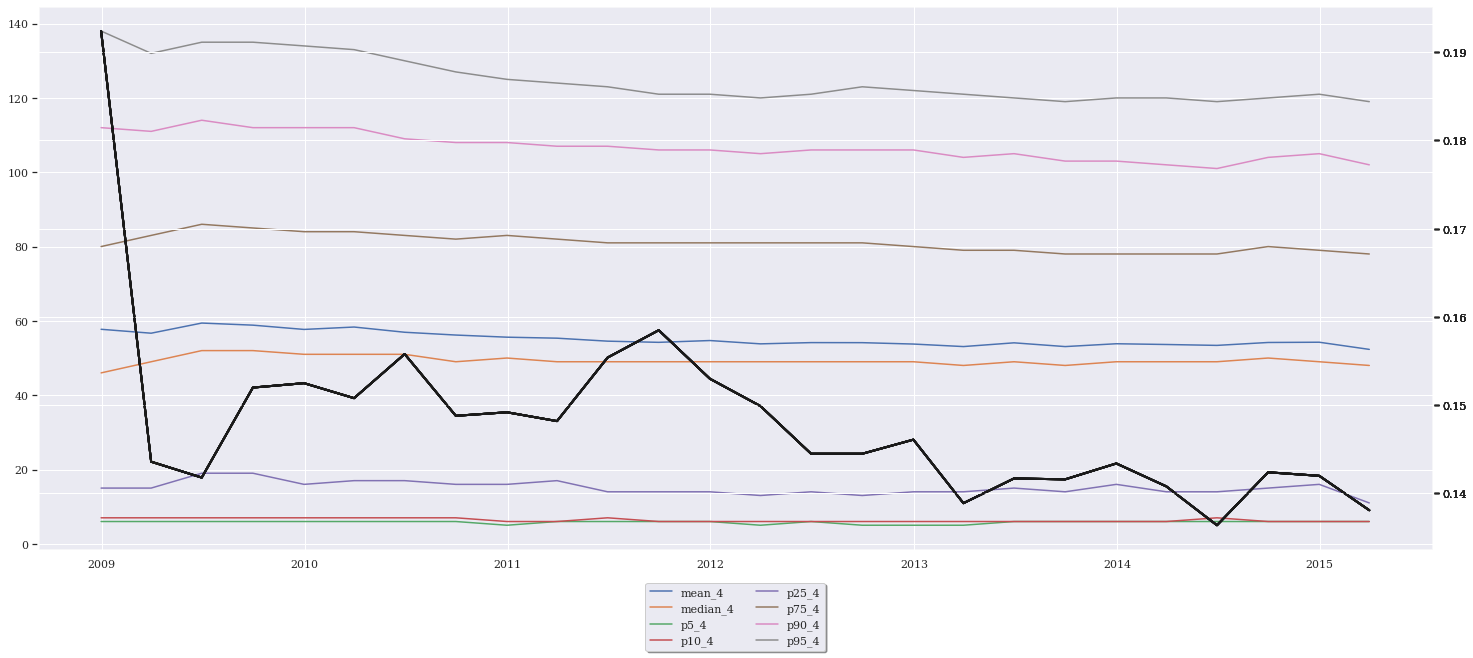

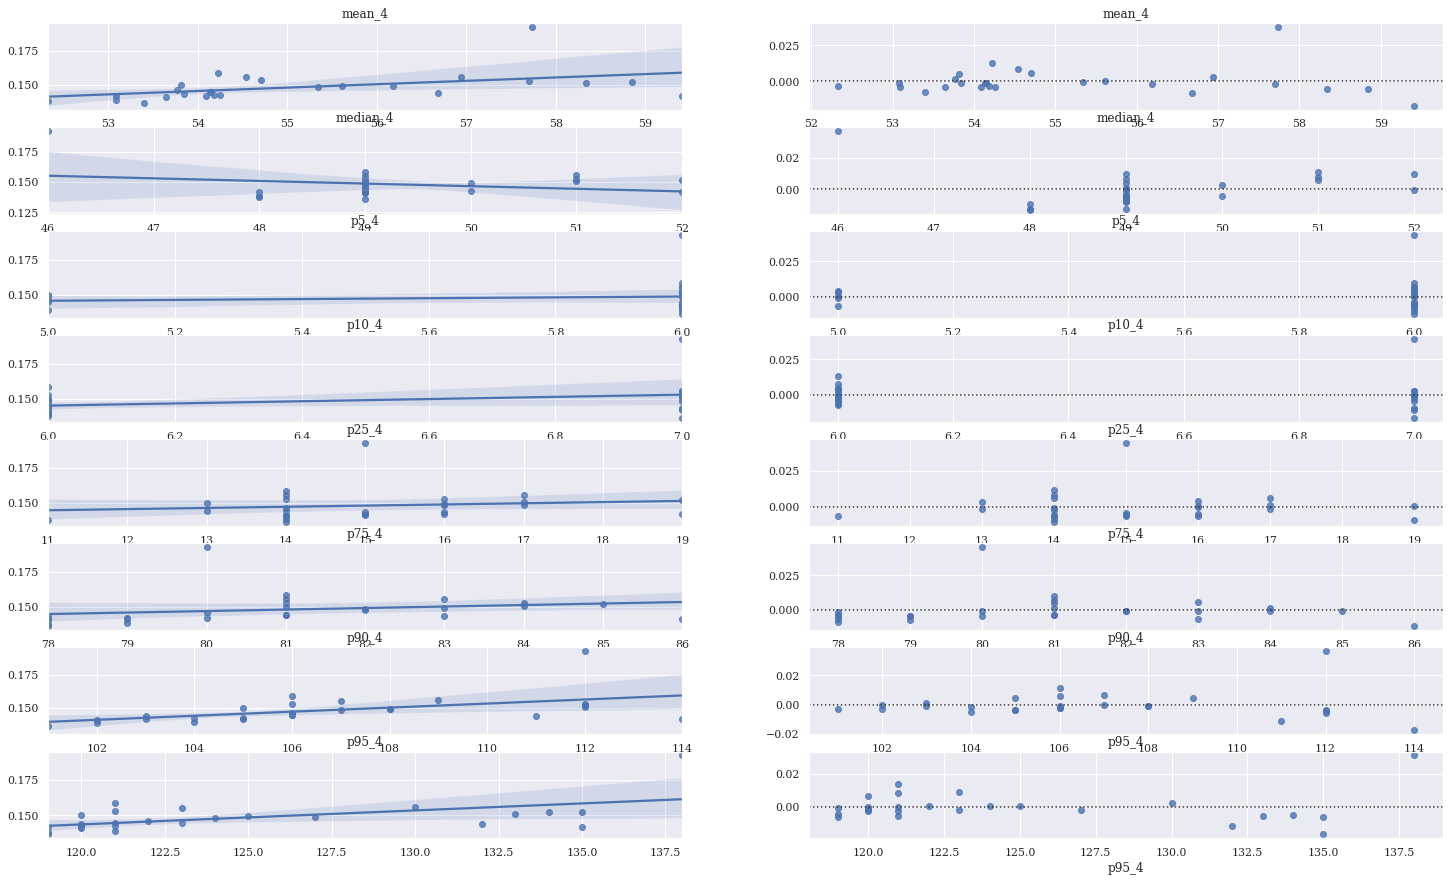

In [51]:
explo_portefeuille(df8,Y8,4)

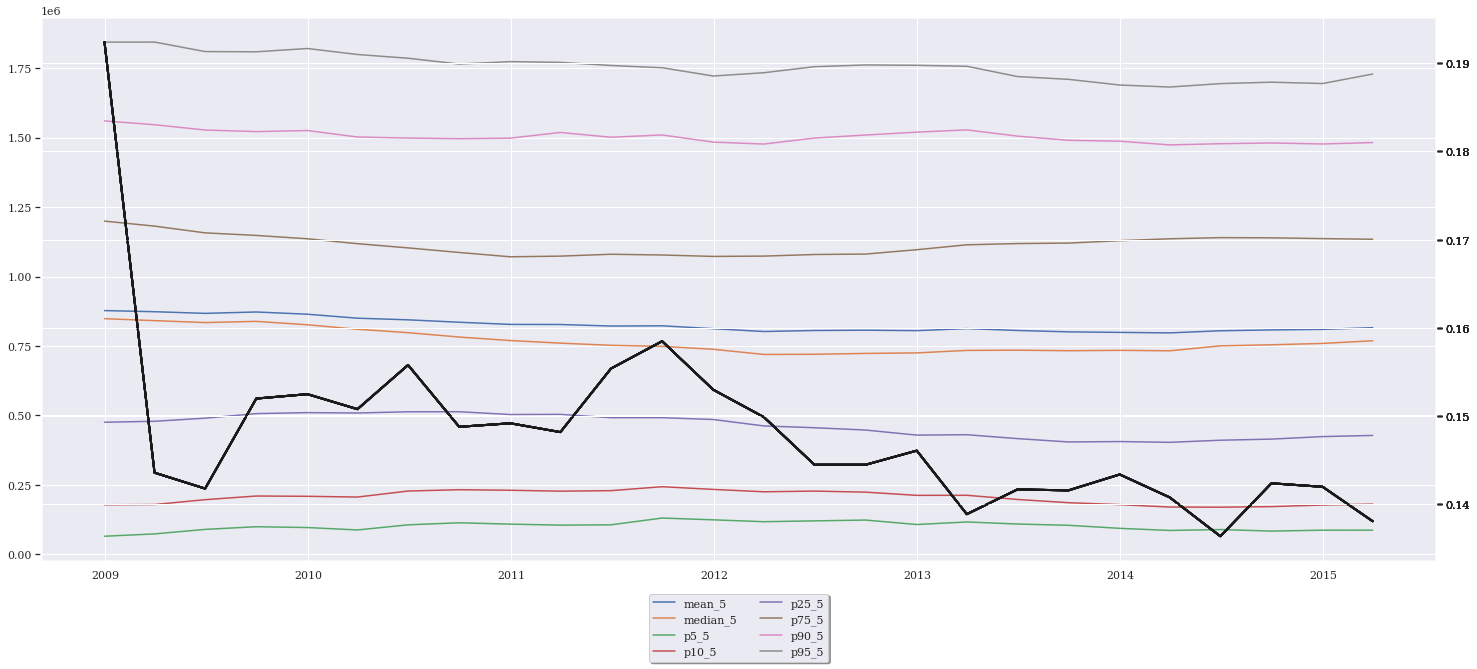

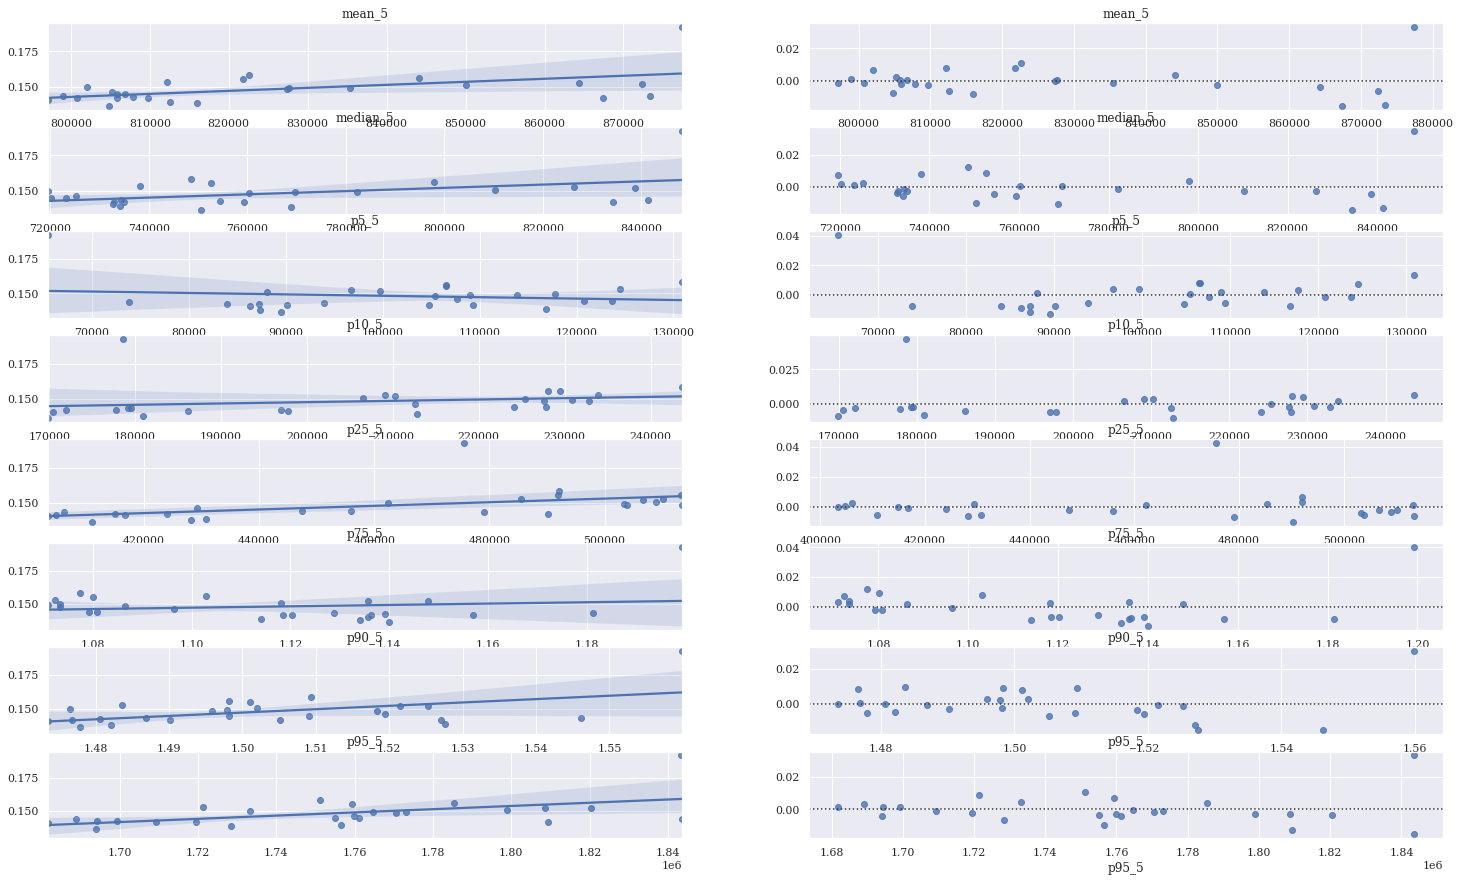

In [52]:
explo_portefeuille(df8,Y8,5)

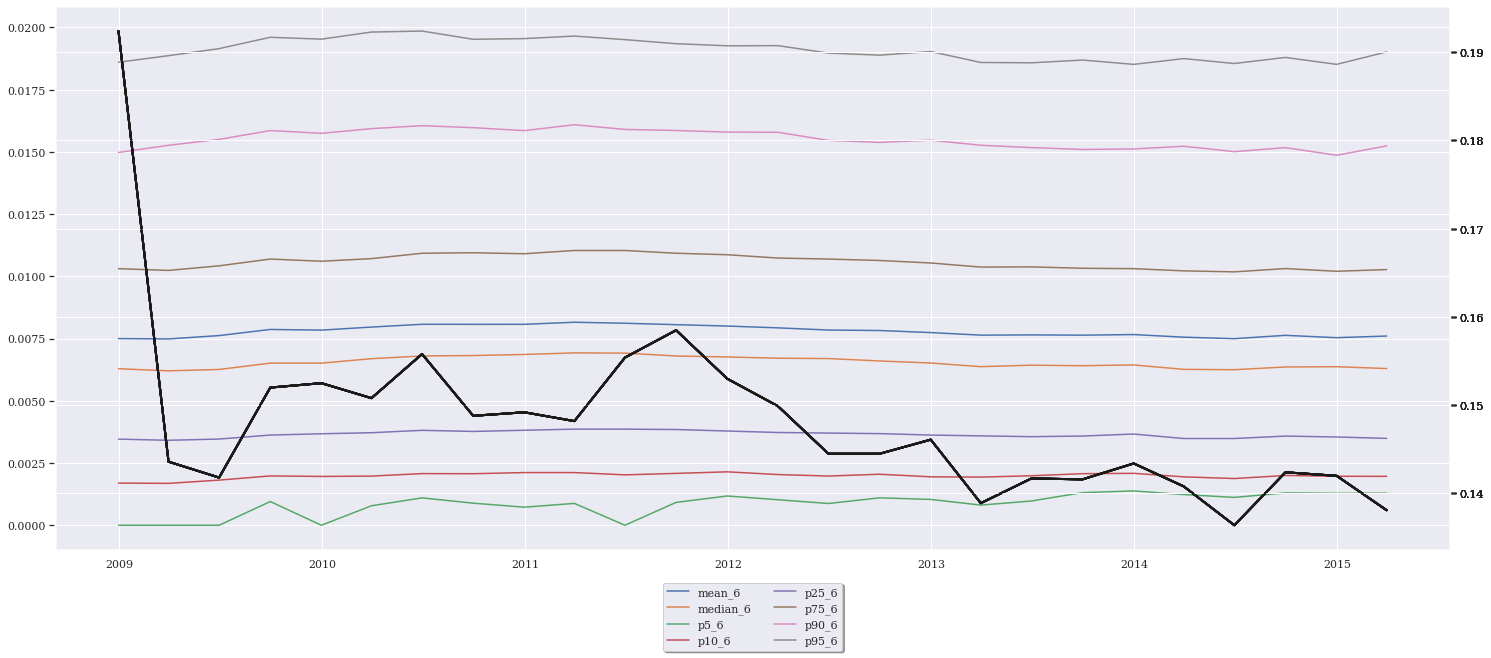

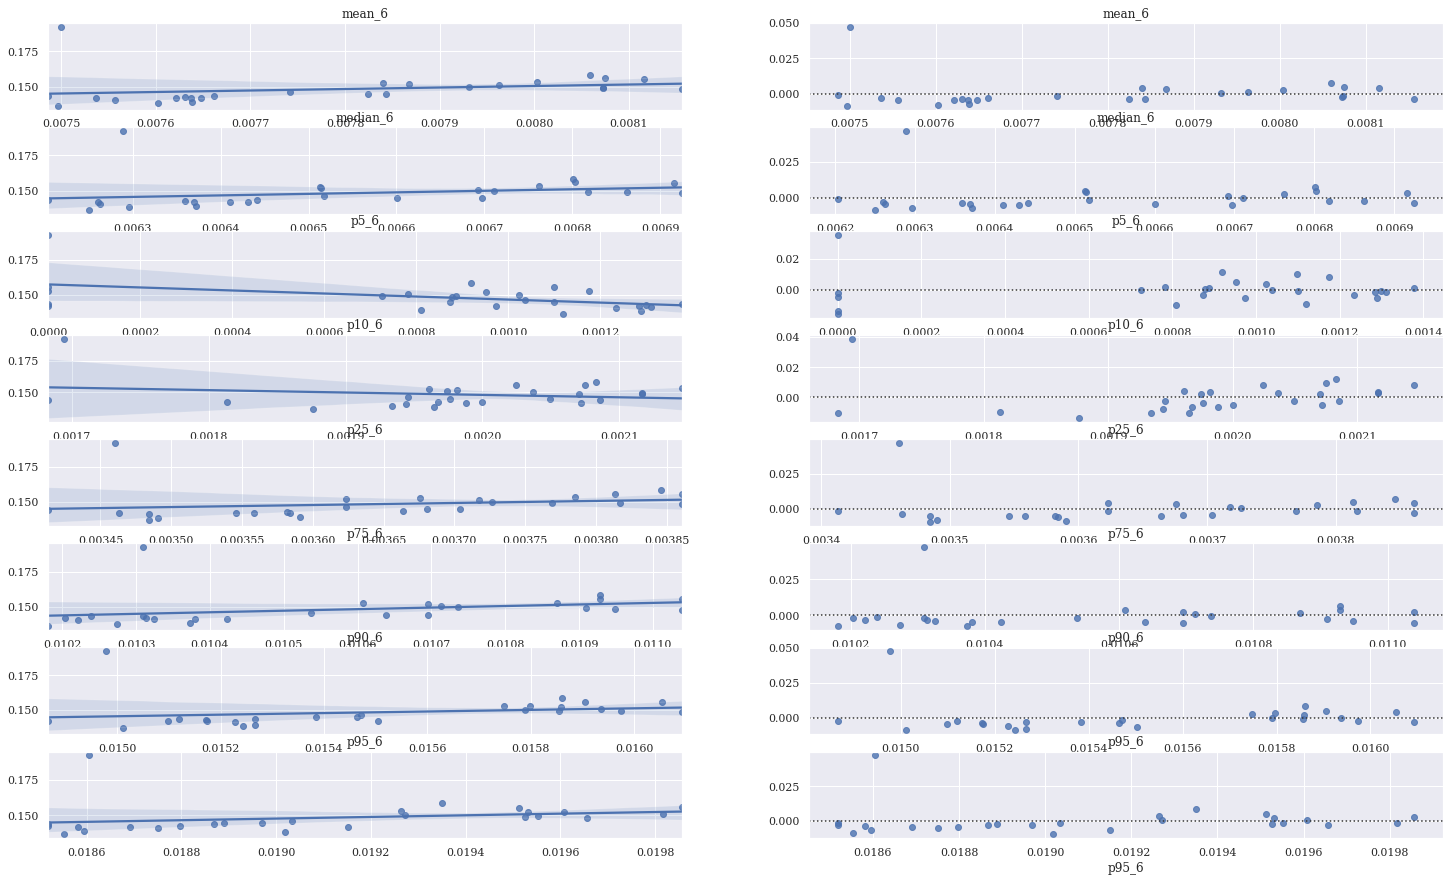

In [53]:
explo_portefeuille(df8,Y8,6)

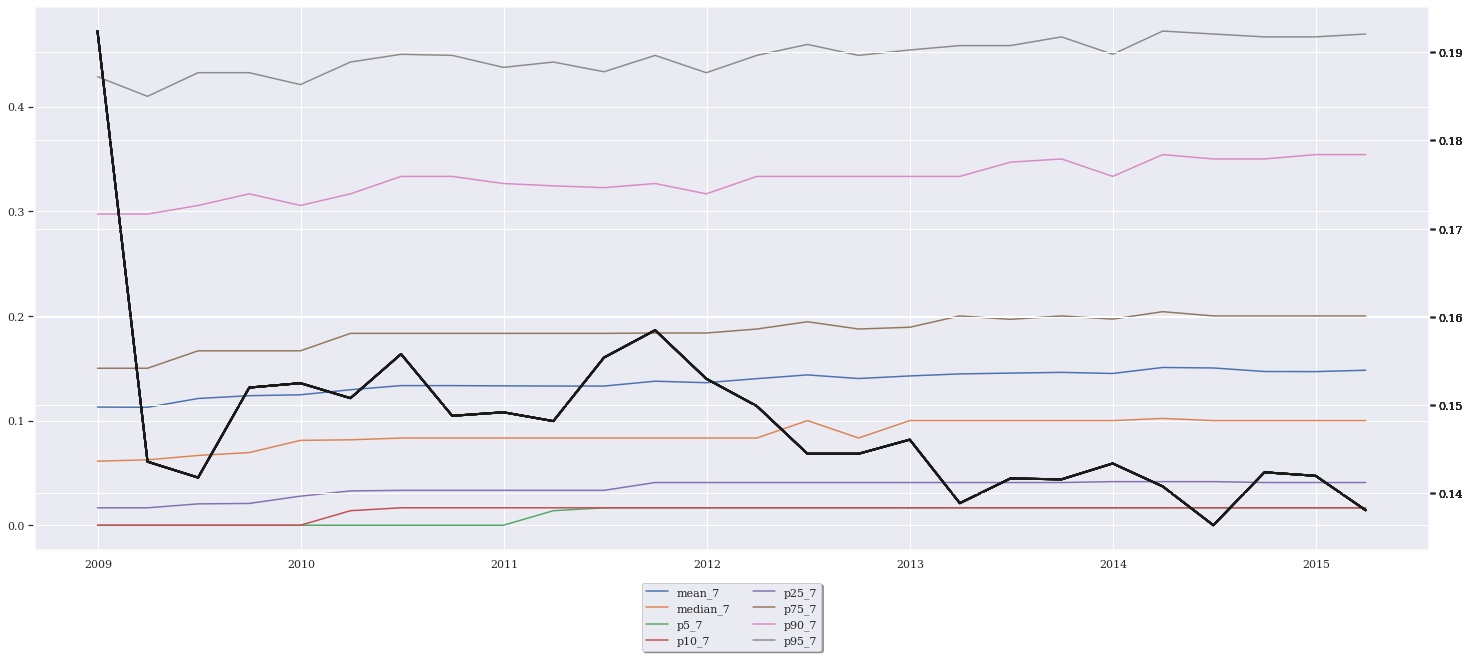

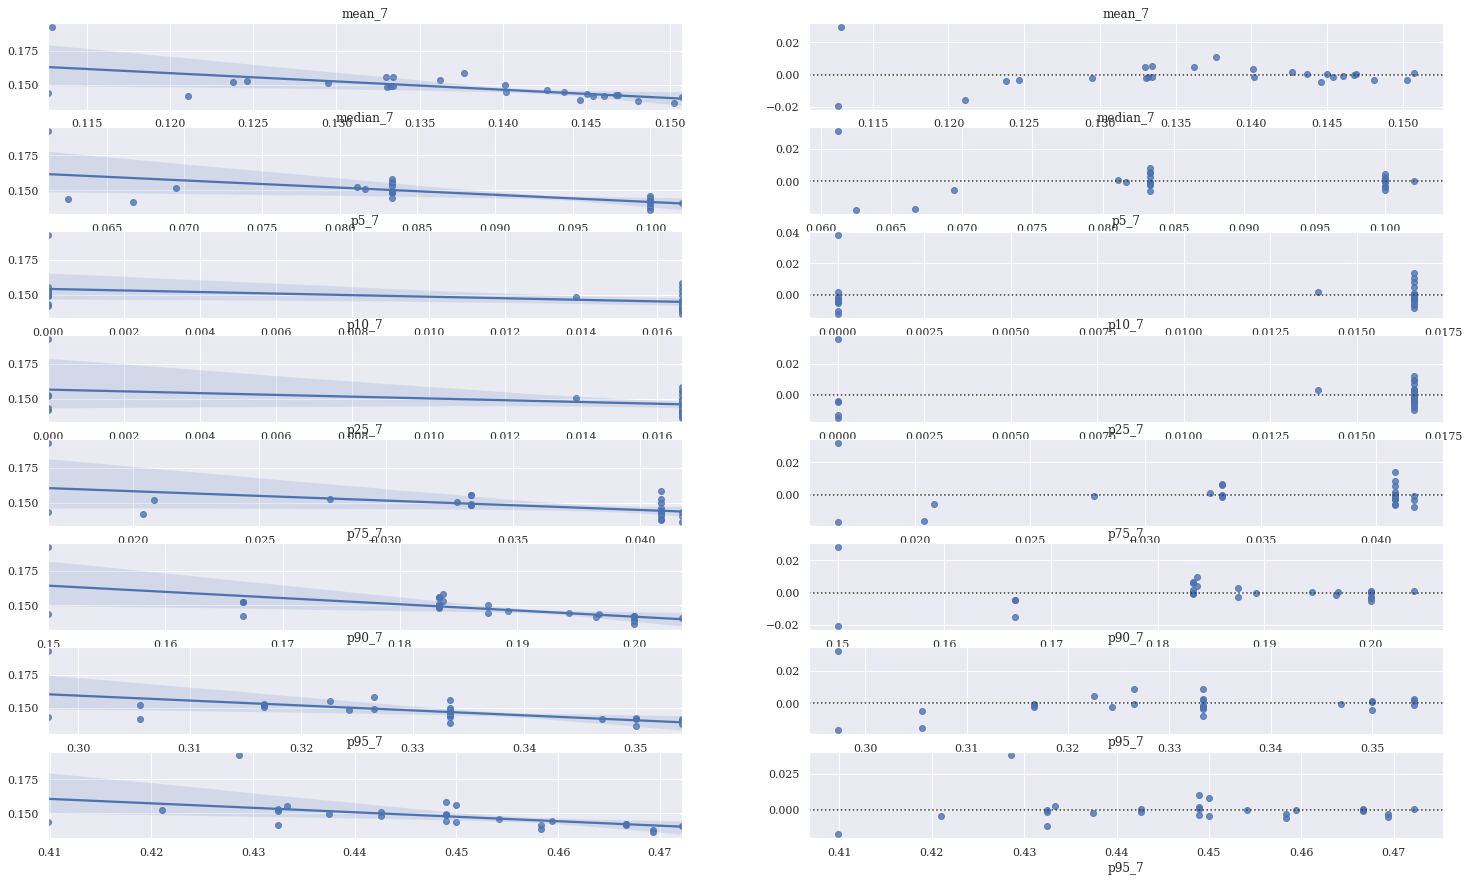

In [54]:
explo_portefeuille(df8,Y8,7)

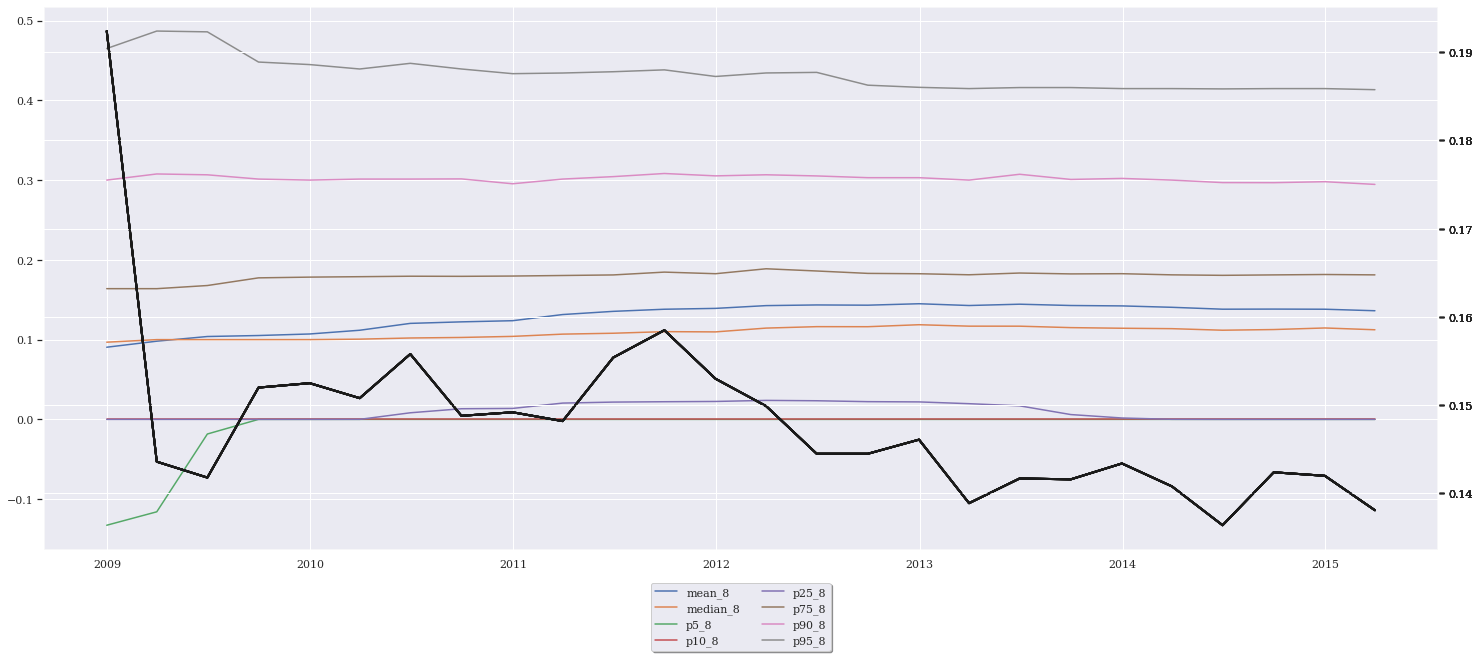

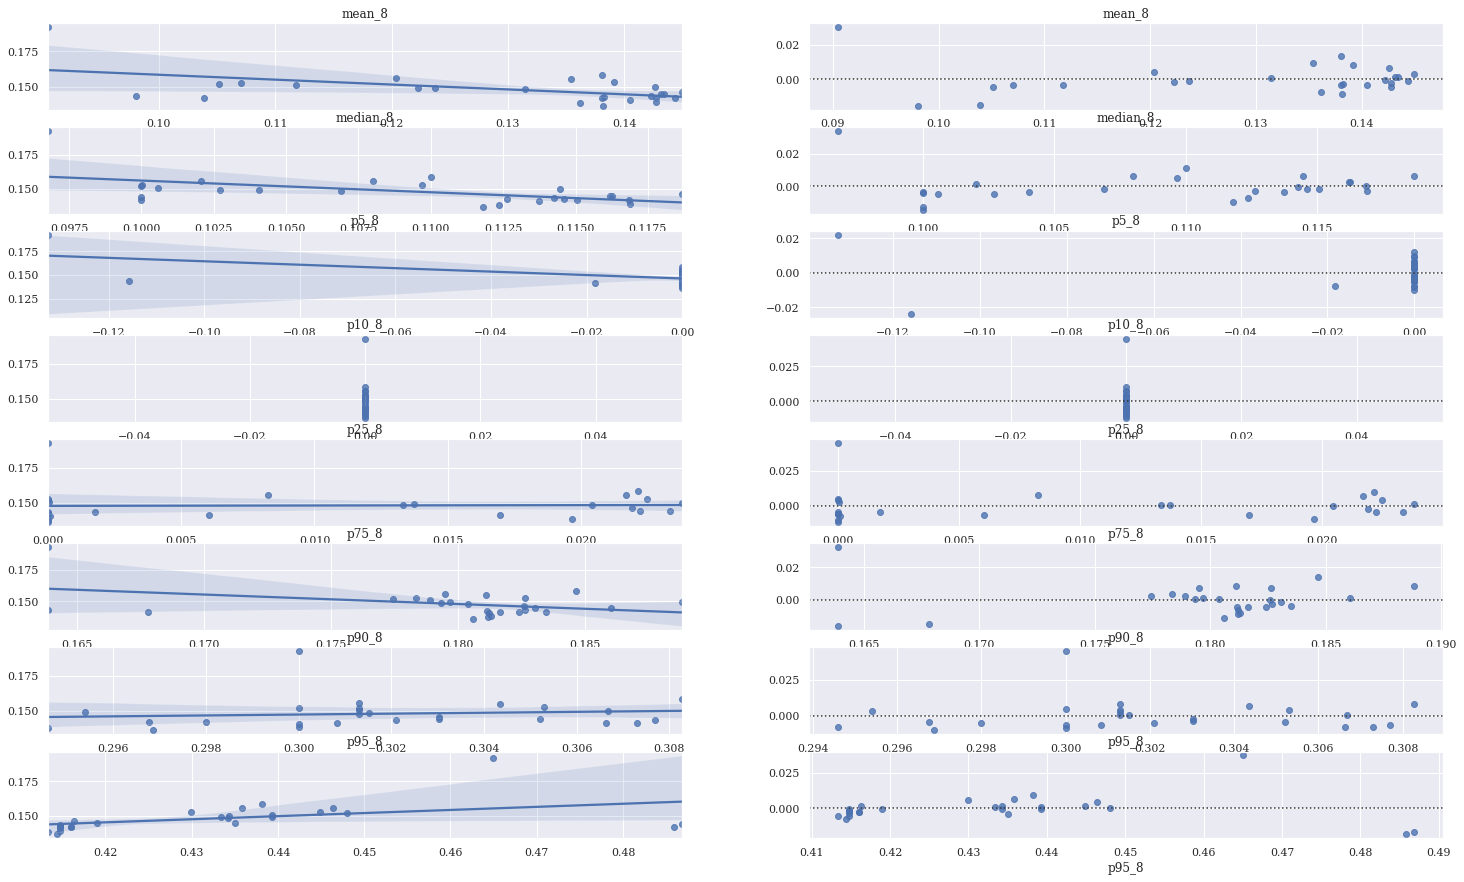

In [55]:
explo_portefeuille(df8,Y8,8)

## Type de client

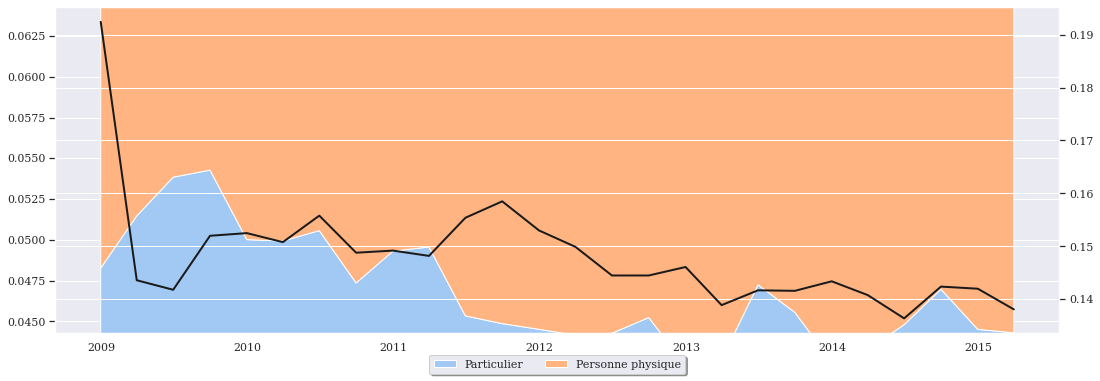

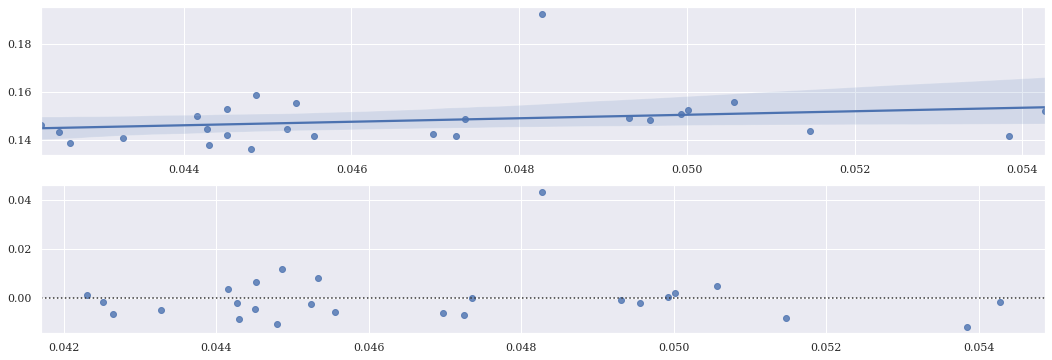

In [56]:
explo_client(df8,Y8)

## Mode d'habitation

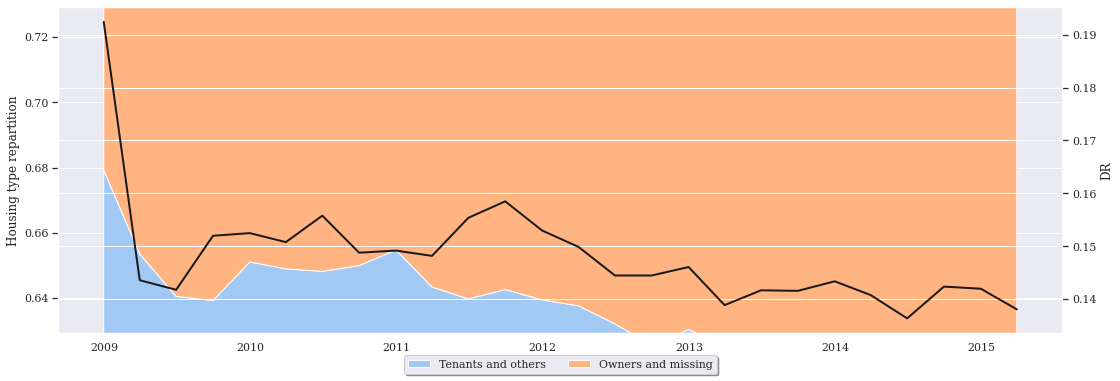

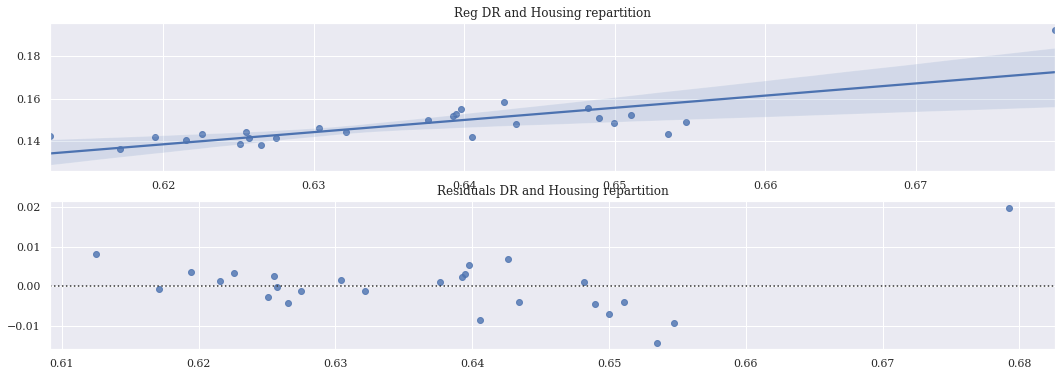

In [57]:
explo_habitation(df8,Y8)

## Etat civil

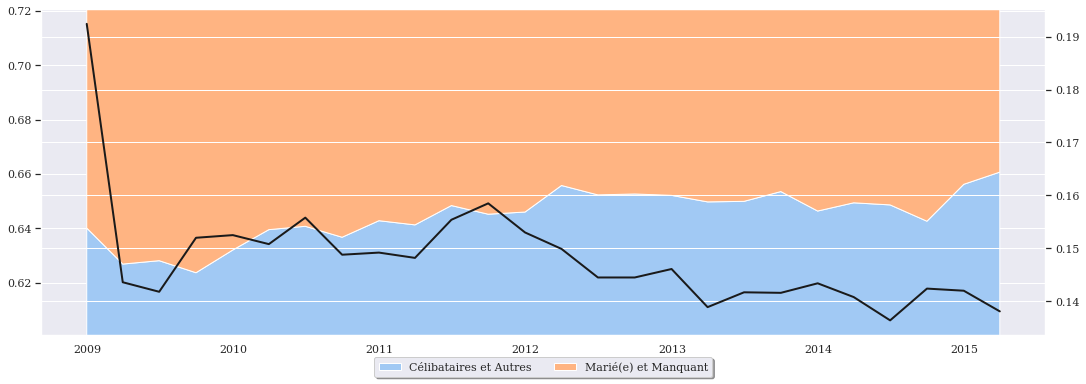

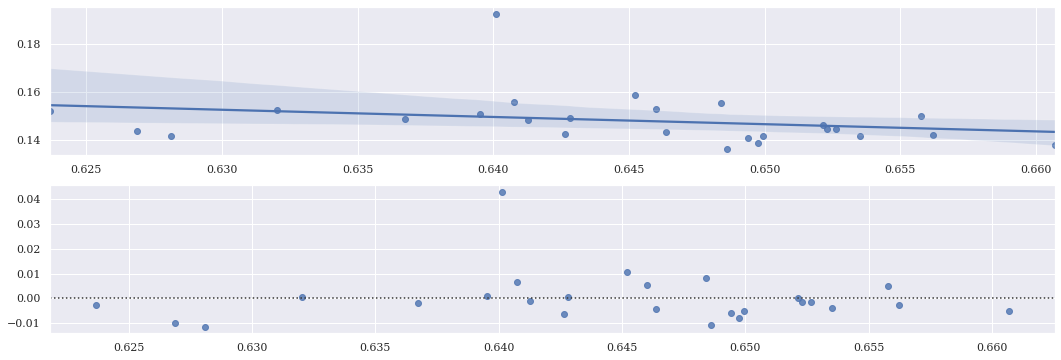

In [58]:
explo_civil(df8,Y8)

## Code qualité du véhicule

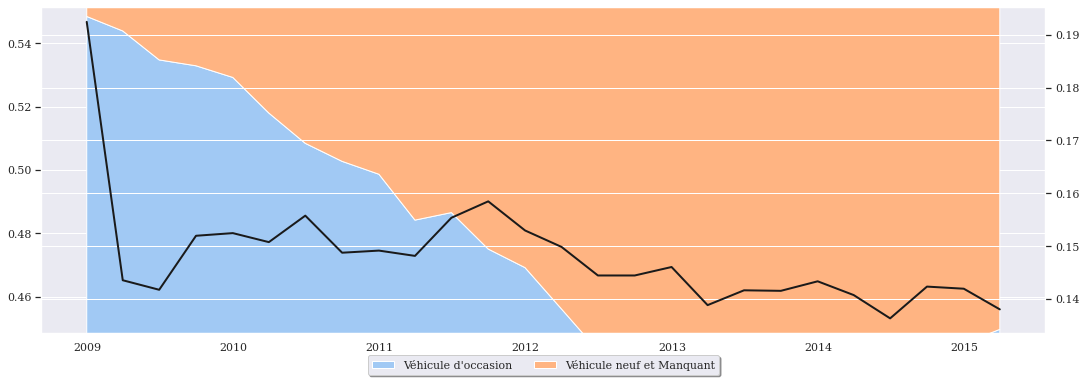

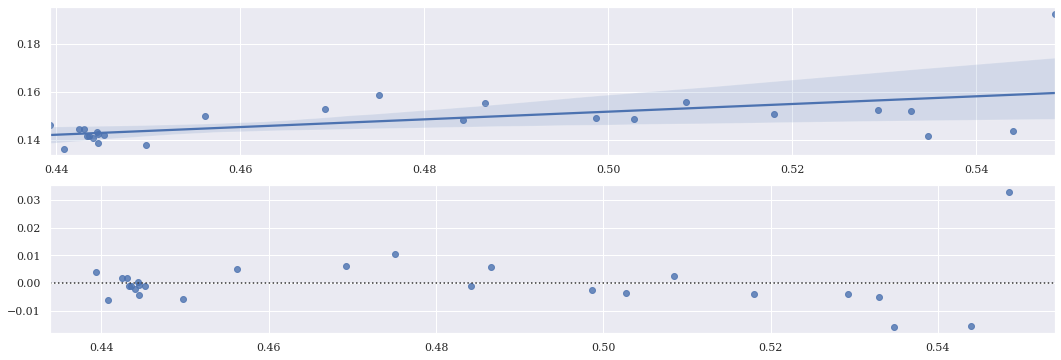

In [59]:
explo_code_qualite(df8,Y8)

## Profession

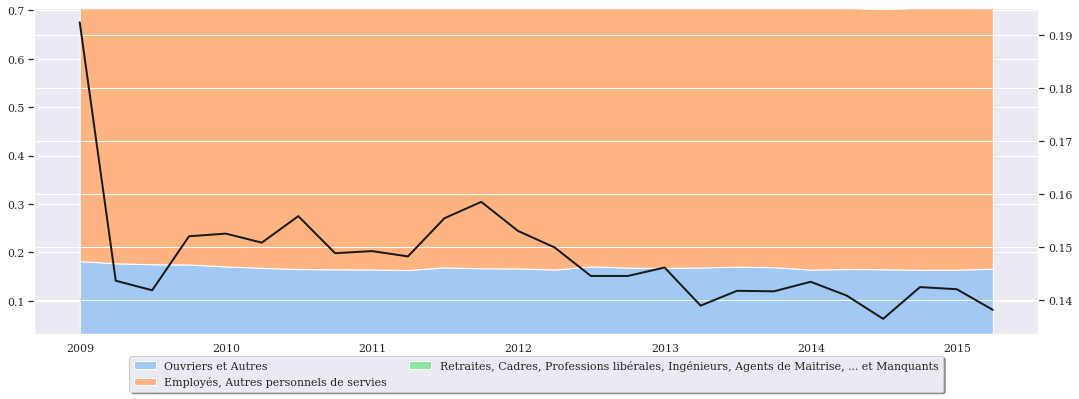

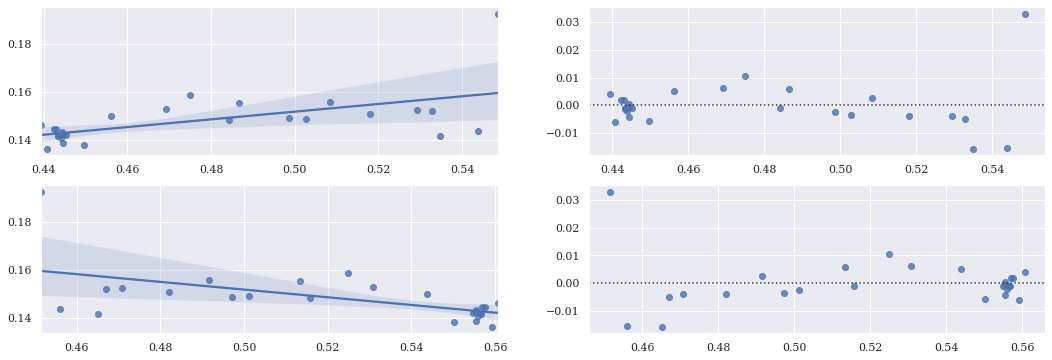

In [60]:
explo_profession(df8,Y8)

## Macro

**About PIB**

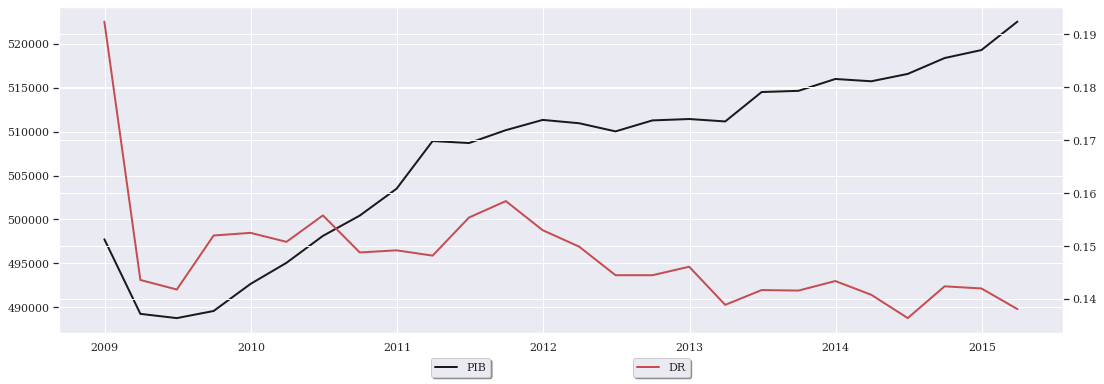

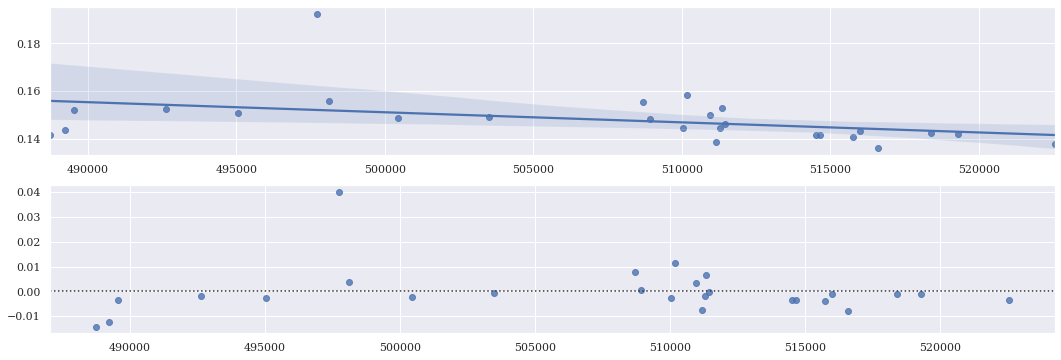

In [61]:
explo_pib(df8,Y8)

**About Inflation**

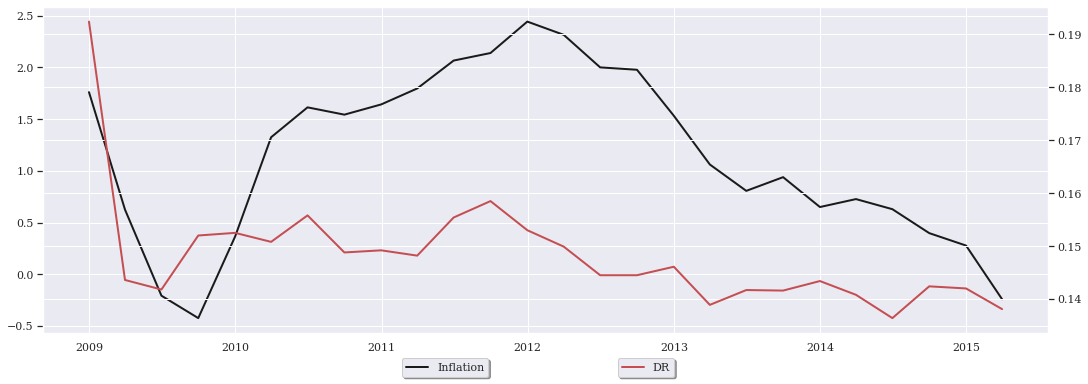

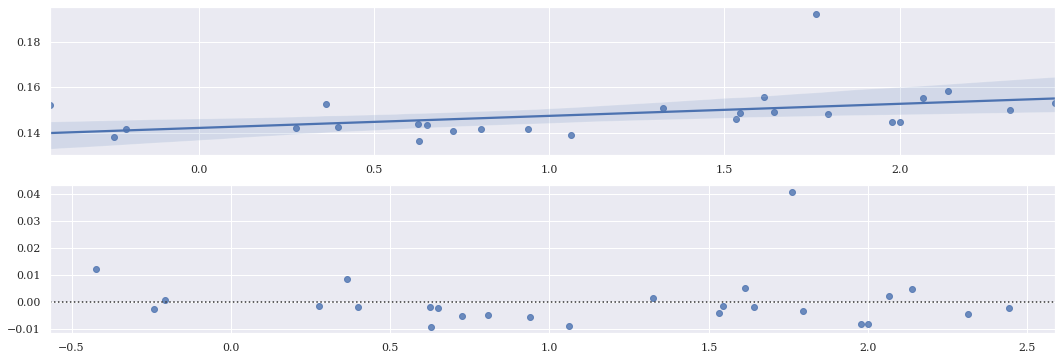

In [62]:
explo_inflation(df8,Y8)

**Taux chomage**

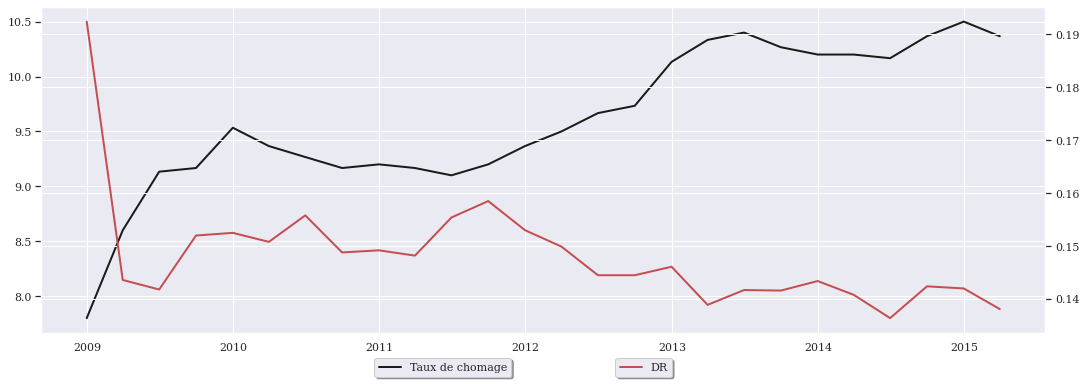

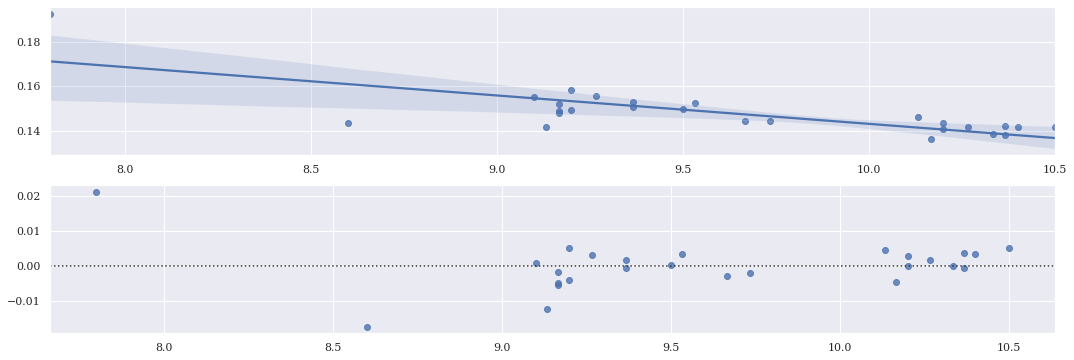

In [63]:
explo_txcho(df8,Y8)

# Exploration chronique totale

## Exploration DR

count    26.000000
mean      0.017204
std       0.001927
min       0.014500
25%       0.016325
50%       0.016650
75%       0.018300
max       0.024000
Name: DR, dtype: float64


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


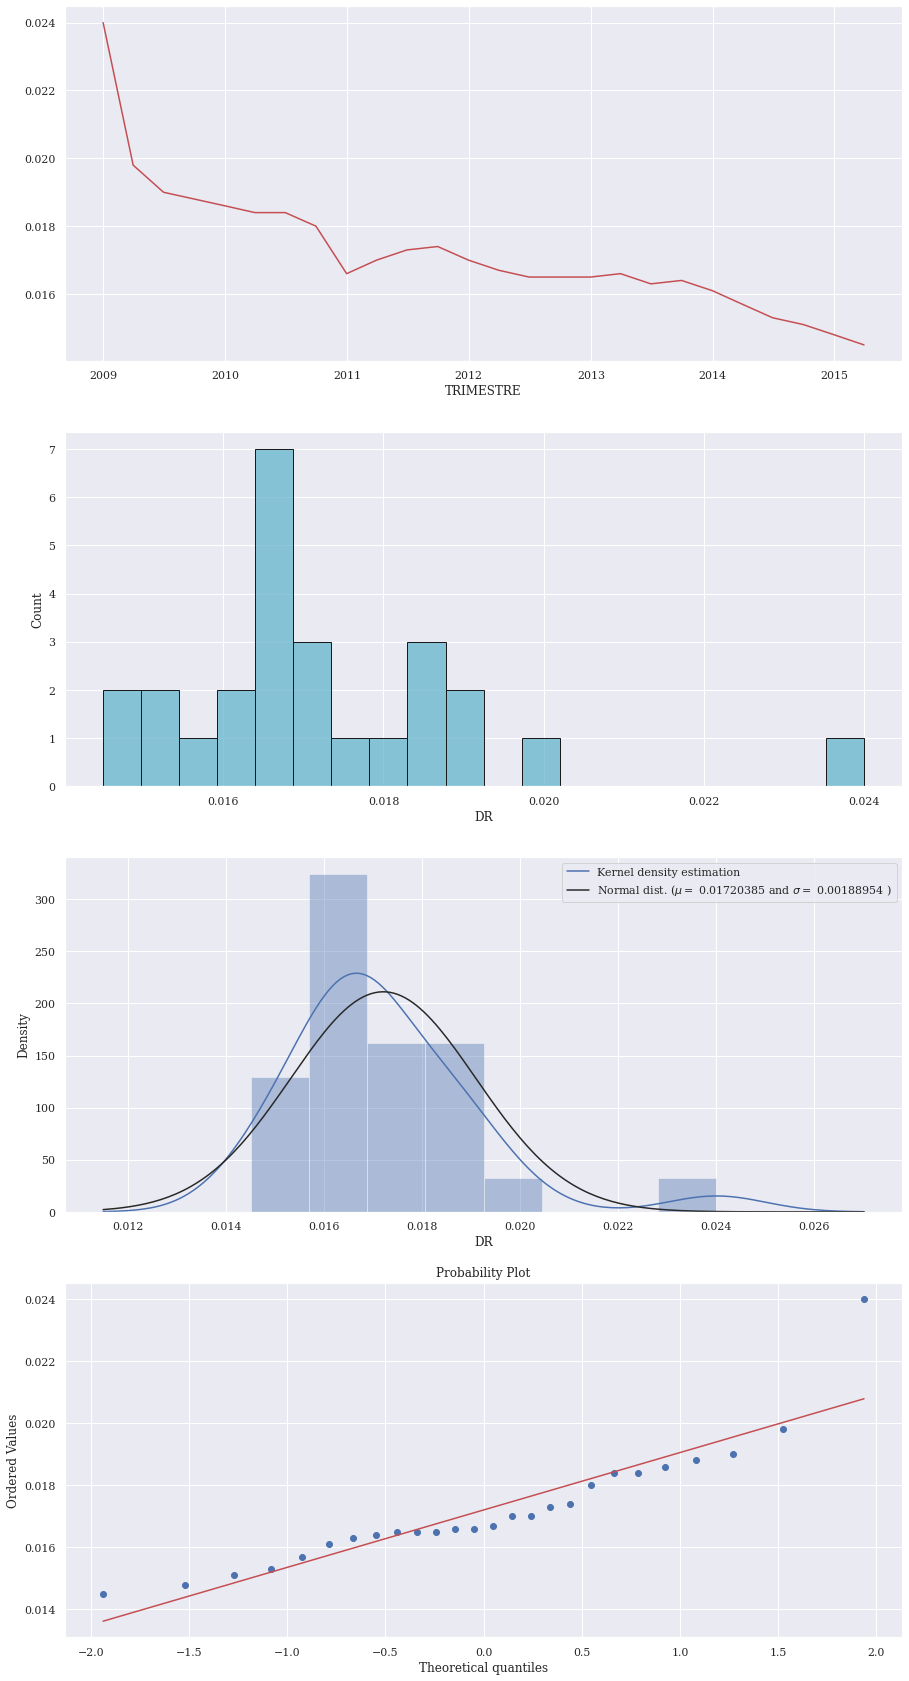

In [64]:
explo_DR(dft,Yt)

## Exploration portefeuille

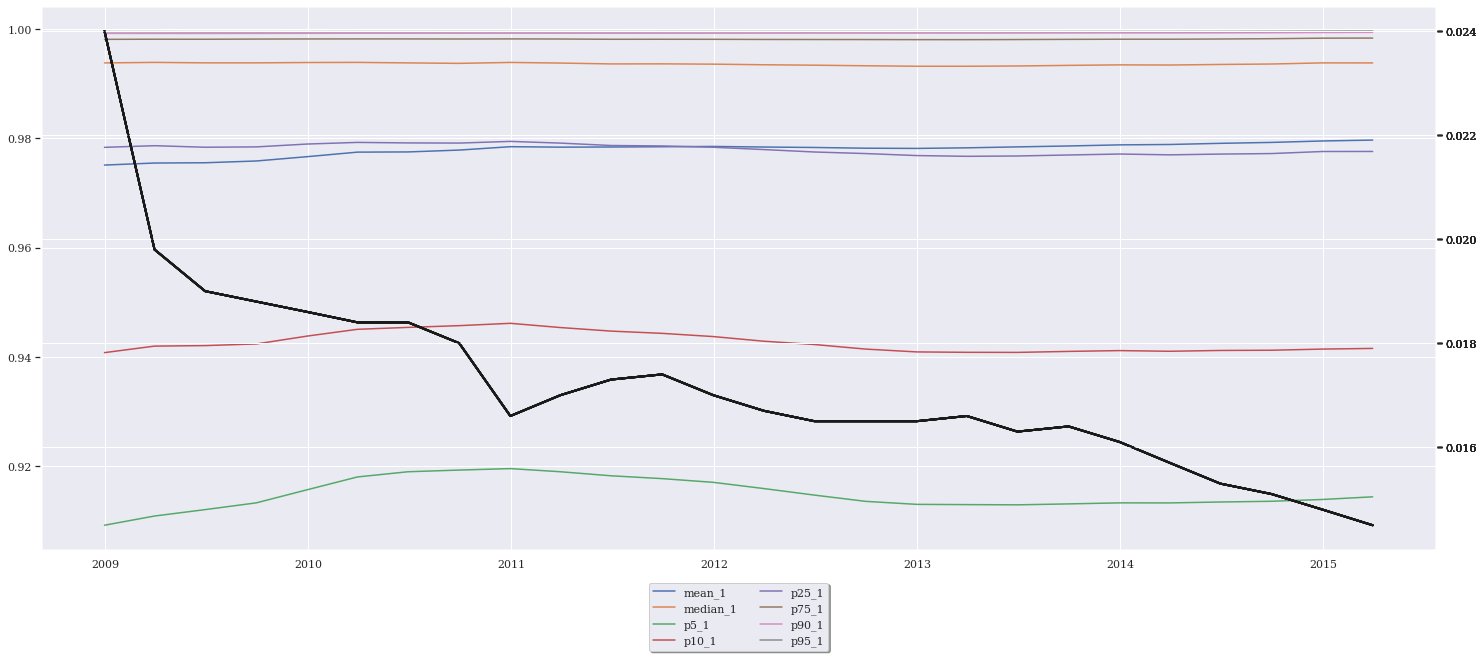

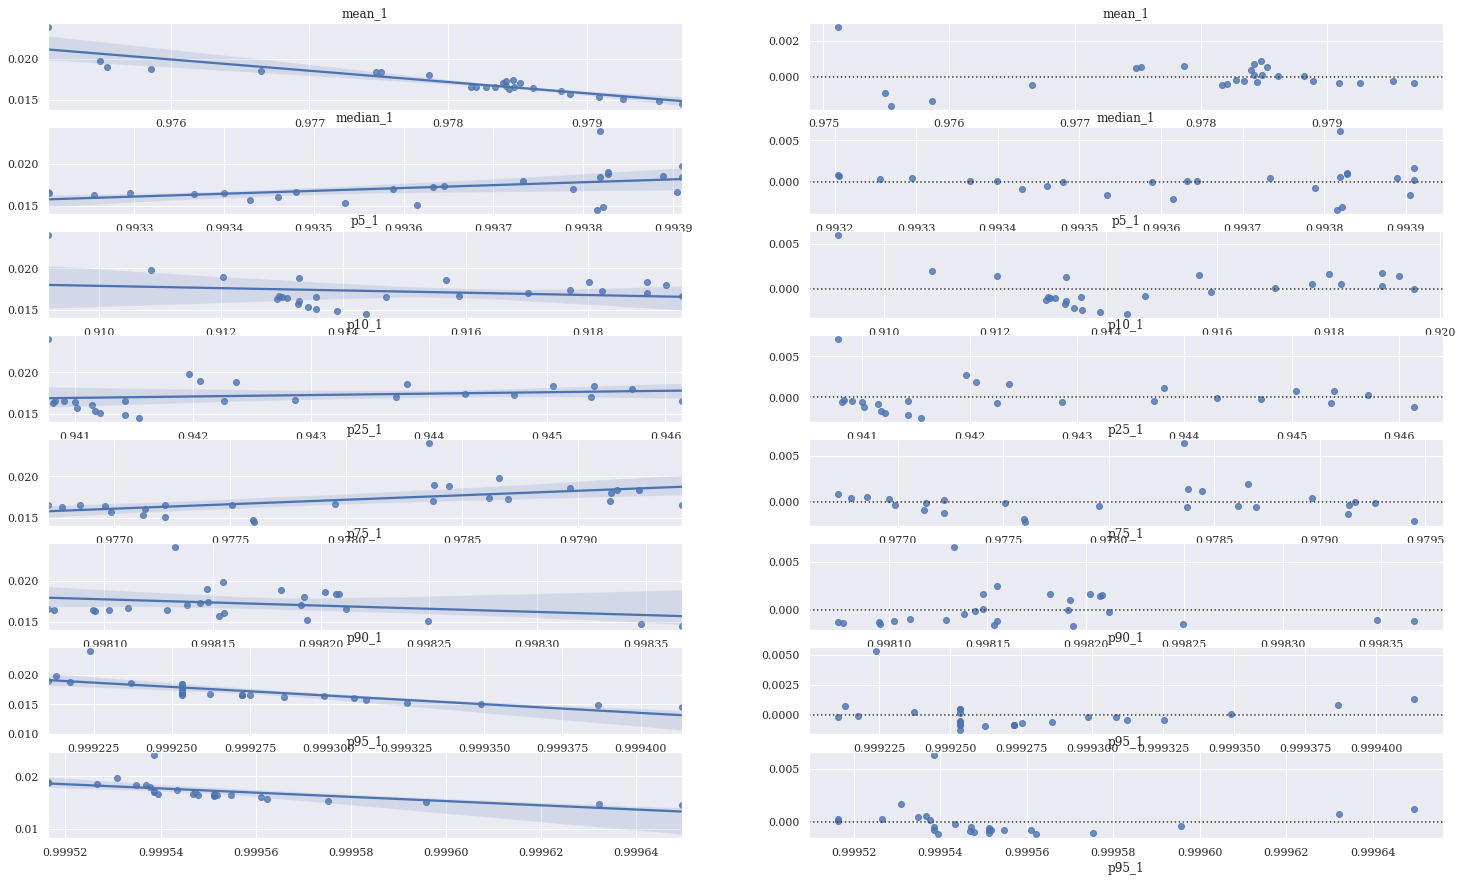

In [65]:
explo_portefeuille(dft,Yt,1)

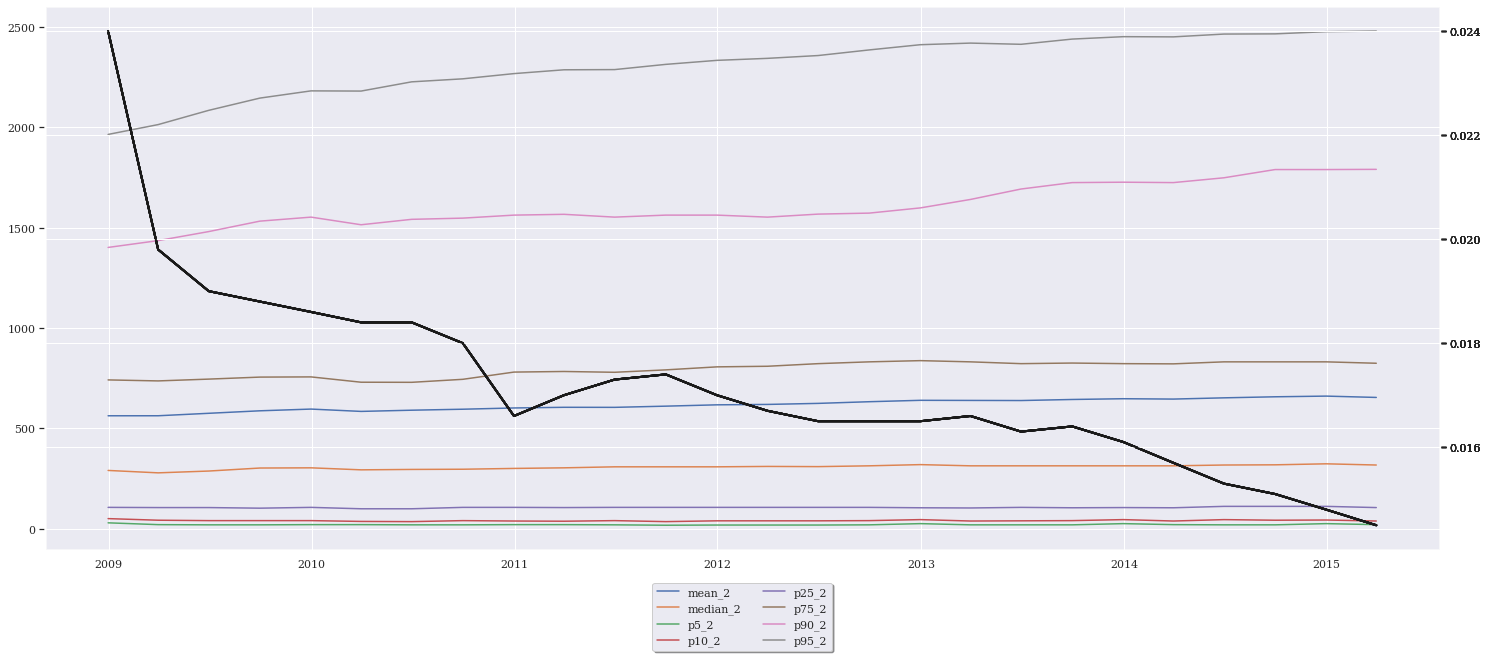

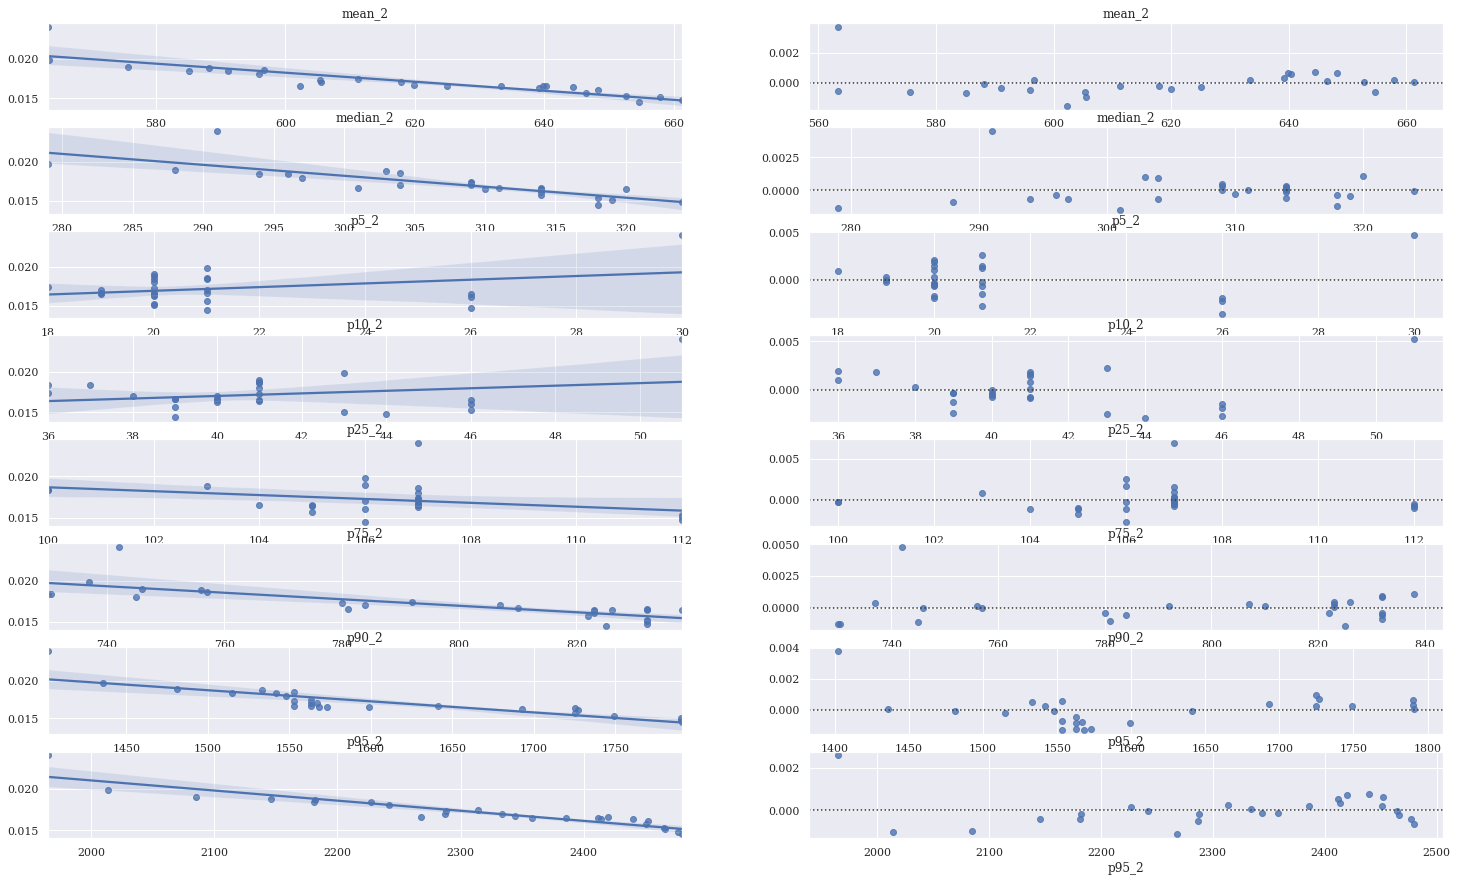

In [66]:
explo_portefeuille(dft,Yt,2)

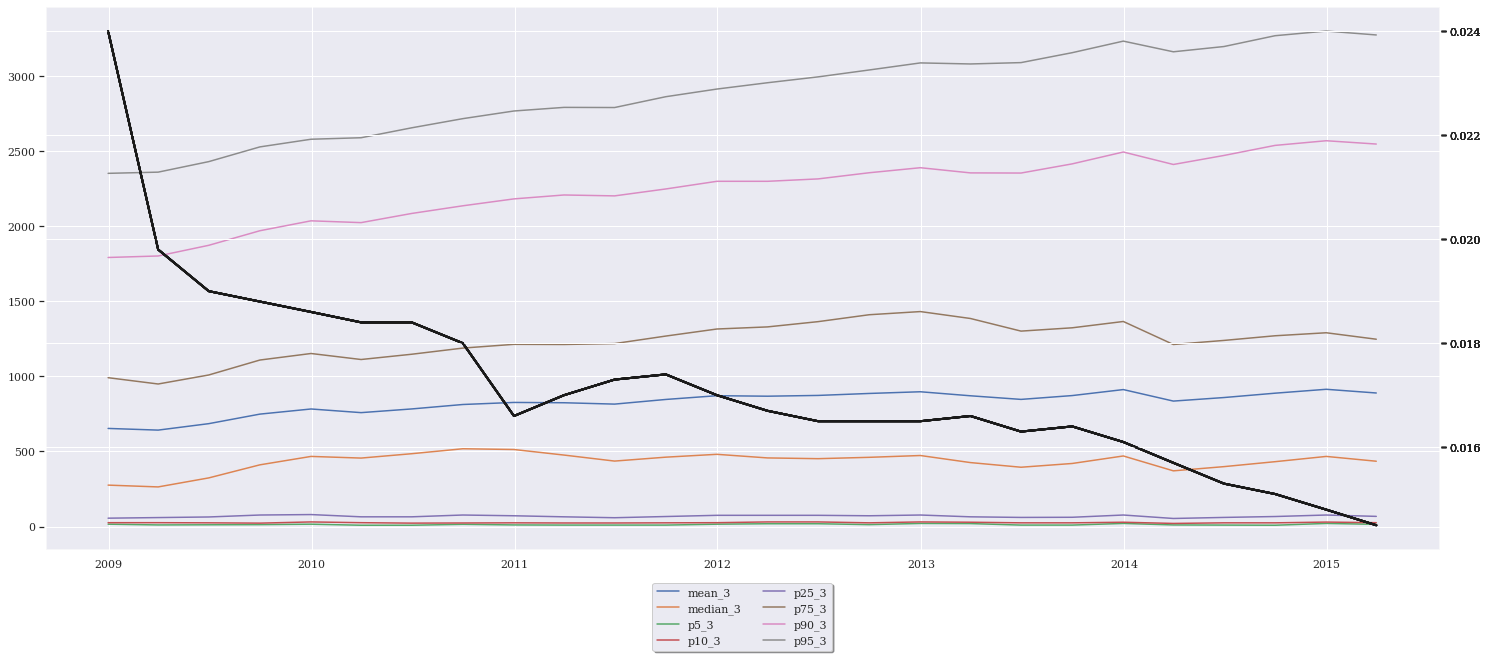

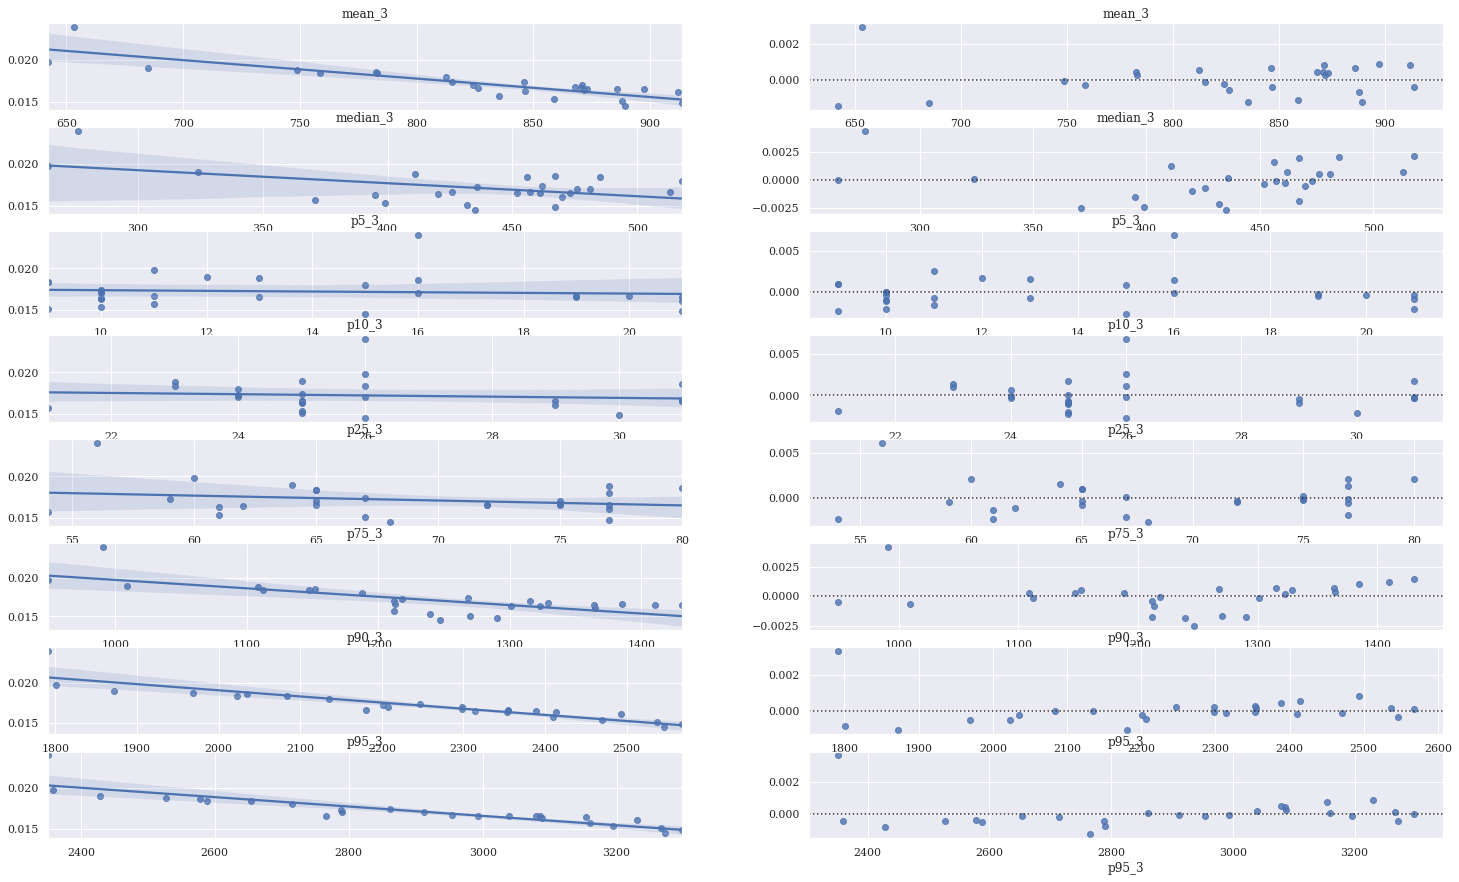

In [67]:
explo_portefeuille(dft,Yt,3)

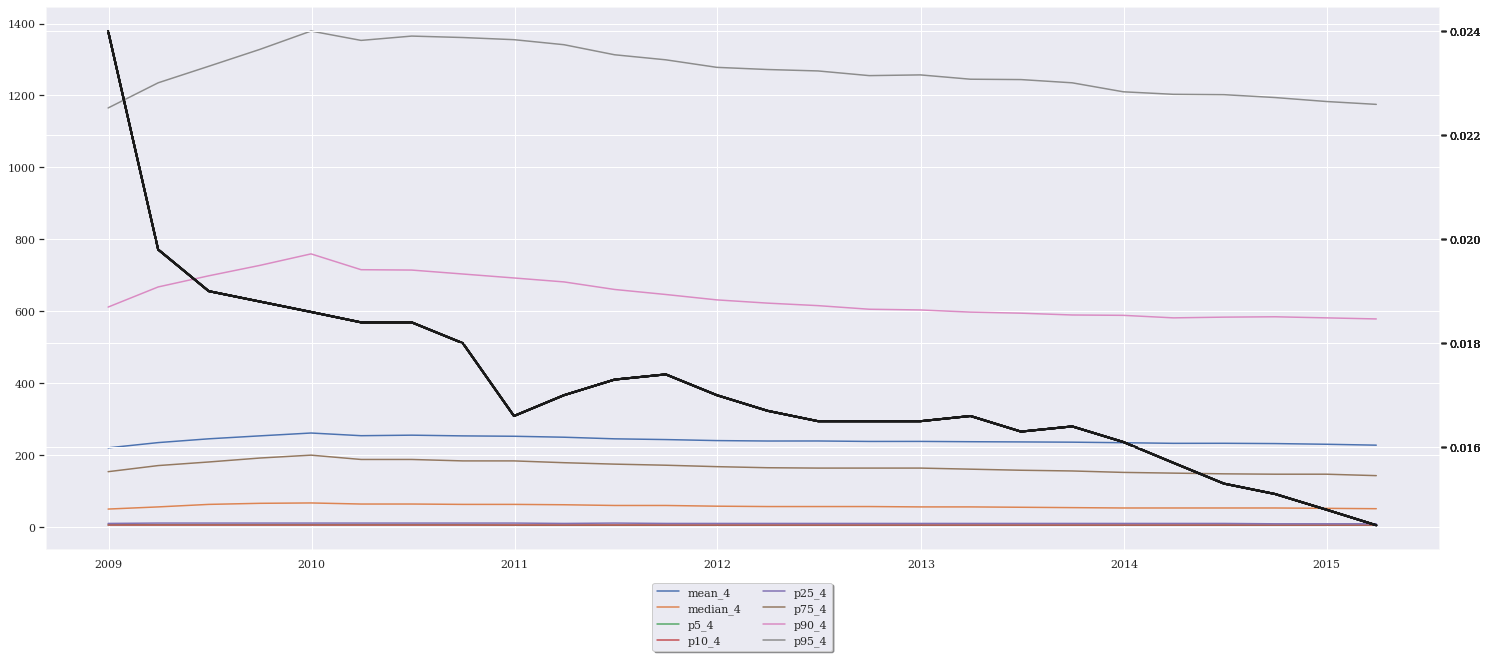

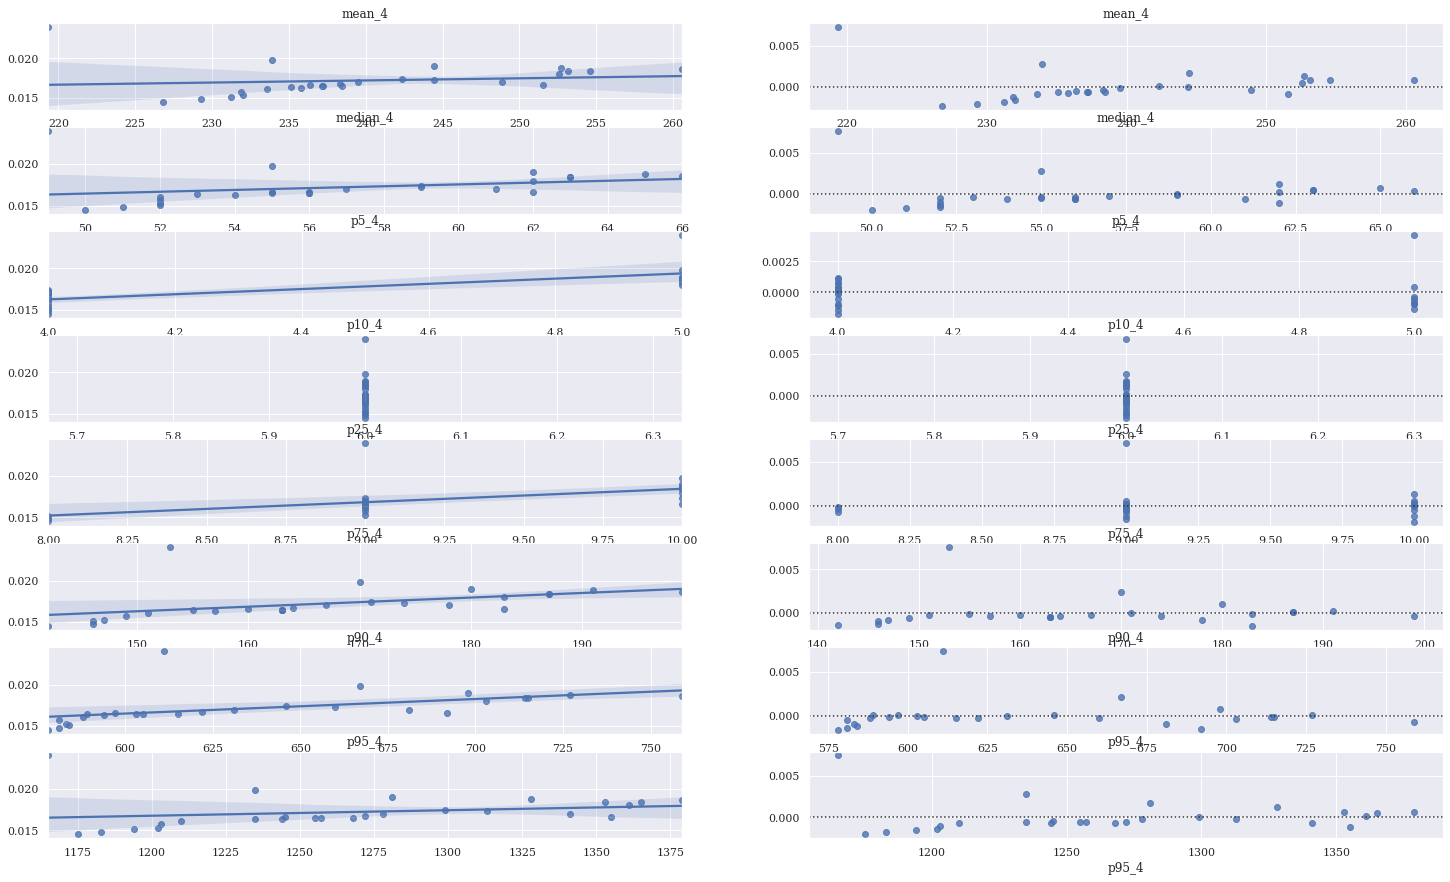

In [68]:
explo_portefeuille(dft,Yt,4)

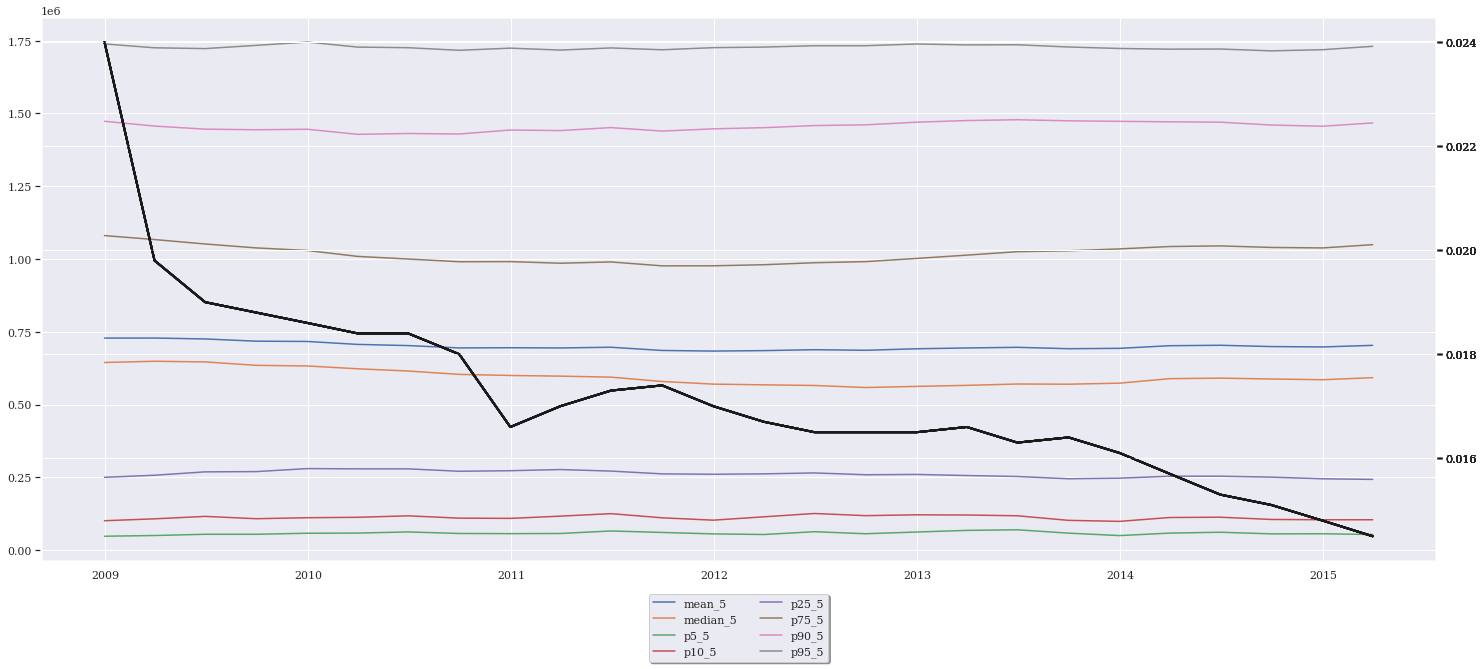

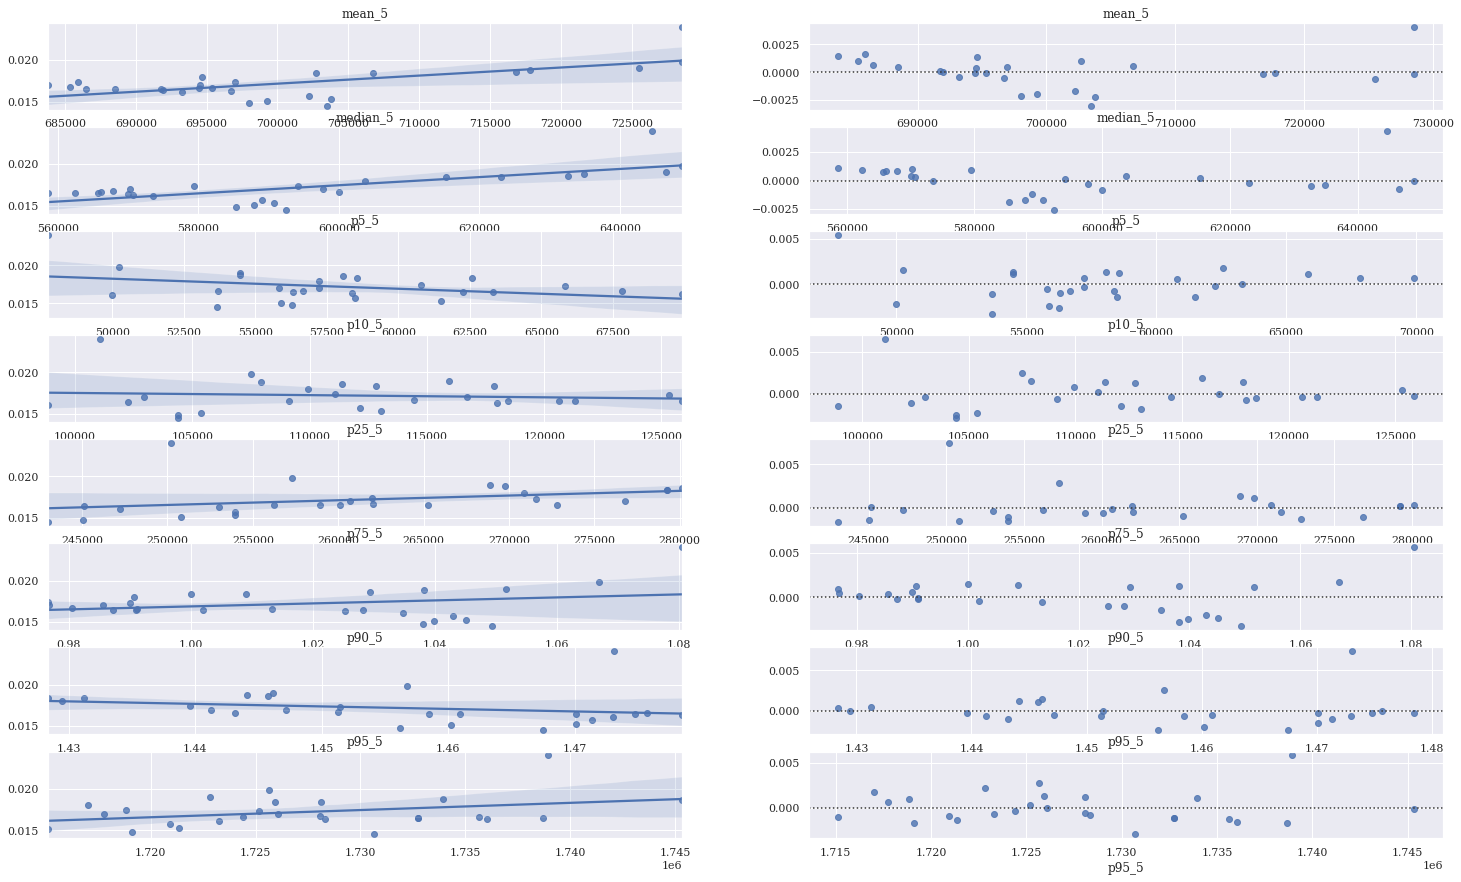

In [69]:
explo_portefeuille(dft,Yt,5)

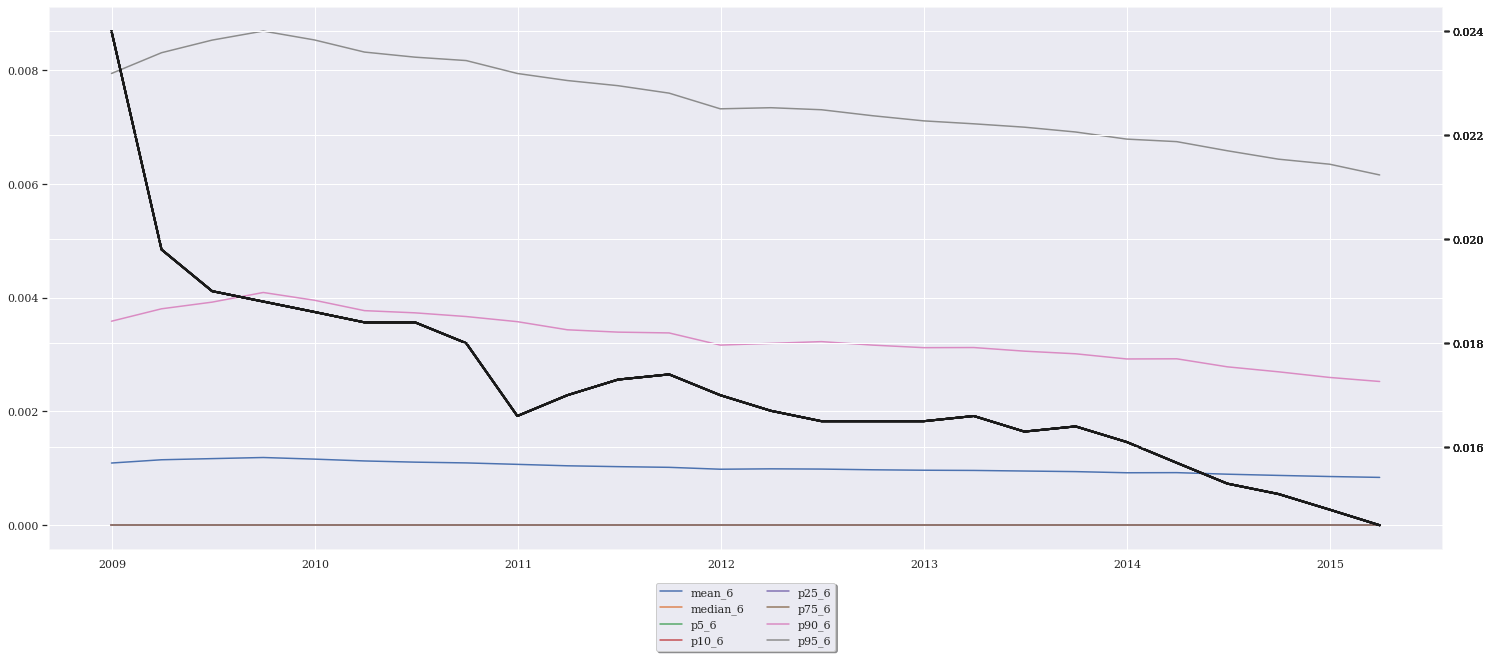

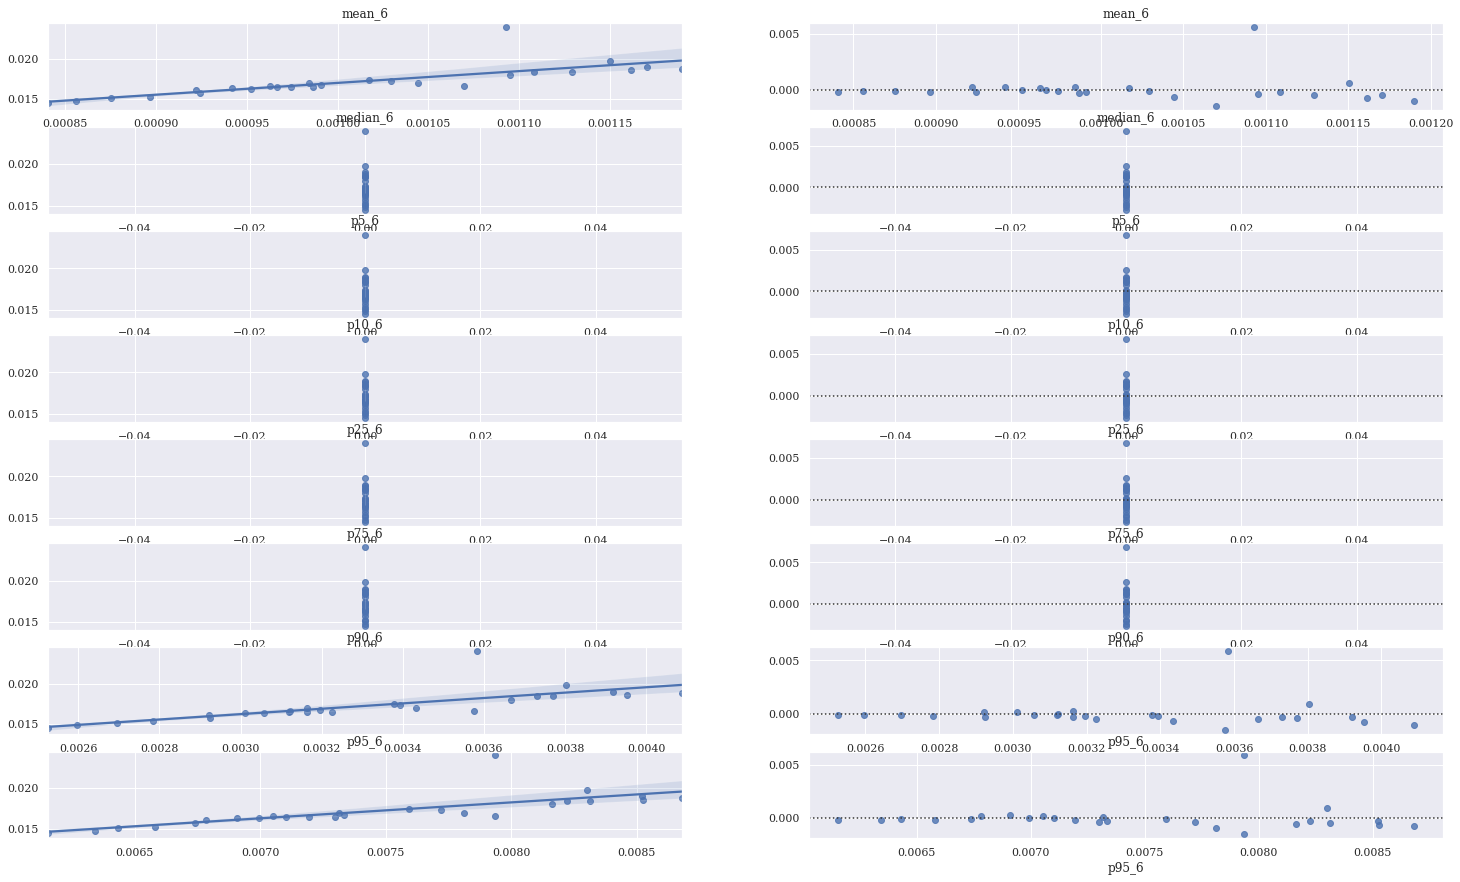

In [70]:
explo_portefeuille(dft,Yt,6)

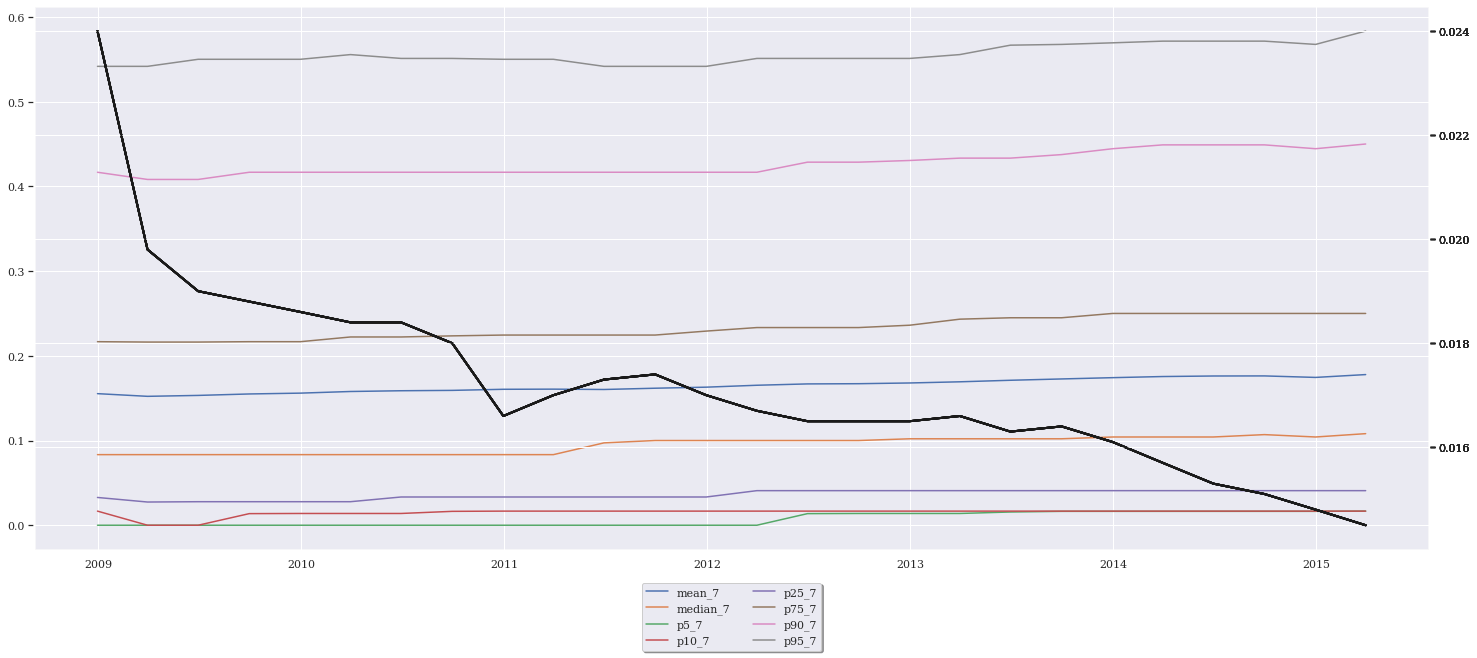

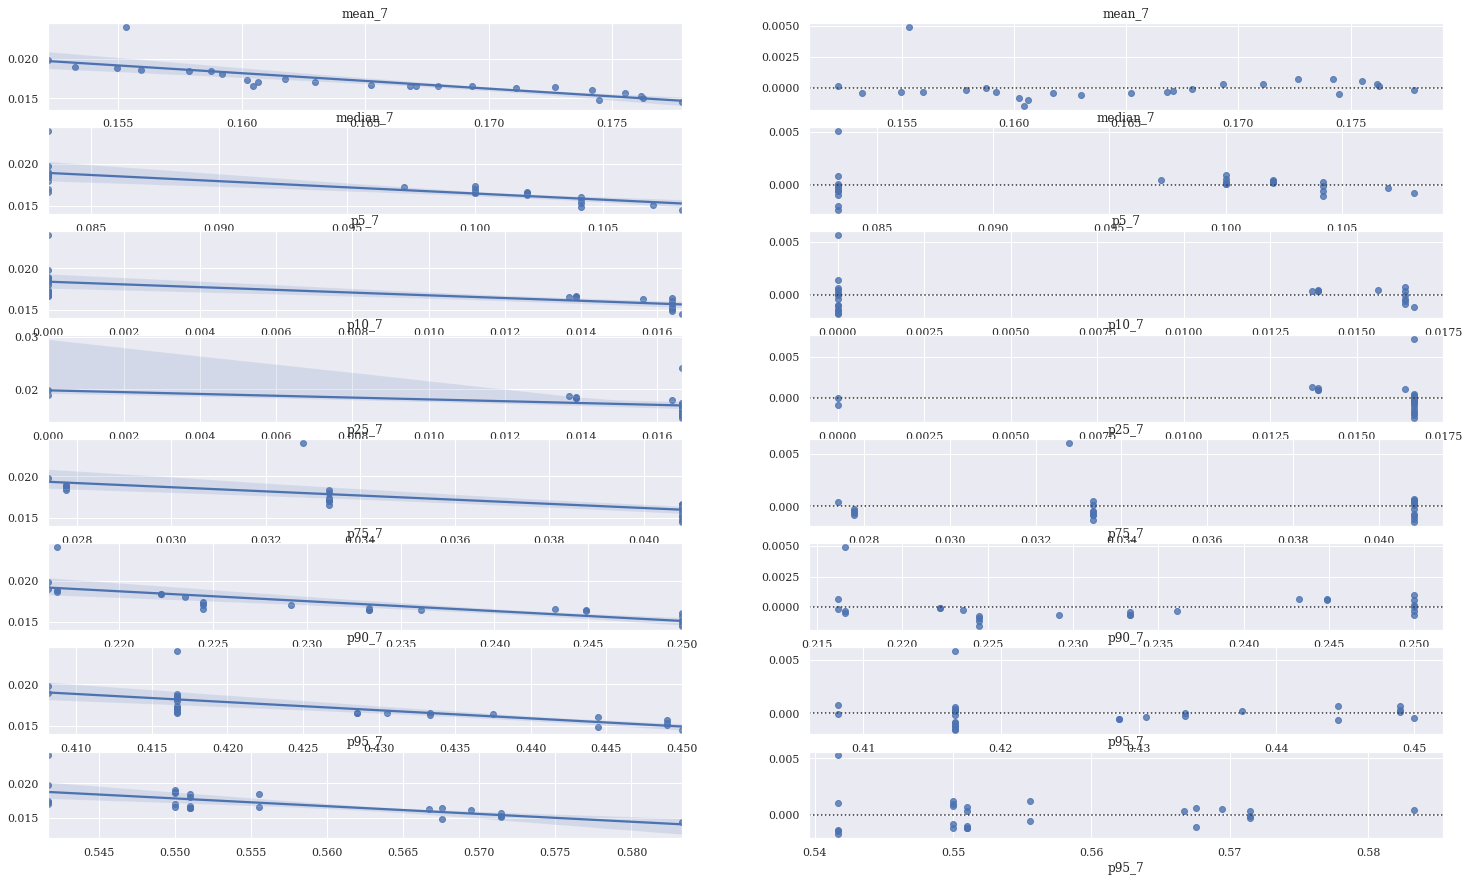

In [71]:
explo_portefeuille(dft,Yt,7)

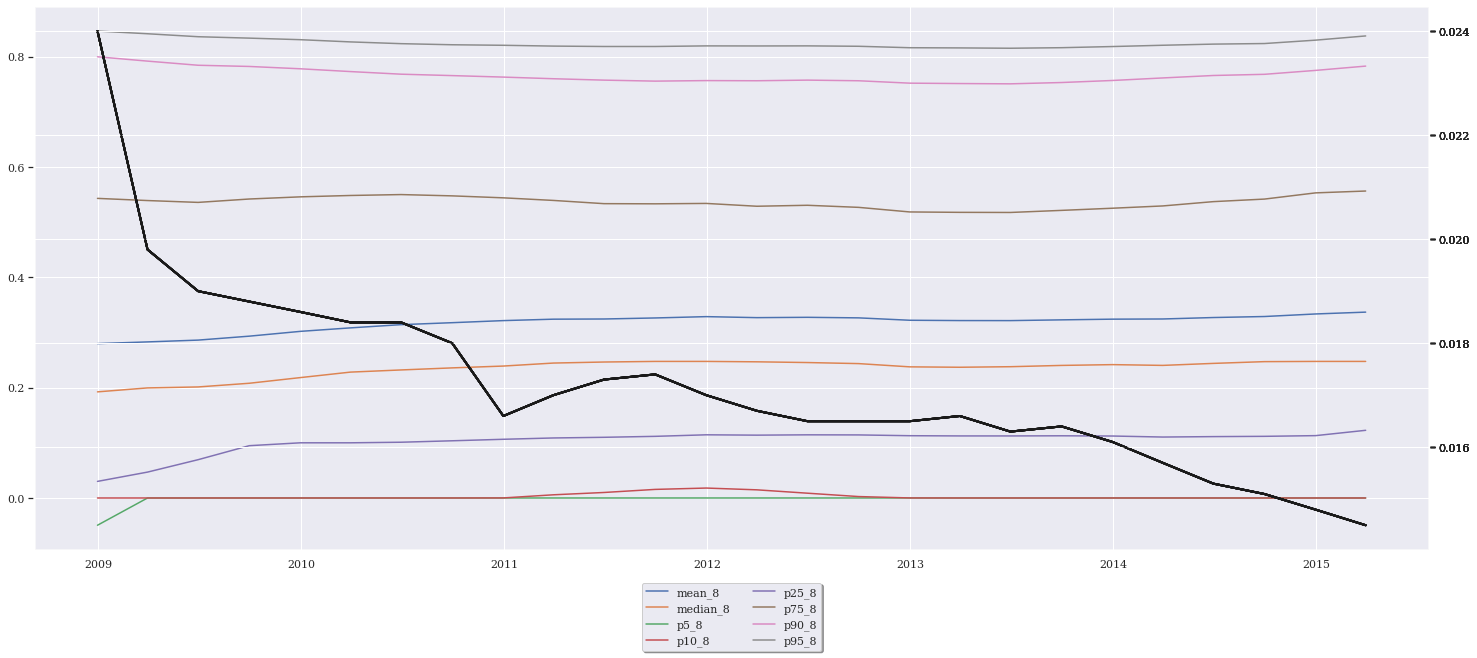

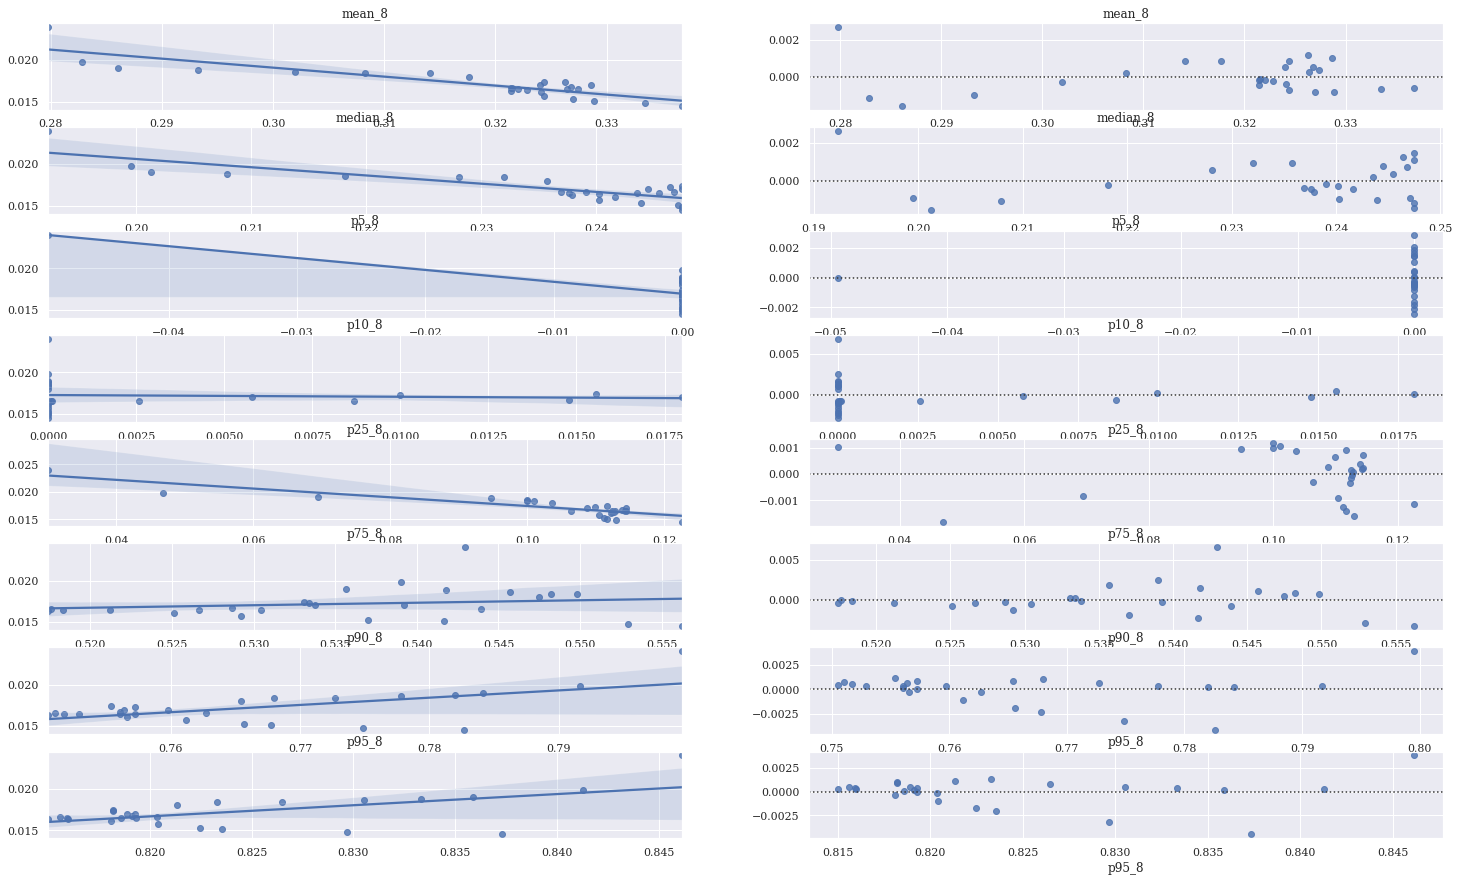

In [72]:
explo_portefeuille(dft,Yt,8)

## Type de client

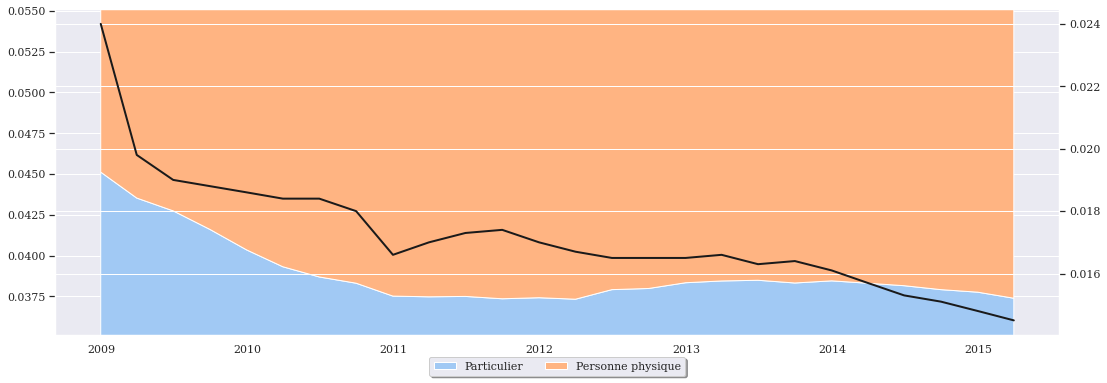

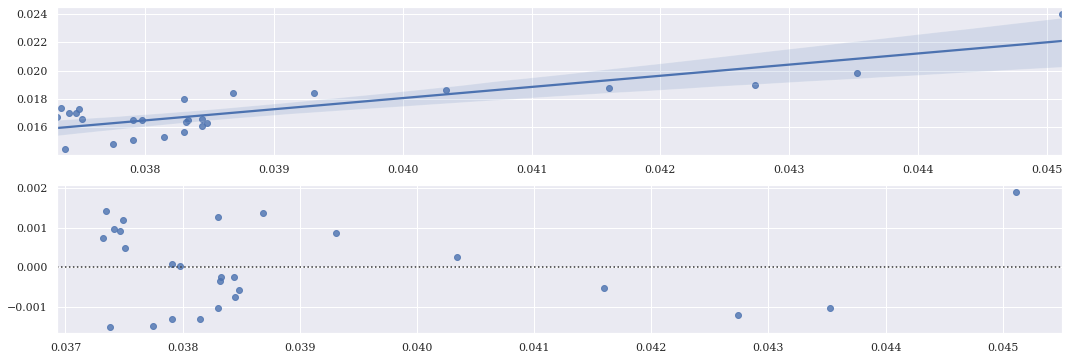

In [73]:
explo_client(dft,Yt)

## Mode d'habitation

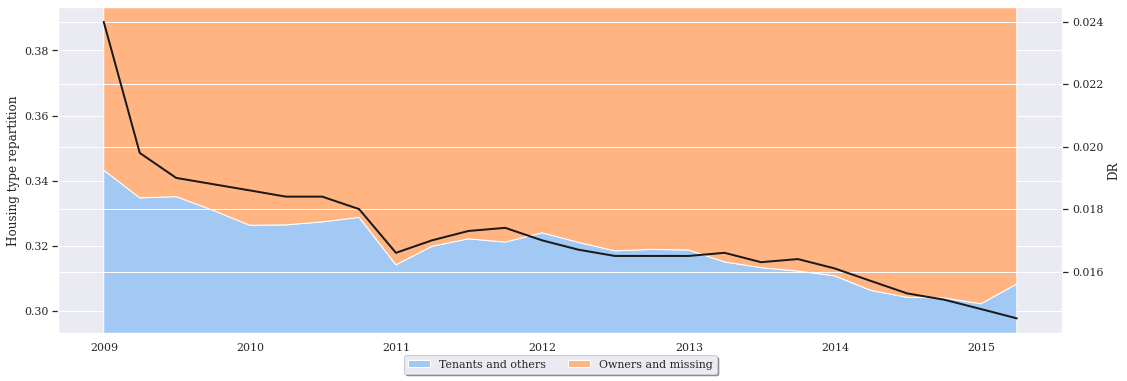

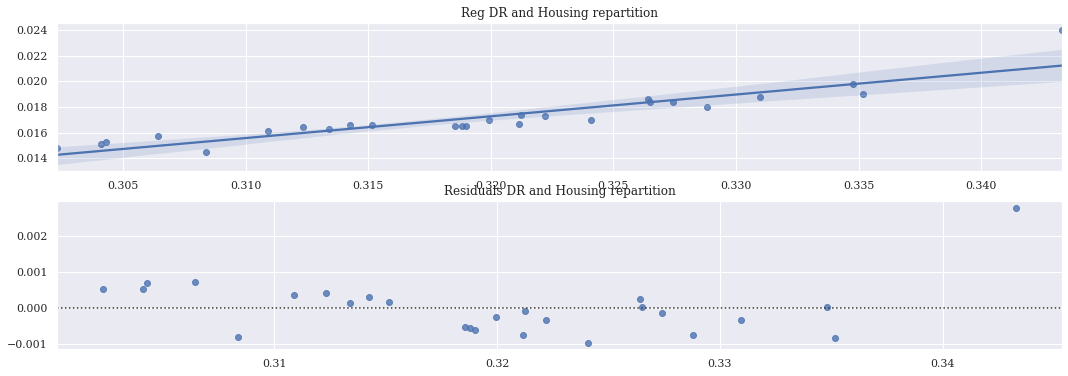

In [74]:
explo_habitation(dft,Yt)

## Etat civil

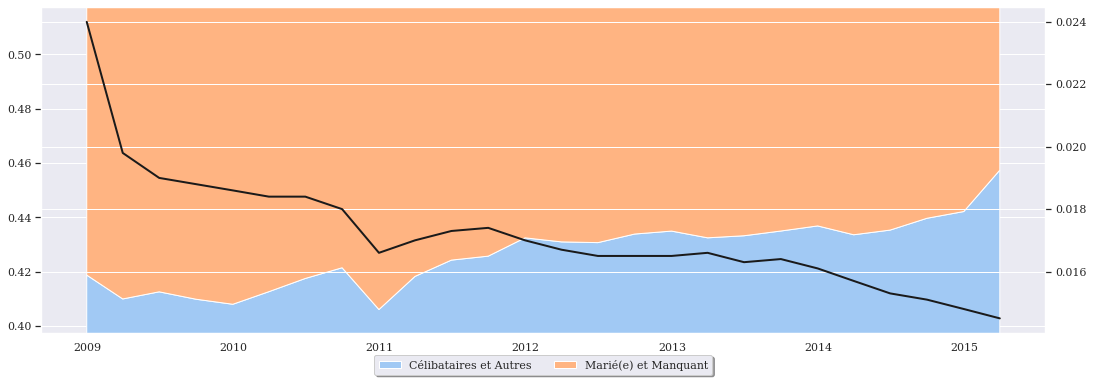

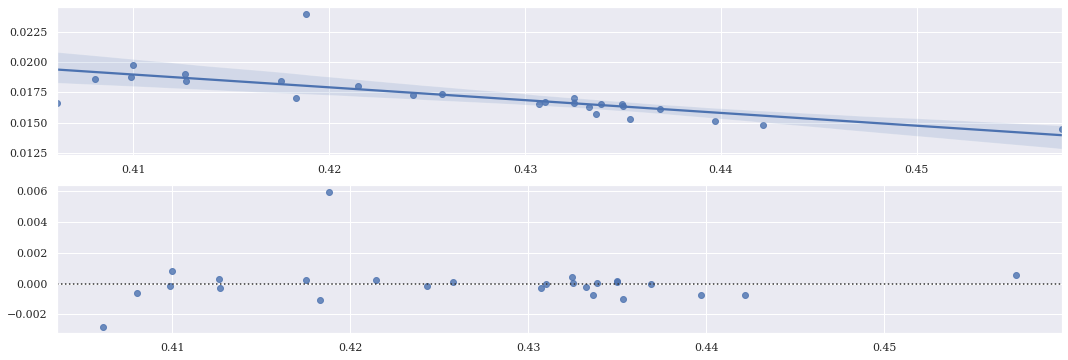

In [76]:
explo_civil(dft,Yt)

## Code qualité du véhicule

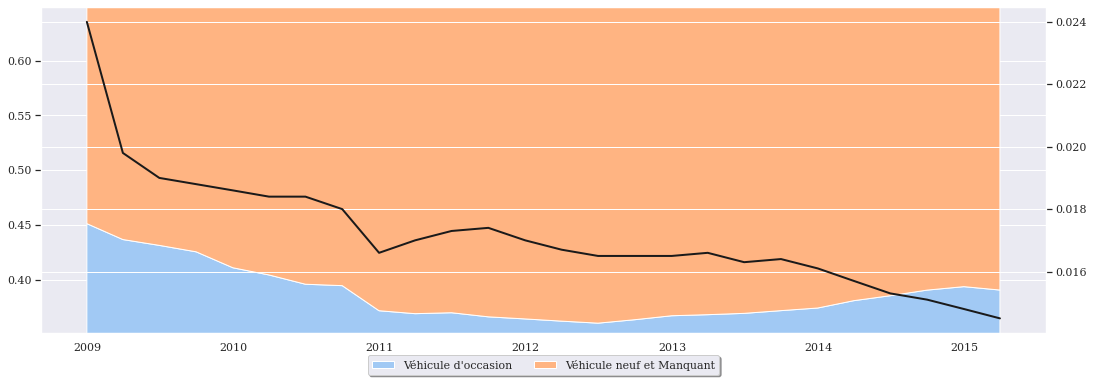

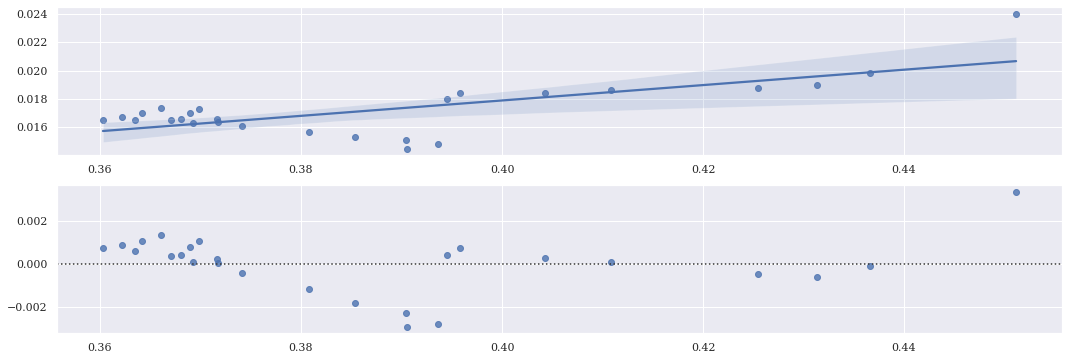

In [ ]:
explo_code_qualite(dft,Yt)

## Profession

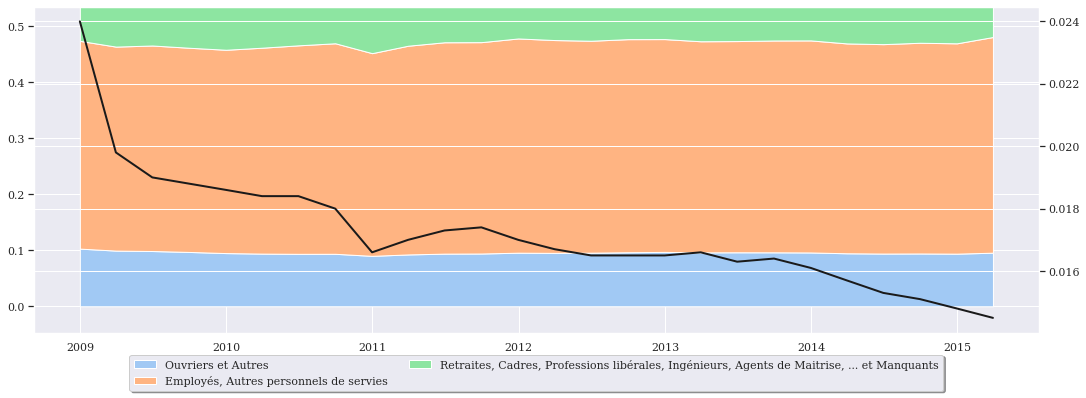

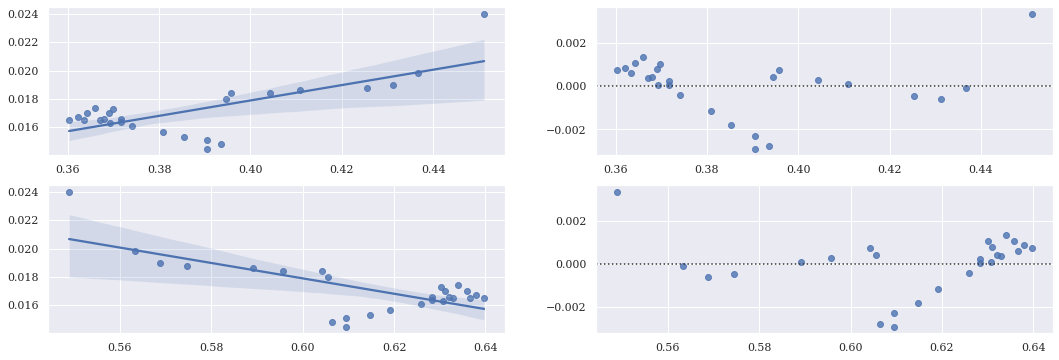

In [ ]:
explo_profession(dft,Yt)

## Macro

**About PIB**

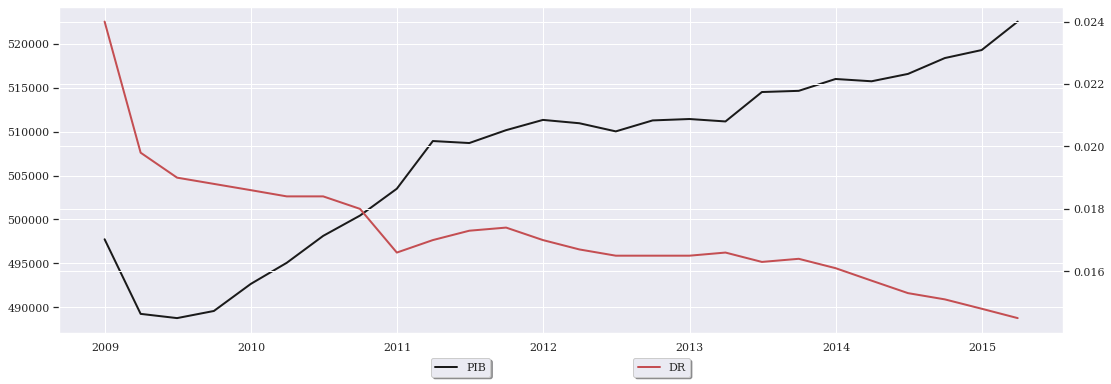

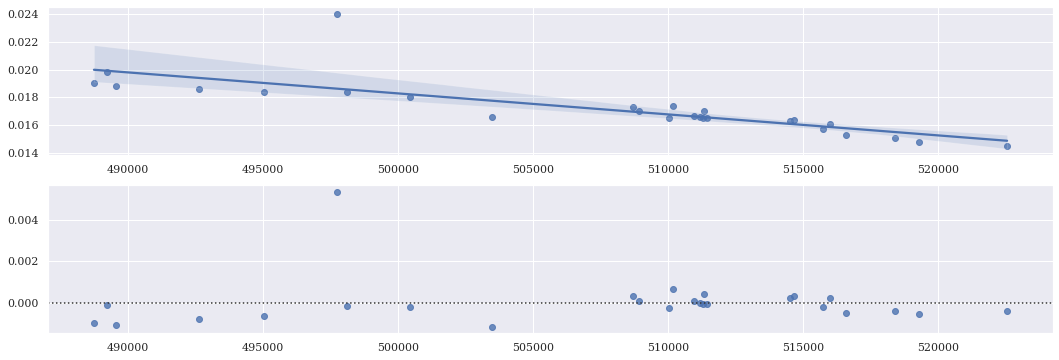

In [ ]:
explo_pib(dft,Yt)

**About Inflation**

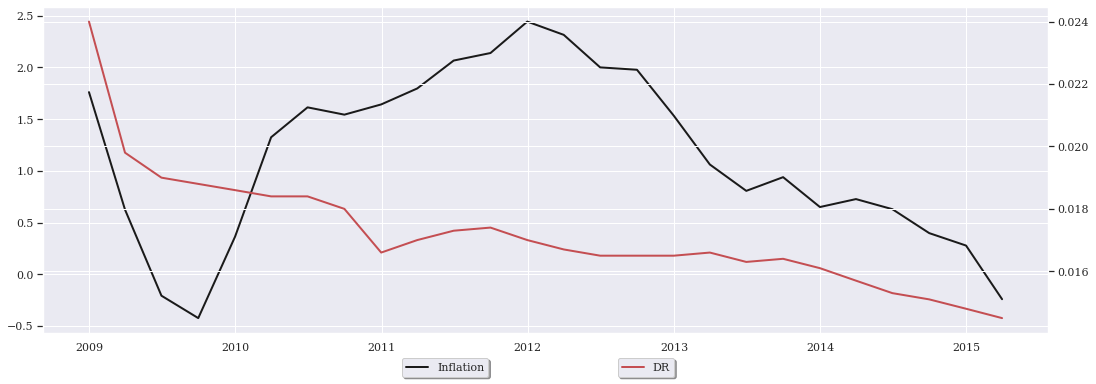

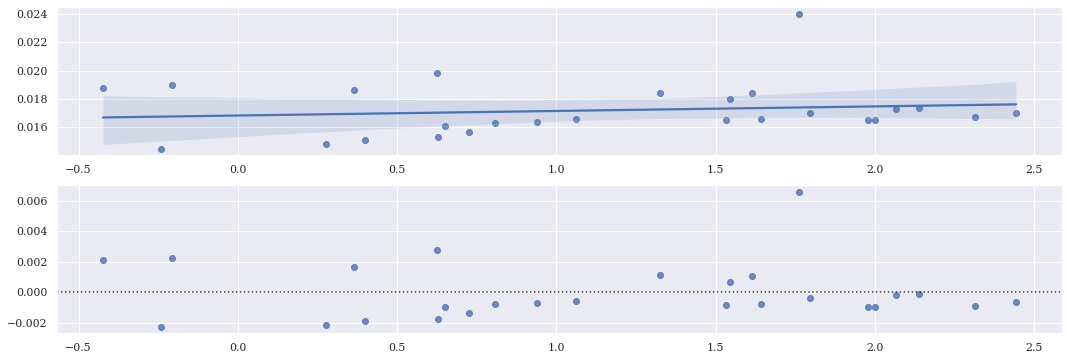

In [ ]:
explo_inflation(dft,Yt)

**Taux chomage**

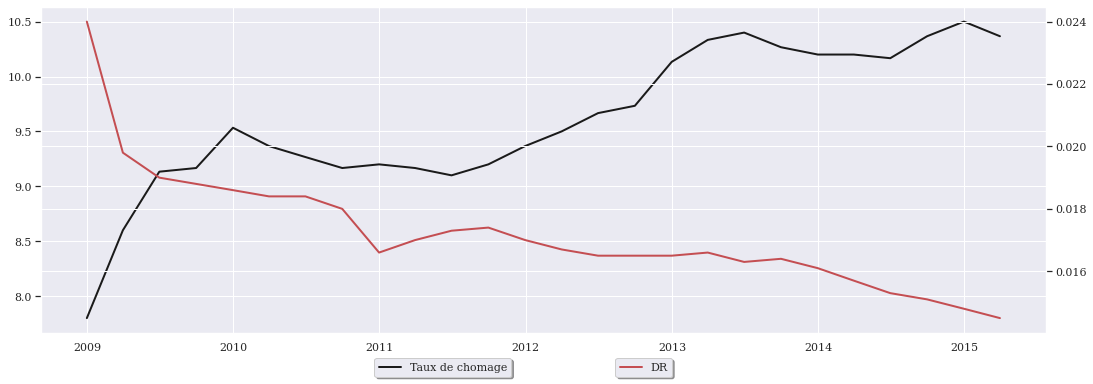

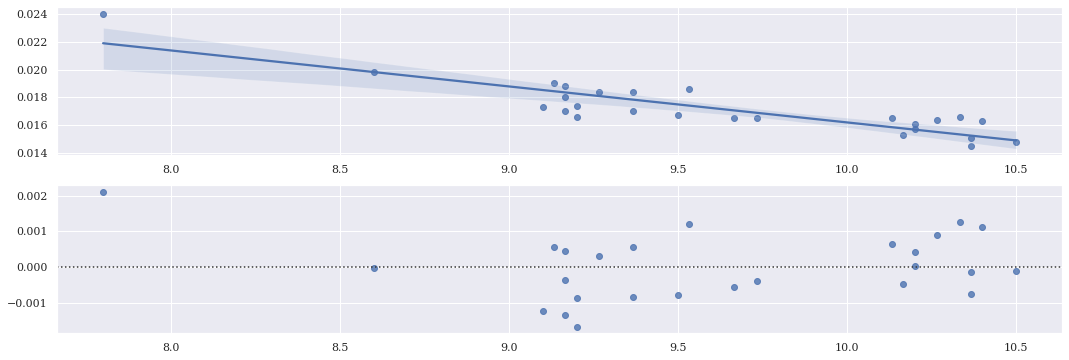

In [ ]:
explo_txcho(dft,Yt)